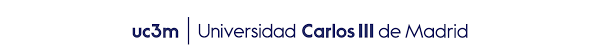

Práctica 1 - Grupo 23


Alejandro Blanco Fernández



# Introducción

En este primer Notebook se puede encontrar nuestro análisis de datos y
desarrollo de los modelos de Aprendizaje Supervisado para resolver un problema de regresión (variable continua). Estos modelos funcionan mediante la estimación de la relación funcional entre la variable de salida (variable dependiente) y las variables predictoras (variables independientes o características). Hemos detallado el proceso de cada uno por omisión, la modificación de los hiperparámetros y las conclusiones a las que hemos llegado. En concreto, los modelos que vamos a estudiar son:

*   Árboles de decisión

*   kNN (k-Nearest Neigbhors)

*   Regresión lineal

*   SVM (Support Vector Machine)

*   Random Forest

*   XGBoost



# Inicio

Antes de empezar, primero organizamos Google Colaboratory y Google Drive para guardar el contenido. También hacemos los *imports* de todas las librerías que vamos a utilizar a lo largo del Notebook y cargamos el fichero de datos.


In [3]:
from google.colab import drive
drive.mount('/content/drive')

import os
os.chdir("/content/drive/MyDrive/Colab Notebooks/MLuc3m/Practica1/")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Imports

Para la implementación de BayesSearchCV debemos instalar previamente scikit-optimize.

In [ ]:
!pip install git+https://github.com/scikit-optimize/scikit-optimize.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/scikit-optimize/scikit-optimize.git to /tmp/pip-req-build-xax6un_7
  Running command git clone --filter=blob:none --quiet https://github.com/scikit-optimize/scikit-optimize.git /tmp/pip-req-build-xax6un_7
  Resolved https://github.com/scikit-optimize/scikit-optimize.git to commit a2369ddbc332d16d8ff173b12404b03fea472492
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [ ]:
#Imports generales
# ============================================================
import time
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.model_selection import RandomizedSearchCV, PredefinedSplit, cross_val_score
from skopt import BayesSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectFromModel
from sklearn.inspection import permutation_importance
import multiprocessing
import pickle
import warnings
warnings.filterwarnings('ignore')
#Imports EDA
# ============================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
from sklearn import metrics

#Imports Árboles
# ============================================================
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor

#Imports kNN
# ============================================================
from sklearn.neighbors import KNeighborsRegressor

#Imports Regresión
# ============================================================
from sklearn.linear_model import LinearRegression, SGDRegressor, RidgeCV, LassoCV, ElasticNetCV
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.preprocessing import PolynomialFeatures

#Imports SVM
# ============================================================
from sklearn import svm
from sklearn.svm import SVR

#Imports Random Forest
# ============================================================
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor

#Imports XGBoost
# ============================================================
from xgboost import XGBRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
from lightgbm import LGBMRegressor
from scipy.stats import uniform, randint
from skopt.space import Real, Categorical, Integer


In [ ]:
disp_df = pd.read_csv("disp_st23ns1.txt.bz2",
compression="bz2",
index_col=0)

disp_df

,apcp_sf1_1,apcp_sf2_1,apcp_sf3_1,apcp_sf4_1,apcp_sf5_1,dlwrf_s1_1,dlwrf_s2_1,dlwrf_s3_1,dlwrf_s4_1,dlwrf_s5_1,...,ulwrf_t2_1,ulwrf_t3_1,ulwrf_t4_1,ulwrf_t5_1,uswrf_s1_1,uswrf_s2_1,uswrf_s3_1,uswrf_s4_1,uswrf_s5_1,salida
V1,0.000000,0.000000,0.000000,0.000000,0.000000,240.492673,237.605277,241.719940,258.559490,258.741078,...,240.140839,243.396634,260.796950,253.886025,0,6.000000,49.000000,117.363636,81.272727,10729200
V2,0.000000,0.002727,0.016364,0.061818,0.060909,265.544051,288.551397,283.254822,278.078106,261.656355,...,221.367354,229.663639,247.379329,253.325643,0,2.363636,37.454545,97.181818,72.272727,9423900
V3,0.000000,0.000000,0.000000,0.000000,0.000000,218.643638,217.723294,224.860365,252.710940,255.476495,...,230.919646,236.753478,256.995510,254.802195,0,6.000000,49.636364,118.727273,82.727273,11787300
V4,0.001818,0.000000,0.000000,0.000000,0.000000,250.681229,213.714726,216.675403,233.001828,236.258593,...,238.734958,241.853118,256.473036,251.503769,0,6.000000,51.000000,122.272727,85.272727,12192300
V5,0.000000,0.000000,0.000000,0.000000,0.000000,242.890020,248.017960,258.850822,304.759064,309.027371,...,235.343023,238.498259,227.128188,213.564319,0,5.090909,45.909091,98.090909,63.000000,5331600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
V4376,0.000000,0.000000,0.000909,0.000000,0.000000,258.623197,252.305968,256.273302,269.681935,265.916138,...,251.075717,251.416203,257.735130,257.153043,0,6.909091,48.818182,114.545455,79.000000,11847600
V4377,0.000000,0.000000,0.000000,0.000000,0.000000,255.732910,257.554757,265.257923,289.694053,289.704928,...,240.038248,245.971437,266.338423,263.660181,0,6.000000,47.363636,112.272727,77.181818,11889300
V4378,0.000000,0.000000,0.000000,0.000000,0.000000,272.809801,259.657551,263.445046,282.842940,282.805933,...,255.251232,263.099374,289.096311,286.661130,0,7.000000,50.363636,119.272727,82.363636,12258600
V4379,0.000000,0.000000,0.000000,0.060000,0.155455,263.498413,255.981154,261.107649,291.973930,295.805903,...,261.070901,264.526767,243.195777,230.075193,0,7.000000,50.090909,103.727273,67.363636,11922900


## Análisis Exploratorio de Datos (EDA)

El EDA es una técnica que se utiliza para examinar los datos de manera exploratoria para identificar patrones, tendencias y relaciones en los datos. Vamos a usar la visualización de los datos en gráficos y tablas, que ayudan a identificar cualquier problema o anormalidad en los datos, como, por ejemplo: valores atípicos, datos faltantes, valores nulos o desequilibrios en los datos. Este análisis previo nos va a servir para comprender mejor los datos y a tomar decisiones informadas sobre cómo procesarlos.

Utilizamos la librería Pandas para el trabajo con datos (para los modelos usamos NumPy).

In [ ]:
# Información básica del fichero de datos

print('---------------------------------')
print('Primeras filas')
# Primeras filas del conjunto de datos
print(disp_df.head())

print('---------------------------------')
print('Tamaño de los datos')
# Tamaño del conjunto de datos
print(disp_df.shape)

print('---------------------------------')
print('Valores nulos')
# Valores nulos
print(disp_df.isnull().sum())
#.isnull() devuelve el conjunto de datos con False si la variable toma algún valor. Devuelve True si es nulo
#.sum() devuelve la suma de todos los números faltantes por variable. No sale todo 0, así que no hay nulos
# Otra forma de hacerlo es con .any()
print(disp_df.isnull().any())

print('---------------------------------')
print('Información básica')
# Información general del conjunto de datos
print(disp_df.info())

print('---------------------------------')
# Estadísticas descriptivas de las variables
print(disp_df.describe())

# Aislando la variable objetivo
print('Estadísticas descriptivas de la variable objetivo')
print(disp_df['salida'].describe())

---------------------------------
Primeras filas
    apcp_sf1_1  apcp_sf2_1  apcp_sf3_1  apcp_sf4_1  apcp_sf5_1  dlwrf_s1_1  \
V1    0.000000    0.000000    0.000000    0.000000    0.000000  240.492673   
V2    0.000000    0.002727    0.016364    0.061818    0.060909  265.544051   
V3    0.000000    0.000000    0.000000    0.000000    0.000000  218.643638   
V4    0.001818    0.000000    0.000000    0.000000    0.000000  250.681229   
V5    0.000000    0.000000    0.000000    0.000000    0.000000  242.890020   

    dlwrf_s2_1  dlwrf_s3_1  dlwrf_s4_1  dlwrf_s5_1  ...  ulwrf_t2_1  \
V1  237.605277  241.719940  258.559490  258.741078  ...  240.140839   
V2  288.551397  283.254822  278.078106  261.656355  ...  221.367354   
V3  217.723294  224.860365  252.710940  255.476495  ...  230.919646   
V4  213.714726  216.675403  233.001828  236.258593  ...  238.734958   
V5  248.017960  258.850822  304.759064  309.027371  ...  235.343023   

    ulwrf_t3_1  ulwrf_t4_1  ulwrf_t5_1  uswrf_s1_1  usw

In [ ]:
#Creación de variables: la y es la 'salida' (última columna del fichero de datos) y la X es el resto de información
#Mostramos por pantalla diez primeros valores que toma cada variable
y_df = disp_df['salida']
print(y_df[0:10])

X_df = disp_df.drop('salida',axis=1)
print(X_df[0:10])

V1     10729200
V2      9423900
V3     11787300
V4     12192300
V5      5331600
V6     10143300
V7     11968500
V8     11886000
V9     11544000
V10    11886300
Name: salida, dtype: int64
     apcp_sf1_1  apcp_sf2_1  apcp_sf3_1  apcp_sf4_1  apcp_sf5_1  dlwrf_s1_1  \
V1     0.000000    0.000000    0.000000    0.000000    0.000000  240.492673   
V2     0.000000    0.002727    0.016364    0.061818    0.060909  265.544051   
V3     0.000000    0.000000    0.000000    0.000000    0.000000  218.643638   
V4     0.001818    0.000000    0.000000    0.000000    0.000000  250.681229   
V5     0.000000    0.000000    0.000000    0.000000    0.000000  242.890020   
V6     0.000000    0.001818    0.053636    0.041818    0.102727  257.741101   
V7     0.004545    0.014545    0.013636    0.000000    0.000000  206.533750   
V8     0.000000    0.000000    0.000000    0.000000    0.000000  221.085365   
V9     0.000000    0.000000    0.000000    0.000000    0.000000  222.046058   
V10    0.000000    0.00

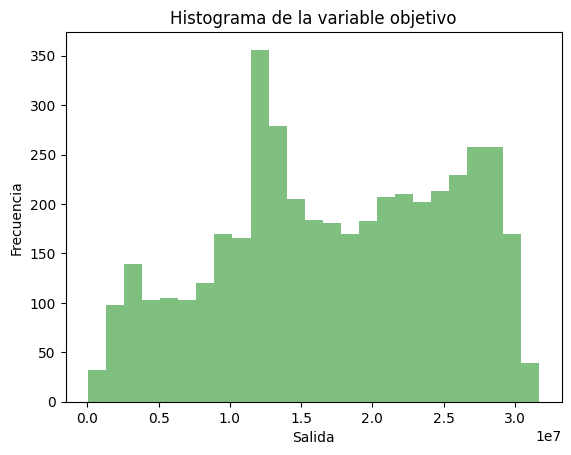

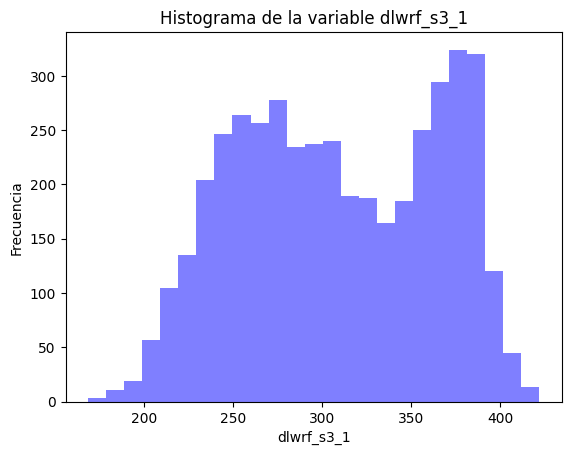

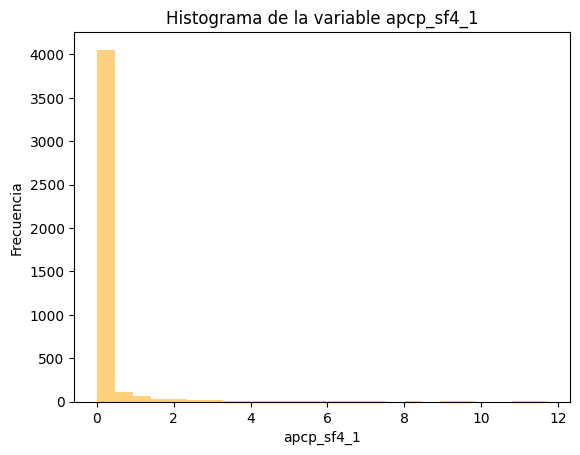

In [ ]:
# Histograma de la variable objetivo ('salida')
disp_df.salida.plot.hist(bins=25, color='green', alpha=0.5)
plt.xlabel('Salida')
plt.ylabel('Frecuencia')
plt.title('Histograma de la variable objetivo')
plt.show()

# Histograma de ejemplo de dos variables al azar
disp_df.dlwrf_s3_1.plot.hist(bins=25, color='blue', alpha=0.5)
plt.xlabel('dlwrf_s3_1')
plt.ylabel('Frecuencia')
plt.title('Histograma de la variable dlwrf_s3_1')
plt.show()

disp_df.apcp_sf4_1.plot.hist(bins=25, color='orange', alpha=0.5)
plt.xlabel('apcp_sf4_1')
plt.ylabel('Frecuencia')
plt.title('Histograma de la variable apcp_sf4_1')
plt.show()

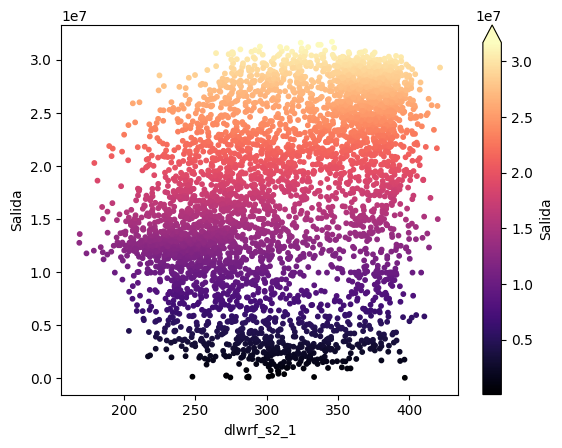

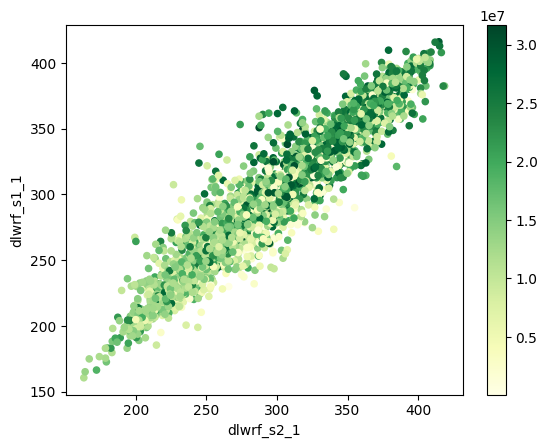

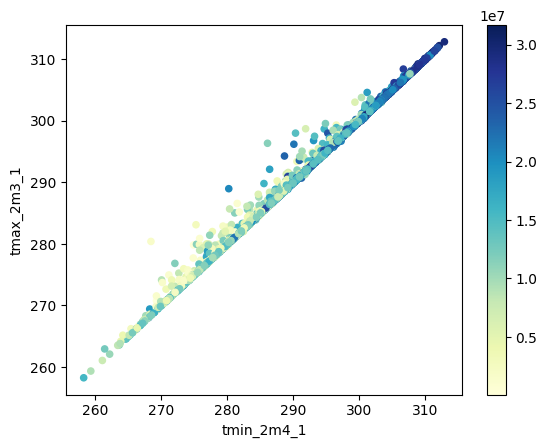

In [ ]:
# Gráfico de dispersión (scatter plot) entre una variable numérica cualquiera y la función objetivo
plt.scatter(x=disp_df['dlwrf_s3_1'], y=disp_df['salida'], c=y_df, s=10, cmap='magma')
plt.xlabel('dlwrf_s2_1')
plt.ylabel('Salida')
cbar = plt.colorbar(cmap='magma', extend='max') #Extend muestra los valores fuerea del rango de valor
cbar.set_label('Salida')
plt.show()

# Dos representaciones distintas del gráfico de dispersión dos variables cualesquiera
disp_df.plot.scatter(x="dlwrf_s2_1", y="dlwrf_s1_1", c=y_df, cmap='YlGn')
plt.xlabel('dlwrf_s2_1')
plt.ylabel('dlwrf_s1_1')
#cbar = plt.colorbar(cmap='coolwarm', extend='max')
#cbar.set_label('dlwrf_s1_1')
plt.show()

disp_df.plot.scatter(x="tmin_2m4_1", y="tmax_2m3_1", c=y_df, cmap='YlGnBu')
plt.xlabel('tmin_2m4_1')
plt.ylabel('tmax_2m3_1')
#cbar = plt.colorbar(cmap='bwr', extend='max')
#cbar.set_label('dlwrf_s1_1')
plt.show()

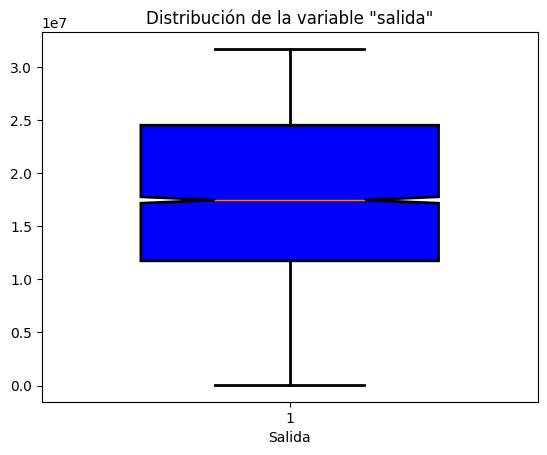

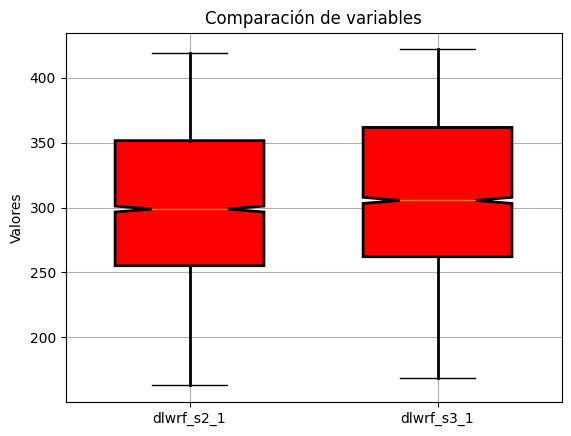

In [ ]:
#Boxplots

#Algunas modificaciones para las líneas
boxprops = dict(linestyle='-', linewidth=2, color='black', facecolor='blue')
whiskerprops = dict(linestyle='-', linewidth=2, color='black')
capprops={'linewidth': 2, 'color': 'black'} # Otra forma es declarando directamente el diccionario, en vez de convertirlo

#Boxplot de la variable objetivo
plt.boxplot(disp_df['salida'], vert=True, notch=True, sym='o', widths=0.6, meanline=True, boxprops=boxprops, whiskerprops=whiskerprops, capprops=capprops, patch_artist= True)
#vert lo dibuja verticalmente
#notch es el corte del recuadro que indica la mediana
#sym indica valores atípicos con el caracter o
#widths es la anchura de los recuadros
#meanline dibuja una linea amarilla para mostrar la media
#boxprops, whiskerprops y meanprops dibujan las lineas y colores del recuadro
plt.xlabel('Salida')
plt.title('Distribución de la variable "salida"')
plt.show()

#Boxplot de dos variables distintas
boxprops1 = dict(linestyle='-', linewidth=2, color='black', facecolor='red')
whiskerprops1 = dict(linestyle='-', linewidth=2, color='black')

plt.boxplot([disp_df['dlwrf_s2_1'], disp_df['dlwrf_s3_1']], positions=[1,2], notch=True, sym='o', widths=0.6, meanline=True, boxprops=boxprops1, whiskerprops=whiskerprops1, patch_artist= True)
plt.xticks([1, 2], ['dlwrf_s2_1', 'dlwrf_s3_1'])
plt.ylabel('Valores')
plt.title('Comparación de variables')
plt.grid(True)
plt.show()

Text(0.5, 1.0, 'Correlación entre variables')

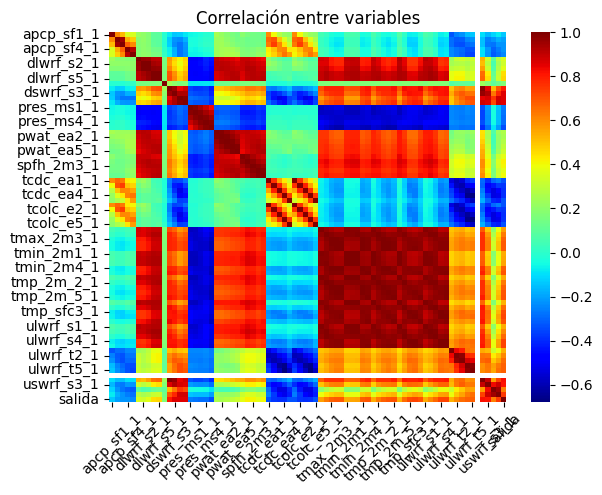

In [ ]:
#Heatmap
corr = disp_df.corr() #corr() genera una matriz de correlación entre las variables (coef. Pearson entre -1 y 1)
sns.heatmap(corr, cmap='jet') #Con la librería seaborn podemos crear el tipo de gráfico Heatmap, que muestra las correlaciones entre variables
plt.xticks(rotation=45)
plt.title('Correlación entre variables')

## Comentarios EDA

Algunas observaciones que podemos concluir a partir de este análisis son:

- Nuestro conjunto de datos se podría considerar de tamaño mediano(4380x76). Este tamaño puede afectar, entre otras maneras, a: el tiempo de procesamiento, que aumenta mucho y puede ser computacionalmente costoso; la selección de características, ya que si hay muchas puede ser rentable reducir su número y mejorar el rendimiento del modelo; y  el sobreajuste, para lo que es importante dividir los datos en conjuntos de entrenamiento, validación y test.

- No hay datos faltantes. Tenemos variables con valores de 0, pero no son nulos, es decir, no tenemos que imputar datos o eliminar filas para manejar los valores faltantes.

- No siempre hay una relación obvia entre variables. El *heatmap* anterior nos ha permitido ver que existen variables bastante correlacionadas entre sí, pero hay otra importante cantidad de ellas que no necesariamente. Esto puede implicar que sea más difícil entrenar un modelo con precisión, pero vamos a implementar diferentes algoritmos con el objetivo de encontrar el mejor rendimiento.

- Las estadísticas descriptivas varían mucho según las variables. Esto puede ser un signo de que las diferentes variables tienen diferentes escalas y distribuciones, por lo que va a ser importante aplicar técnicas como estandarización o normalización.

# Comentarios **IMPORTANTES** para los métodos básicos y avanzados

A continuación, unas consideraciones generales que nos parecen importantes mencionar antes de comenzar el desarrollo de los algoritmos:

- El split de los datos lo hacemos en tres conjuntos: entrenamiento, validación y test, y para ello utilizamos el método *Holdout* y la función np.array_split().

- Para la búsqueda de hiperparámetros vamos a utilizar la función RandomizedSearchCV(), y no GridSearchCV(), para optimizar la búsqueda y evitar altos costes computacionales. También vamos a utilizar BayesianSearchCV() para los algoritmos Random Forest y XGBoost. La búsqueda bayesiana  es un método de optimización de hiperparámetros que utiliza un modelo probabilístico para seleccionar la próxima combinación de hiperparámetros a evaluar. A diferencia de la búsqueda aleatoria, la búsqueda bayesiana utiliza información de iteraciones anteriores para actualizar el modelo y seleccionar una nueva combinación de hiperparámetros que es más probable que mejore el rendimiento del modelo.

- Utilizamos el módulo time y la función time.time() para medir el tiempo de entrenamiento de los algoritmos.

- La reproducibilidad de los datos es el número 23, que es el número de nuestro grupo de prácticas, y que se verá a lo largo del Notebook con la función np.array.seed(23) o el parámetro random_state(23) en algunas funciones, como en RandomizedSearchCV().

- Utilizamos las métricas RMSE y MAE para medir el rendimiento de los algoritmos, tanto por omisión como para la búsqueda de los mejores hiperparámetros.

- La primera vez que aparece alguna técnica nueva, ya sea algoritmo o parámetro de una función, escribimos comentarios con una explicación detallada.

- Utilizamos la función PredefinedSplit() para añadir etiquetas a los datos de entrenamiento y validación, y posteriomente para buscar hiperparámetros y validar los errores.

- Utilizamos el conjunto de test en este Notebook para medir los errores (RMSE y MAE), comparar modelos y seleccionar el mejor de ellos (no utilizamos el de validación para los errores. Hablamos con el profesor y nos dijo que prefería medir el rendimiento con un conjunto nunca visto, y ese es el de test, a pesar de que en el enunciado se indique que sea con el de validación). Después, cuando hagamos la selección, en el segundo Notebook entrenaremos el modelo con los mejores hiperparámetros y todos los datos (disp_df), incluido los test, y haremos nuestras predicciones, pero con los datos de competición (comp_df). El conjunto de validación lo utilizamos para el ajuste de hiperparámetros.

- Hacemos un modelo de entrenamiento y prueba por cada métrica, independientemente de si la implementación es por omisión o por el ajuste de los hiperparámetros. Es decir, en el desarrollo de los algoritmos, el código será igual dos veces por implementación, salvo que cambia el error entre np.sqrt(metrics.mean_squared_error(y_test, y_pred)) y metrics.mean_absolute_error(y_test, y_pred). Entendemos que puede hacer redundante el código del Notebook, pero creemos que cada métrica merece una evaluación del modelo por separado (de hecho, y como nota, se podrá observar más abajo que los tiempos de entrenamiento varían ligeramente aún repitiendo el código). A pesar de ello, la elección del mejor algoritmo la hacemos considerando ambas métricas.

- Hemos prescindido de la función Pipeline() y desgranado los pasos de la evaluación del modelo. Es decir, tanto el parámetro estimator de RandomizedSearchCV() como el escalado de los datos los hemos hecho por separado. Concretamente, para el primero  hemos indicado directamente el modelo base en el parámetro estimator y, en cuanto al escalado,lo tenemos después del split con Holdout inicial.

- Nuestras implementaciones del código están basadas tanto en los tutoriales de las prácticas, como en la búsqueda en internet de otros recursos (manuales, vídeos, etc.)


Antes de empezar, primero debemos declarar las variables de los datos (X e y). Ya que las hemos usado para hacer el análisis EDA con la librería Pandas, ahora podemos convertirlas a variables NumPy con la función .to_numpy() para el desarrollo de los algoritmos.

In [ ]:
#Conversión de Pandas a NumPy de las variables para los algoritmos (también se podría hacer directamente sobre el fichero de datos disp_df)
y = y_df.to_numpy()
print('y: ', y)

X = X_df.to_numpy()
print('X: ' ,X)

y:  [10729200  9423900 11787300 ... 12258600 11922900  7416000]
X:  [[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 4.90000000e+01
  1.17363636e+02 8.12727273e+01]
 [0.00000000e+00 2.72727267e-03 1.63636360e-02 ... 3.74545455e+01
  9.71818182e+01 7.22727273e+01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 4.96363636e+01
  1.18727273e+02 8.27272727e+01]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 5.03636364e+01
  1.19272727e+02 8.23636364e+01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 5.00909091e+01
  1.03727273e+02 6.73636364e+01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 4.36363636e+01
  1.07727273e+02 7.51818182e+01]]


Ademas, también necesitamos las variables sobre las que vamos a trabajar y, dado que para todos los modelos se va a usar el mismo *split*, dividimos los datos en entrenamiento + validación (10 años) y *test* (2 años).

In [ ]:
# Split de los datos (Holdout)

X_train, X_test = np.array_split(X, [3650])
y_train, y_test = np.array_split(y, [3650]) #4380-730

'''
Explicación detallada:

Como ya hemos visto en el Análisis Exploratorio, nuestro conjunto de datos es de 4380x76, y como queremos hacer una
división de los 2 últimos años para el conjunto de test y los otros 10 conforman el entrenamiento y validación,
el split que debemos hacer para el conjunto de test es de 0.1667 (2/12), es decir, 730 instancias.

La función np.array_split() está dividiendo, para cada variable, el conjunto de entrenamiento del de test, de manera
que las primeras 3650 instancias (con índices desde 0 hasta 3649) son para entrenamiento (incluyendo validación) y
las últimas 730 instancias son para el test (3650+730=4380).

Para el conjunto de validación también se reservan 730 instancias (2/10 = 0.2) ya que, 0.2 * 3650 = 730. En el
split que añade las etiquetas con la función PredefinedSplit() se ve más en detalle.
'''

print('---------')
print('X_train')
print(X_train)
print(X_train.shape)

print('---------')
print('y_train')
print(y_train)
print(y_train.shape)


print('---------')
print('X_test')
print(X_test)
print(X_test.shape)

print('---------')
print('y_test')
print(y_test[0:10])
print(y_test.shape)

'''
Otra forma de hacer el split sería con la función train_test_split()
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.166667, random_state=23, shuffle=False)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=23,shuffle=False)

Explicación detallada del split inmediatamente superior: el fichero se compone de información de 12 años distintos. Los primeros 8 años son para entrenamiento, los 2 siguientes son
para validación y los 2 últimos son para test (apartado de competición, datos nunca vistos, no se usan en este Notebook).

Hacemos dos splits distintos: en el primero se divide el conjunto de entrenamiento + validación (10 años) del conjunto de test (2 años), y en el segundo se
divide el conjunto de entrenamiento (8 años) del de validación (2 años).

Por eso en el primer split el tamaño de test es 0.1667 (2/12) y el de entrenamiento + validación es 1-0.1667=0.8333. Además, este split crea
las variables X_test e y_test, que serían las que se usan en la competición (2º Notebook), y las variables X_train_val e y_train_val, que están
considerando los otros 10 años y son las que se pasan como parámetros en el segundo split.

En el segundo split, como se parte de X_train_val e y_train_val (10 años), en vez de X e y a secas, la división es 0.2 (2/10) para la parte de "test",
que para este caso concreto es la parte de validación y se llama X_val e y_val, y 0.8 para la parte de entrenamiento. Por ello en los modelos de omisión
escribimos X_val, y no X_test, para la medición de rendimiento.
'''

'''
Otras formas de hacer el split serían: (las dos opciónes de debjo han sido consideraciones del split anteriores a la que hemos dejado como final)
X_train, X_val, X_test = np.array_split(X, [2920, 3650])
y_train, y_val, y_test = np.array_split(y, [2920, 3650])

Con fracciones de los puntos de corte:
X_train, X_val, X_test = np.array_split(X, [int(0.6667*len(X)), int(0.8333*len(X))]) #0.667 porque es donde corresponde la instancia 2920 para el fichero de 12 años (los 8 primeros de entrenamiento -> 8/12 = 0.667)
y_train, y_val, y_test = np.array_split(y, [int(0.6667*len(X)), int(0.8333*len(X))]) #igual pero para y
'''

---------
X_train
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 4.90000000e+01
  1.17363636e+02 8.12727273e+01]
 [0.00000000e+00 2.72727267e-03 1.63636360e-02 ... 3.74545455e+01
  9.71818182e+01 7.22727273e+01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 4.96363636e+01
  1.18727273e+02 8.27272727e+01]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 5.27272727e+01
  1.25090909e+02 8.69090909e+01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 5.30000000e+01
  1.25090909e+02 8.69090909e+01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 5.20000000e+01
  1.24090909e+02 8.63636364e+01]]
(3650, 75)
---------
y_train
[10729200  9423900 11787300 ... 11765400 10007400 12369000]
(3650,)
---------
X_test
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 4.99090909e+01
  1.18000000e+02 8.19090909e+01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 4.96363636e+01
  1.21636364e+02 8.24545455e+01]
 [0.00000000e+00 9.09090889e-04 0.00000000e+00 ... 2.90000000e+01
  1.

'\nOtras formas de hacer el split serían: (las dos opciónes de debjo han sido consideraciones del split anteriores a la que hemos dejado como final)\nX_train, X_val, X_test = np.array_split(X, [2920, 3650])\ny_train, y_val, y_test = np.array_split(y, [2920, 3650])\n\nCon fracciones de los puntos de corte:\nX_train, X_val, X_test = np.array_split(X, [int(0.6667*len(X)), int(0.8333*len(X))]) #0.667 porque es donde corresponde la instancia 2920 para el fichero de 12 años (los 8 primeros de entrenamiento -> 8/12 = 0.667)\ny_train, y_val, y_test = np.array_split(y, [int(0.6667*len(X)), int(0.8333*len(X))]) #igual pero para y\n'

También vamos a estandarizar los datos con la función StandardScaler() porque, como hemos visto en el EDA, las estadísticas descriptivas varían bastante entre variables, por lo que es mejor estandarizar los datos para que tengan una media cero y una desviación estándar de uno.

In [ ]:
#Estandarización de datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
#X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

Además, vamos  especificar de antemano las divisiones de los conjuntos que se utilizarán para la validación cruzada, para la que utilizaremos la función PredefinedSplit(). Las divisiones se hacen a través de índices que identifican los datos a cada tipo de conjunto.

In [ ]:
# Los índices = -1 son para entrenamiennto
train_indices = np.full((2920,), -1, dtype=int) # 8 años

# Los índices >= 0 son para la validación (hiperparámetros)
val_indices = np.full((730,), 0, dtype=int) # 2 años

test_fold = np.append(train_indices, val_indices)

ps = PredefinedSplit(test_fold)

'''
Explicación detallada:

PredefinedSplit() crea un objeto  validación cruzada con 3 divisiones:
una para entrenamiento, una para validación y otra para prueba. Los índices de los datos que están
en la división de entrenamiento se definen mediante train_indices, los índices de los datos que están
en la división de validación se definen mediante val_indices y los índices de los datos que están en la
división de prueba se definen automáticamente como aquellos que no están en ninguna de las
dos divisiones anteriores.

El conjunto de validación ha sido creado a partir de la función PredefinedSplit(), y
se utiliza para ajustar los hiperparámetros del modelo (NO para evaluar el rendimiento final del modelo) a través
de un proceso iterativo, es decir, se utiliza para evaluar la calidad del modelo en diferentes configuraciones
de hiperparámetros. Al final, se selecciona la configuración de hiperparámetros que proporciona el mejor rendimiento
en el conjunto de validación, y se utiliza para entrenar el modelo en todo el conjunto de entrenamiento y
se evalúa en el conjunto de prueba para obtener el rendimiento del modelo.
'''
print(test_fold)
print(test_fold.shape)

[-1 -1 -1 ...  0  0  0]
(3650,)


In [ ]:
# Función que dibuja valores predichos y reales
def pintaResultados (reg, n):
  plt.subplots(figsize=(30, 5))
  x = np.arange(y_test[:n].size)
  pred = reg.predict(X=X_test)
  plt.plot(x, y_test[:n], 'b.', label='Verdaderas')
  plt.plot(x, pred[:n], 'g^', label='Predichas')
  plt.legend();

# Métodos básicos

Los métodos básicos que estudiamos son tres: árboles, kNN y regresión. Nos van a servir para hacer un análisis de regresión (valores continuos).

## Árboles

Modelo de aprendizaje supervisado que se basa en la creación de un árbol en el que cada nodo interno representa una característica o atributo, y cada hoja representa una decisión o una clase.

Hay varios tipos de árboles de decisión, incluyendo árboles de clasificación (DecisionTreeClassifier) y árboles de regresión (LinearTreeRegressor). Los árboles de clasificación se utilizan para predecir una clase o categoría a la que pertenece un elemento, mientras que los árboles de regresión se utilizan para predecir un valor numérico continuo.

Los **hiperparámetros** utilizados en la construcción de árboles de decisión incluyen la **profundidad del árbol**, la **métrica** utilizada para medir la **calidad de la división de nodos** y el **criterio** utilizado para la **selección de características**. Además, existen técnicas de poda que pueden reducir la complejidad del árbol y evitar el sobreaprendizaje.

### Omisión

Implementamos a continuación el código para el árbol de regresión. Las métricas que vamos a utilizar para este modelo de regresión (y el resto) son RMSE y MAE, y optamos por la opción del árbol de decisión de regresión (no LinearTreeRegressor).

RMSE: 4594502.950425114
Tiempo de entrenamiento: 0.23 segundos


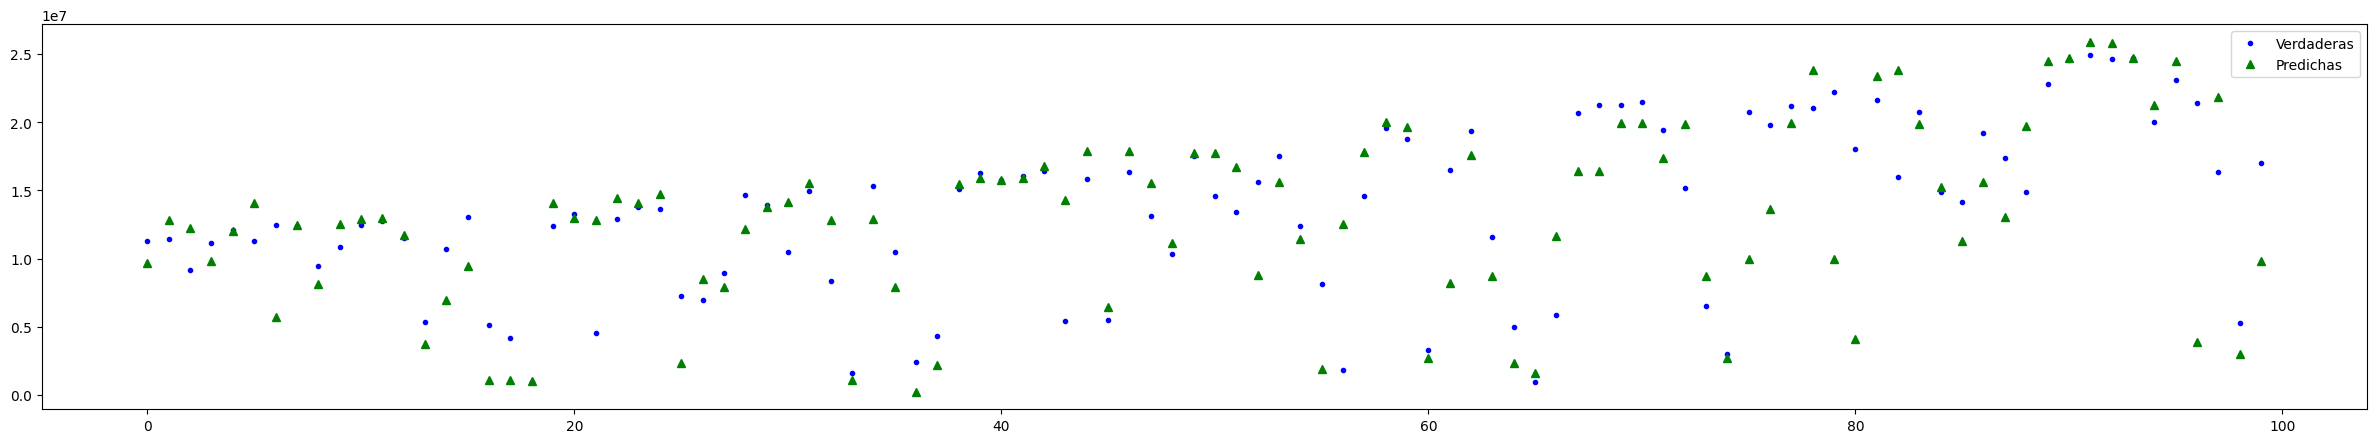

In [ ]:
#Métrica: RMSE

#Creación del modelo
regr = DecisionTreeRegressor()
np.random.seed(23)

#Entrenamiento y medición de tiempo
start_time = time.time()
regr.fit(X_train, y_train)
end_time = time.time()

training_time = end_time - start_time

#Predicciones en el conjunto de test
y_pred = regr.predict(X_test)

#Precisión
rmse_tree = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print(f"RMSE: {rmse_tree}")
print("Tiempo de entrenamiento: {:.2f} segundos".format(training_time))
pintaResultados(regr,100)

MAE: 3043958.7835616437
Tiempo de entrenamiento: 0.23 segundos


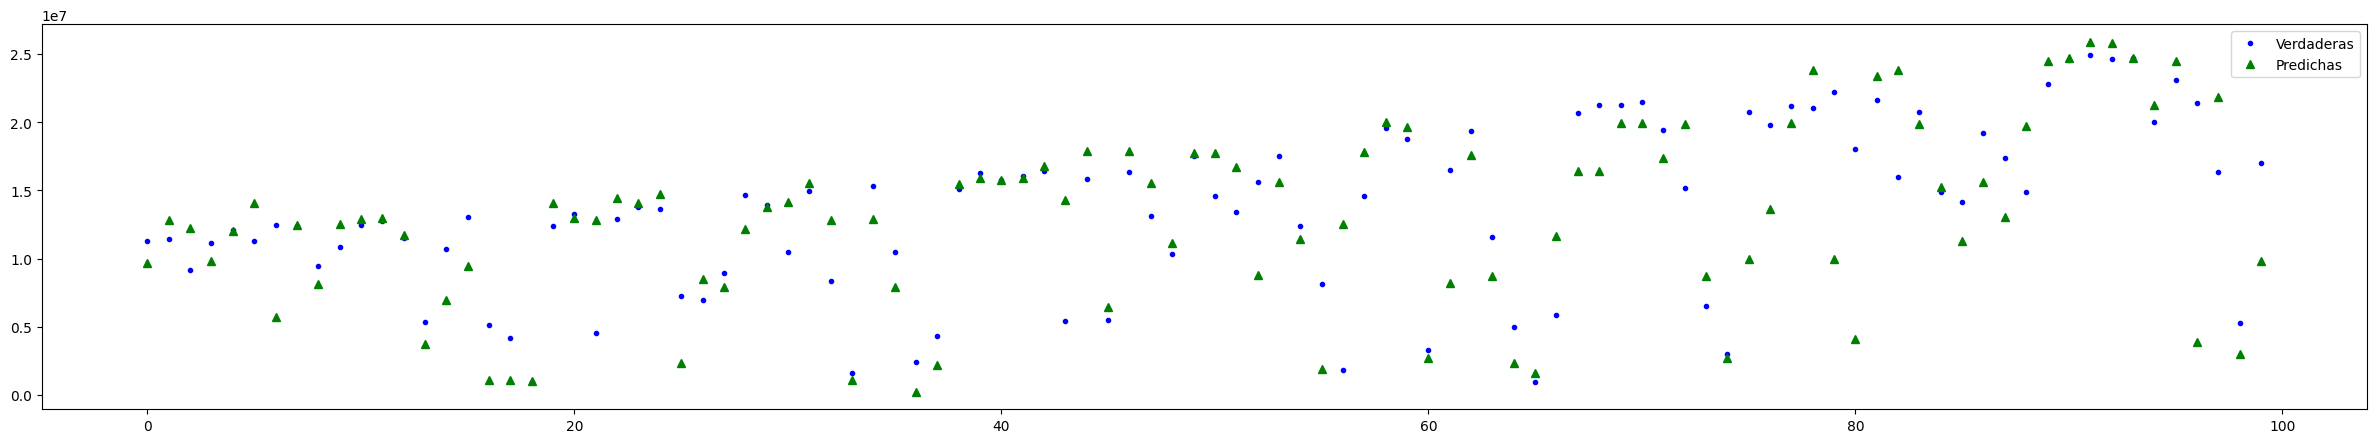

In [ ]:
#Métrica: MAE

#Creación del modelo
regr = DecisionTreeRegressor()
np.random.seed(23)

#Entrenamiento y medición de tiempo
start_time = time.time()
regr.fit(X_train, y_train)
end_time = time.time()

training_time = end_time - start_time

#Predicciones en el conjunto de test
y_pred = regr.predict(X_test)

#Precisión
mae_tree = metrics.mean_absolute_error(y_test, y_pred)

print(f"MAE: {mae_tree}")
print("Tiempo de entrenamiento: {:.2f} segundos".format(training_time))
pintaResultados(regr,100)

### Modificación de hiperparámetros

In [ ]:
# Métrica: RMSE

# Semilla
np.random.seed(23)

# Creación del modelo
tree = DecisionTreeRegressor()

# Diccionario con los rangos de valores que se van a usar en RandomSearch
param_dist = {"max_depth": [3, 6, 7, 8, 9, 10, 20, None],
              "min_samples_split": [15, 20, 30, 40, 80]}
'''
Explicación detallada de hiperparámetros:
-- max_depth: establece la profundidad máxima del árbol
-- min_samples_split: establece el número mínimo de muestras necesarias para dividir un nodo interno
'''
# Búsqueda aleatoria de los hiperparámetros
rs = RandomizedSearchCV(tree, param_distributions=param_dist,
                        n_iter=10,
                        cv=ps,
                        scoring="neg_mean_squared_error",
                        random_state=23)
'''
Explicación detallada:
RandomizedSearchCV() toma distintos parámetros: estimator es el modelo a ajustar; param=distributions es un diccionario
con todos los hiperparámetros a ajustar y sus rangos de valores; cv es el método de la validación cruzada;
scoring es la métrica de evaluación; random_state se usa para la reproducibilidad de los datos (semilla); y n_jobs
indica el número de trabajos en paralelo que se ejecutan durante el ajuste del modelo. Cuando se establece en -1, el
modelo utiliza todos los procesadores disponibles en el equipo, es decir, trabaja en paralelo (pero puede aumentar
el uso de la memoria y CPU)
'''
# Entrenamiento y medición de tiempo
start_time = time.time()
rs.fit(X_train, y_train)
end_time = time.time()

training_time = end_time - start_time


# Predicciones y RMSE  del conjunto de test
y_pred_rs = rs.predict(X_test)
rmse_rs = np.sqrt(metrics.mean_squared_error(y_test, y_pred_rs))

y_pred_best = rs.best_estimator_.predict(X_test)
rmse_rs_best = np.sqrt(metrics.mean_squared_error(y_test, y_pred_best))

'''
Explicación detallada:
Medimos los errores del conjunto de test (que no se ha usado en el entrenamiento) con rmse_rs y rmse_rs_best.
Cuando usamos rs, se utiliza el modelo generado por RandomSearch, que es un modelo que se ha entrenado en una selección
aleatoria de hiperparámetros y, en consecuencia, no necesariamente con los mejores. Por tanto, el error de validación
cruzada calculado con este modelo puede tampoco ser el mejor. Por otro lado, utilizamos rs.best_estimator porque es
el mejor modelo encontrado durante la búsqueda aleatoria de hiperparámetros.
'''

print('Tiempo de entrenamiento con RandomizedSearchCV:', training_time, 'segundos')
print('Mejores hiperparámetros:', rs.best_params_)
print('Mejor score:', -rs.best_score_)
print('------------------------------------------------------------------------')
print('Predicciones y errores del conjunto de validación')
print(f"RMSE del árbol con hiperparámetros modificados: {rmse_rs}")
print(f"RMSE del árbol con hiperparámetros modificados (mejor modelo): {rmse_rs_best}")

Tiempo de entrenamiento con RandomizedSearchCV: 1.3326702117919922 segundos
Mejores hiperparámetros: {'min_samples_split': 80, 'max_depth': 7}
Mejor score: 17411211446589.707
------------------------------------------------------------------------
Predicciones y errores del conjunto de validación
RMSE del árbol con hiperparámetros modificados: 3589627.6442139056
RMSE del árbol con hiperparámetros modificados (mejor modelo): 3589627.6442139056


In [ ]:
# Métrica: MAE

# Semilla
np.random.seed(23)

# Creación del modelo
tree = DecisionTreeRegressor()

# Distribución de los hiperparámetros
param_dist = {"max_depth": [3, 6, 7, 8, 9, 10, 20, None],
              "min_samples_split": [15, 20, 30, 40, 80]}

# Búsqueda aleatoria de los hiperparámetros
rs = RandomizedSearchCV(tree, param_distributions=param_dist,
                        n_iter=10,
                        cv=ps,
                        scoring="neg_mean_absolute_error",
                        random_state=23)

# Entrenamiento y medición de tiempo
start_time = time.time()
rs.fit(X_train, y_train)
end_time = time.time()

training_time = end_time - start_time

# Predicciones y MAE  del conjunto de validación
y_pred_rs = rs.predict(X_test)
mae_rs = metrics.mean_absolute_error(y_test, y_pred_rs)

y_pred_best = rs.best_estimator_.predict(X_test)
mae_rs_best = metrics.mean_absolute_error(y_test, y_pred_best)


print('Tiempo de entrenamiento con RandomizedSearchCV:', training_time, 'segundos')
print('Mejores hiperparámetros:', rs.best_params_)
print('Mejor score:', -rs.best_score_)
print('------------------------------------------------------------------------')
print('Predicciones y errores del conjunto de validación')
print(f"MAE del árbol con hiperparámetros modificados: {mae_rs}")
print(f"MAE del árbol con hiperparámetros modificados (mejor modelo): {mae_rs_best}")

Tiempo de entrenamiento con RandomizedSearchCV: 1.2517132759094238 segundos
Mejores hiperparámetros: {'min_samples_split': 80, 'max_depth': 7}
Mejor score: 2713097.6178369494
------------------------------------------------------------------------
Predicciones y errores del conjunto de validación
MAE del árbol con hiperparámetros modificados: 2427557.97053641
MAE del árbol con hiperparámetros modificados (mejor modelo): 2427557.97053641


### Comentarios árboles

En ambos casos, para RMSE y MAE, el modelo mejora después de modificar los hiperparámetros con respecto al modelo por omisión. Los tiempos de entrenamiento son bajos, incluso depués de modificar los hiperparámetros con RandomizedSearchCV().

Con respecto a los hiperparámetros, un valor alto en 'max_depth' puede sobreajustarse a los datos de entrenamiento y tener un bajo rendimiento en los datos de prueba. Y, si es demasiado bajo, el árbol puede ser demasiado simple y tener un rendimiento pobre en ambos conjuntos de datos. Por otro lado, si 'min_samples_split' tiene un valor demasiado alto, el árbol puede ser demasiado simple y tener un mal rendimiento en ambos conjuntos de datos. Si es demasiado bajo, el árbol puede sobreajustarse a los datos de entrenamiento y tener un bajo rendimiento en el conjunto de prueba.

## kNN (k-Nearest Neighbors)

Modelo de aprendizaje supervisado utilizado en problemas de clasificación y regresión. Es una técnica de aprendizaje basada en instancias, es decir, utiliza directamente el conjunto de entrenamiento para hacer predicciones.

El modelo kNN clasifica las instancias de prueba basándose en las clases de sus k vecinos más cercanos en el conjunto de entrenamiento. Para cada instancia de prueba, el modelo encuentra los k vecinos más cercanos en el conjunto de entrenamiento y utiliza sus etiquetas de clase para predecir la etiqueta de clase de la instancia de prueba.

Para este caso, el **valor de k** es un **hiperparámetro** del modelo, que puede ser ajustado según las características del conjunto de datos.

### Omisión

Implementamos a continuación el código de kNN para regresión por omisión.

RMSE: 3386067.162354158
Tiempo de entrenamiento: 0.01 segundos


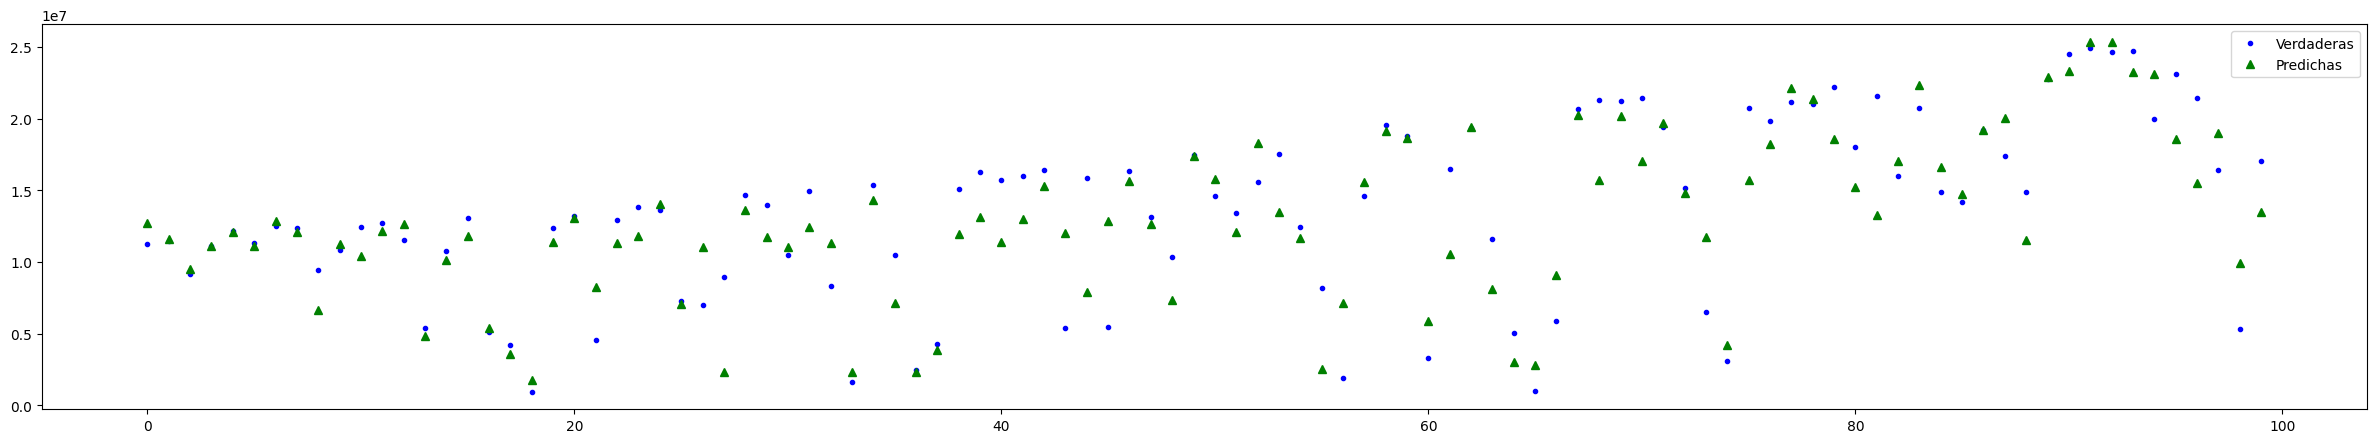

In [ ]:
#Métrica: RMSE

#Creación del modelo
regr = KNeighborsRegressor()
np.random.seed(23)

#Entrenamiento y medición de tiempo
start_time = time.time()
regr.fit(X_train, y_train)
end_time = time.time()

training_time = end_time - start_time

#Predicciones en el conjunto de test
y_pred = regr.predict(X_test)

#Precisión
rmse_knn = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print(f"RMSE: {rmse_knn}")
print("Tiempo de entrenamiento: {:.2f} segundos".format(training_time))
pintaResultados(regr,100)

MAE: 2326992.256438356
Tiempo de entrenamiento: 0.00 segundos


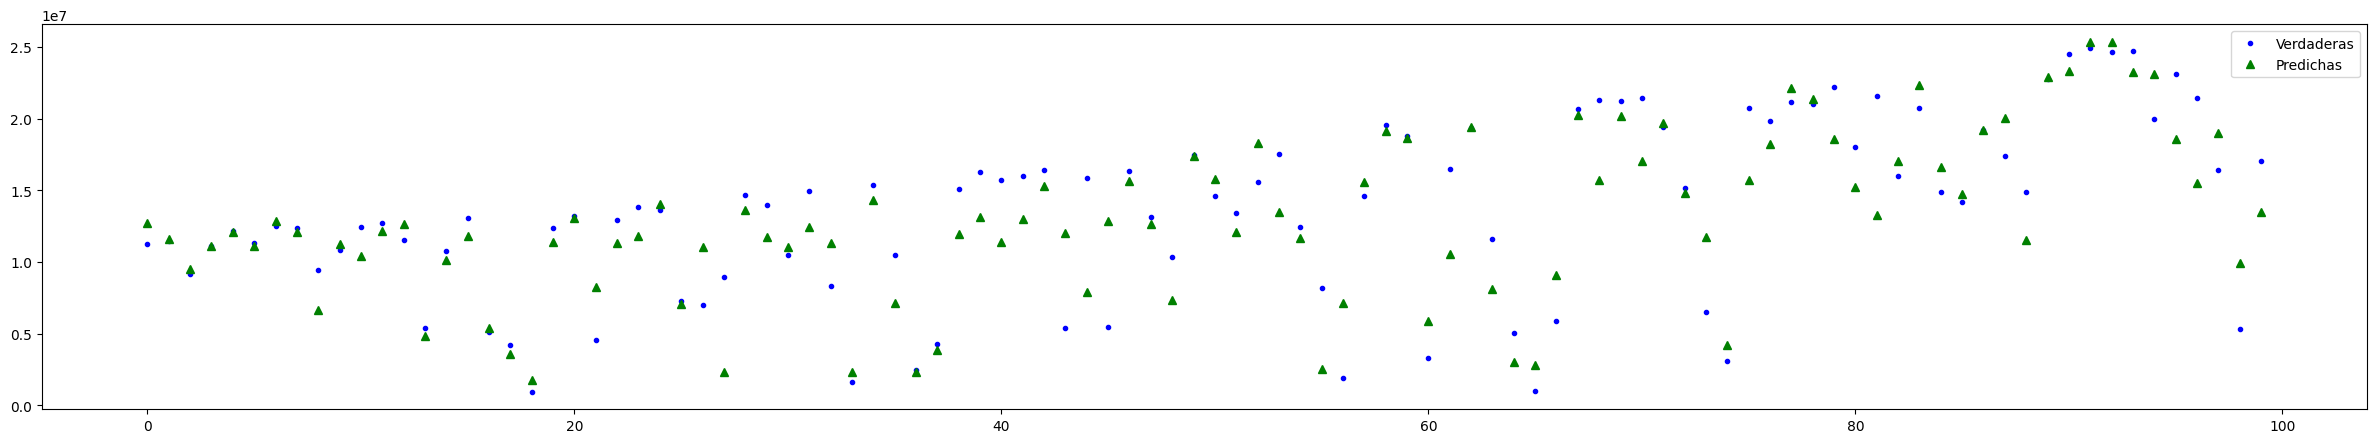

In [ ]:
#Métrica: MAE

#Creación del modelo
regr = KNeighborsRegressor()
np.random.seed(23)

#Entrenamiento y medición de tiempo
start_time = time.time()
regr.fit(X_train, y_train)
end_time = time.time()

training_time = end_time - start_time

#Predicciones en el conjunto de test
y_pred = regr.predict(X_test)

#Precisión
mae_knn = metrics.mean_absolute_error(y_test, y_pred)

print(f"MAE: {mae_knn}")
print("Tiempo de entrenamiento: {:.2f} segundos".format(training_time))
pintaResultados(regr,100)

### Modificación de hiperparámetros

In [ ]:
# Métrica: RMSE

# Semilla
np.random.seed(23)

# Valores de hiperparámetros a explorar
param_dist = {'n_neighbors': range(3, 40),
              'weights': ['uniform', 'distance'],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'metric': ['euclidean', 'manhattan']}
'''
Explicación detallada de hiperparámetros:
-- n_neighbors:  número de vecinos más cercanos que se utilizarán para predecir la etiqueta de una instancia.
-- weights: ponderación de los vecinos más cercanos. Puede ser "uniforme", que significa que todos los
vecinos tienen el mismo peso, o "distance", que da más peso a los vecinos más cercanos.
-- algorithm: algoritmo utilizado para encontrar los vecinos más cercanos. Los valores posibles son: "brute", que
utiliza una búsqueda exhaustiva; "ball_tree", que utiliza una estructura de datos de árbol para acelerar la
búsqueda; "kd_tree", que utiliza una estructura de datos de árbol diferente pero también acelera la búsqueda; y
"auto", que selecciona automáticamente el algoritmo más adecuado según la cantidad de instancias y características.
-- metric: métrica utilizada para calcular la distancia entre las instancias.
'''
# Mdelo base
knn = KNeighborsRegressor()

# Búsqueda aleatoria de hiperparámetros
rs = RandomizedSearchCV(knn, param_distributions=param_dist, n_iter=10,
                                  cv=ps, scoring='neg_mean_squared_error', random_state=23)

start_time = time.time()
rs.fit(X_train, y_train)
end_time = time.time()

training_time = end_time - start_time

# Predicciones y RMSE  del conjunto de test
y_pred_rs = rs.predict(X_test)
rmse_rs = np.sqrt(metrics.mean_squared_error(y_test, y_pred_rs))

y_pred_best = rs.best_estimator_.predict(X_test)
rmse_rs_best = np.sqrt(metrics.mean_squared_error(y_test, y_pred_best))


print('Tiempo de entrenamiento con RandomizedSearchCV:', training_time, 'segundos')
print('Mejores hiperparámetros:', rs.best_params_)
print('Mejor score:', -rs.best_score_)
print('------------------------------------------------------------------------')
print('Predicciones y errores del conjunto de test')
print(f"RMSE de kNN con hiperparámetros modificados: {rmse_rs}")
print(f"RMSE de KNN con hiperparámetros modificados (mejor modelo): {rmse_rs_best}")

Tiempo de entrenamiento con RandomizedSearchCV: 2.869654655456543 segundos
Mejores hiperparámetros: {'weights': 'distance', 'n_neighbors': 16, 'metric': 'manhattan', 'algorithm': 'kd_tree'}
Mejor score: 15894448262645.58
------------------------------------------------------------------------
Predicciones y errores del conjunto de test
RMSE de kNN con hiperparámetros modificados: 3158545.195620883
RMSE de KNN con hiperparámetros modificados (mejor modelo): 3158545.195620883


In [ ]:
# Métrica MAE

# Semilla
np.random.seed(23)

# Valores de los hiperparámetros a explorar
param_dist = {'n_neighbors': range(3, 40),
              'weights': ['uniform', 'distance'],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'metric': ['euclidean', 'manhattan']}

# Modelo base
knn = KNeighborsRegressor()

# Búsqueda aleatoria de hiperparámetros
rs = RandomizedSearchCV(knn, param_distributions=param_dist, n_iter=10,
                                  cv=ps, scoring='neg_mean_absolute_error', random_state=23)

start_time = time.time()
rs.fit(X_train, y_train)
end_time = time.time()

training_time = end_time - start_time

# Predicciones y RMSE  del conjunto de test
y_pred_rs = rs.predict(X_test)
mae_rs = metrics.mean_absolute_error(y_test, y_pred_rs)

y_pred_best = rs.best_estimator_.predict(X_test)
mae_rs_best = metrics.mean_absolute_error(y_test, y_pred_best)


print('Tiempo de entrenamiento con RandomizedSearchCV:', training_time, 'segundos')
print('Mejores hiperparámetros:', rs.best_params_)
print('Mejor score:', -rs.best_score_)
print('------------------------------------------------------------------------')
print('Predicciones y errores del conjunto de validación')
print(f"MAE de kNN con hiperparámetros modificados: {mae_rs}")
print(f"MAE de kNN con hiperparámetros modificados (mejor modelo): {mae_rs_best}")

Tiempo de entrenamiento con RandomizedSearchCV: 4.7614405155181885 segundos
Mejores hiperparámetros: {'weights': 'distance', 'n_neighbors': 16, 'metric': 'manhattan', 'algorithm': 'kd_tree'}
Mejor score: 2560631.310787349
------------------------------------------------------------------------
Predicciones y errores del conjunto de validación
MAE de kNN con hiperparámetros modificados: 2143486.2264099102
MAE de kNN con hiperparámetros modificados (mejor modelo): 2143486.2264099102


### Comentarios kNN

Los errores, tanto RMSE como MAE, mejoran después de la modificación de hiperparámetros, sobre todo MAE, y el tiempo de entrenamiento es prácticamente nulo en los modelos por omisión, mientras que en las modificaciones aumenta a unos pocos segundos.

El hiperparámetro k, que en el código se ve con n_neighbors, es el más importante de todos. Un valor demasiado bajo puede hacer que el modelo tenga un alto sesgo, mientras que elegir un valor demasiado alto puede hacer que el modelo tenga una alta varianza (Trade-off entre bias y variance).




## Regresión (algoritmo)

Modelo de aprendizaje supervisado que se utiliza para modelar la relación entre una variable de salida continua (la variable objetivo) y una o más variables de entrada (las variables independientes). Se trata encontrar la mejor línea recta que ajuste los datos de entrada, minimizando la diferencia entre los valores predichos y los valores reales. Esto se logra ajustando los coeficientes (o pesos) de las variables de entrada. El modelo resultante se puede utilizar para predecir valores de la variable de salida para nuevos valores de las variables de entrada.

Los **hiperparámetros** en el modelo de regresión lineal incluyen la **regularización** y el **método de optimización**, que utiliza, por ejemplo, el **descenso del gradiente** como función que ajusta los pesos de manera iterativa en función de la **tasa de aprendizaje**. Estos hiperparámetros se utilizan para controlar el sobreajuste del modelo y mejorar el rendimiento.

### Omisión

El algoritmo de regresión lineal, por defecto, en la librearía scikit-learn, utiliza la resolución por mínimos cuadrados para encontrar los coeficientes óptimos del modelo.

RMSE: 3111318.494474111
Tiempo de entrenamiento: 0.02 segundos


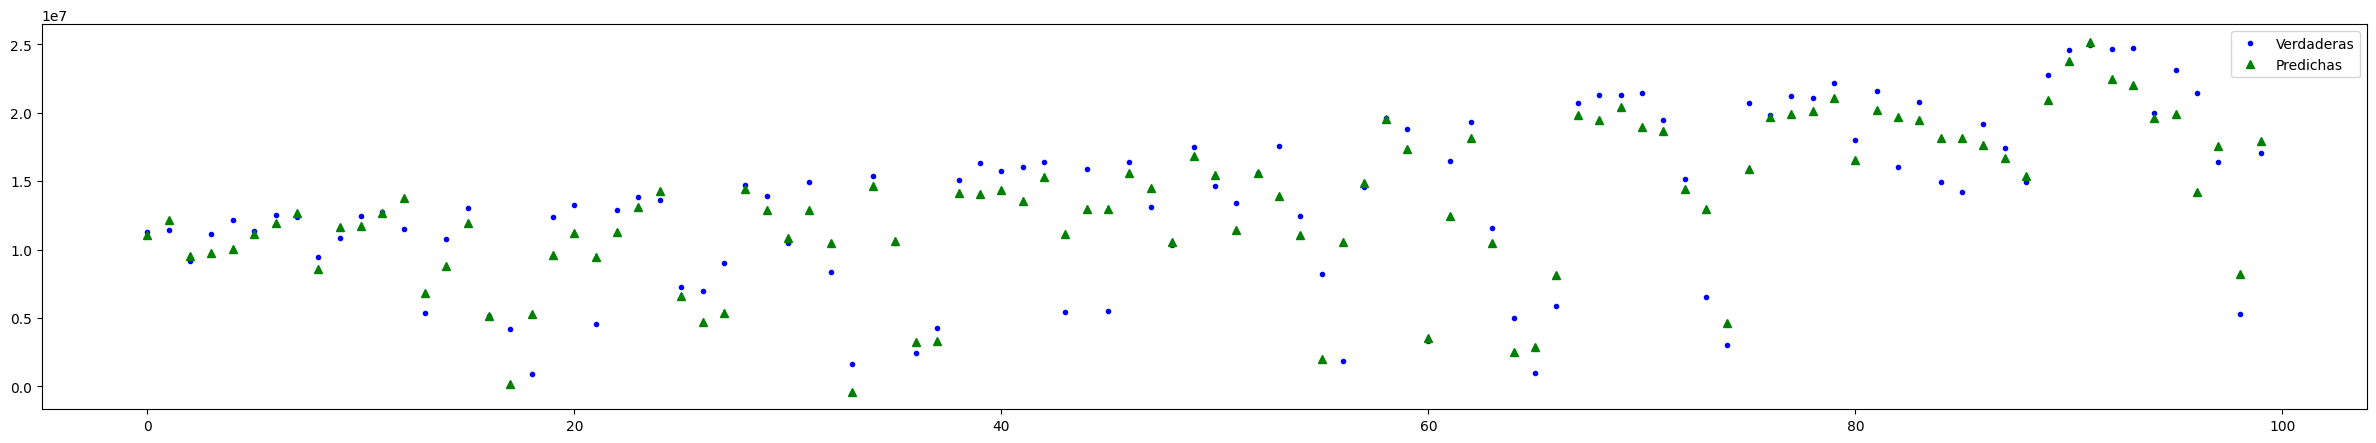

In [ ]:
#Métrica: RMSE

#Creación del modelo
regr = LinearRegression()
np.random.seed(23)

#Entrenamiento y medición de tiempo
start_time = time.time()
regr.fit(X_train, y_train)
end_time = time.time()

training_time = end_time - start_time

#Predicciones en el conjunto de test
y_pred = regr.predict(X_test)

#Precisión
rmse_regr = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print(f"RMSE: {rmse_regr}")
print("Tiempo de entrenamiento: {:.2f} segundos".format(training_time))
pintaResultados(regr,100)

MAE: 2134287.5209668134
Tiempo de entrenamiento: 0.05 segundos


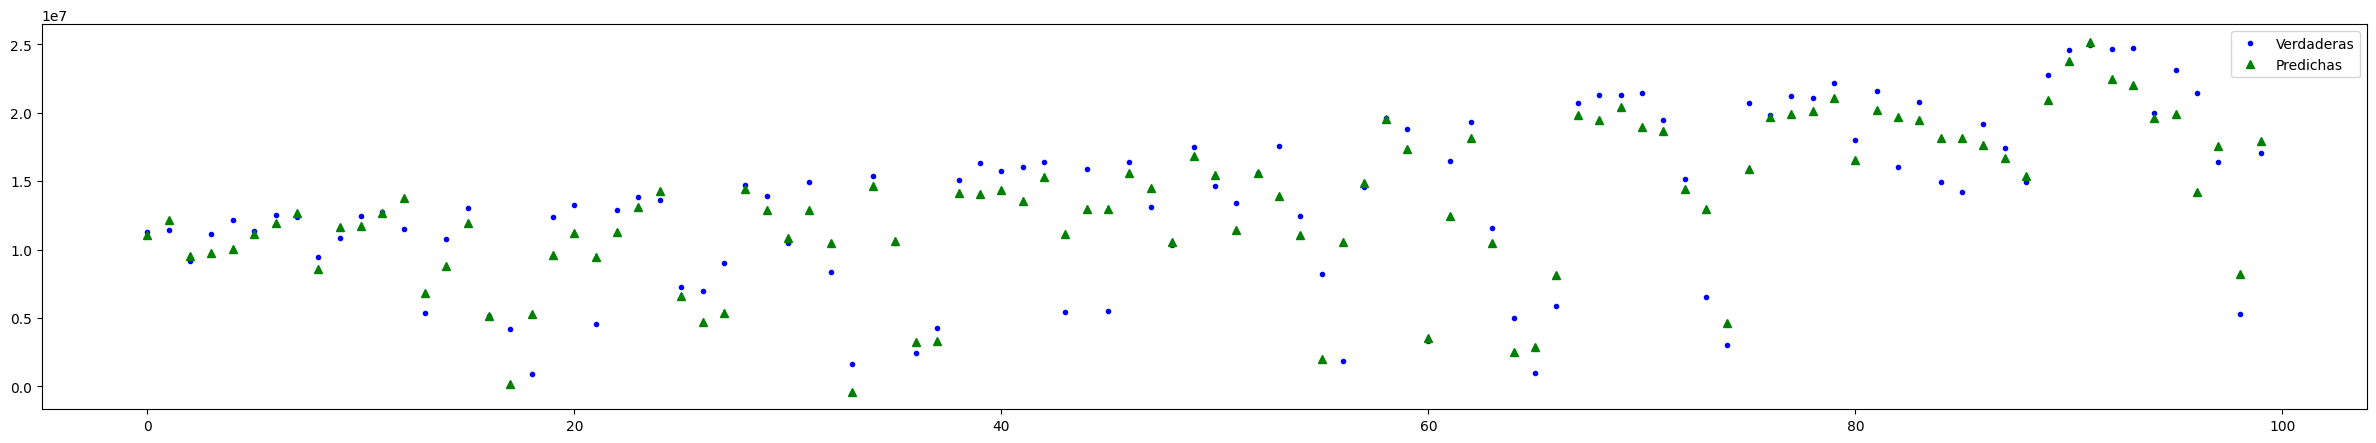

In [ ]:
#Métrica: MAE

#Creación del modelo
regr = LinearRegression()
np.random.seed(23)

#Entrenamiento y medición de tiempo
start_time = time.time()
regr.fit(X_train, y_train)
end_time = time.time()

training_time = end_time - start_time

#Predicciones en el conjunto de test
y_pred = regr.predict(X_test)

#Precisión
mae_regr = metrics.mean_absolute_error(y_test, y_pred)

print(f"MAE: {mae_regr}")
print("Tiempo de entrenamiento: {:.2f} segundos".format(training_time))
pintaResultados(regr,100)

### Modificación de hiperparámetros

Comprobamos los tres tipos de regularización: Ridge, Lasso y ElasticNet, y los medimos con RMSE (MSE es el error por defecto en estos modelos) y MAE. Y utilizamos SGDR porque así también controlamos el método de optimización, Descento del gradiente, a través de su tasa de aprendizaje

Primero declaramos las funciones para los errores que utilizaremos en los tres modelos y luego los implementamos.

In [ ]:
# Función de error RMSE
def rmse(y_test, y_test_pred):
  """ RMSE """
  return np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

In [ ]:
def mae(y_test, y_test_pred):
  """ MAE """
  return metrics.mean_absolute_error(y_test, y_test_pred)

Ridge, Lasso y Elastic Net son los únicos algoritmos que vamos a evaluar los errores con el mismo entrenamiento, en vez de separarlo por métrica, tal y como hemos visto en los tutoriales

Tiempo de entrenamiento: 2.3758039474487305 segundos
RMSE de regresión lineal - Ridge: 3094941.534783735
MAE de regresión lineal - Ridge: 2122167.8785343706


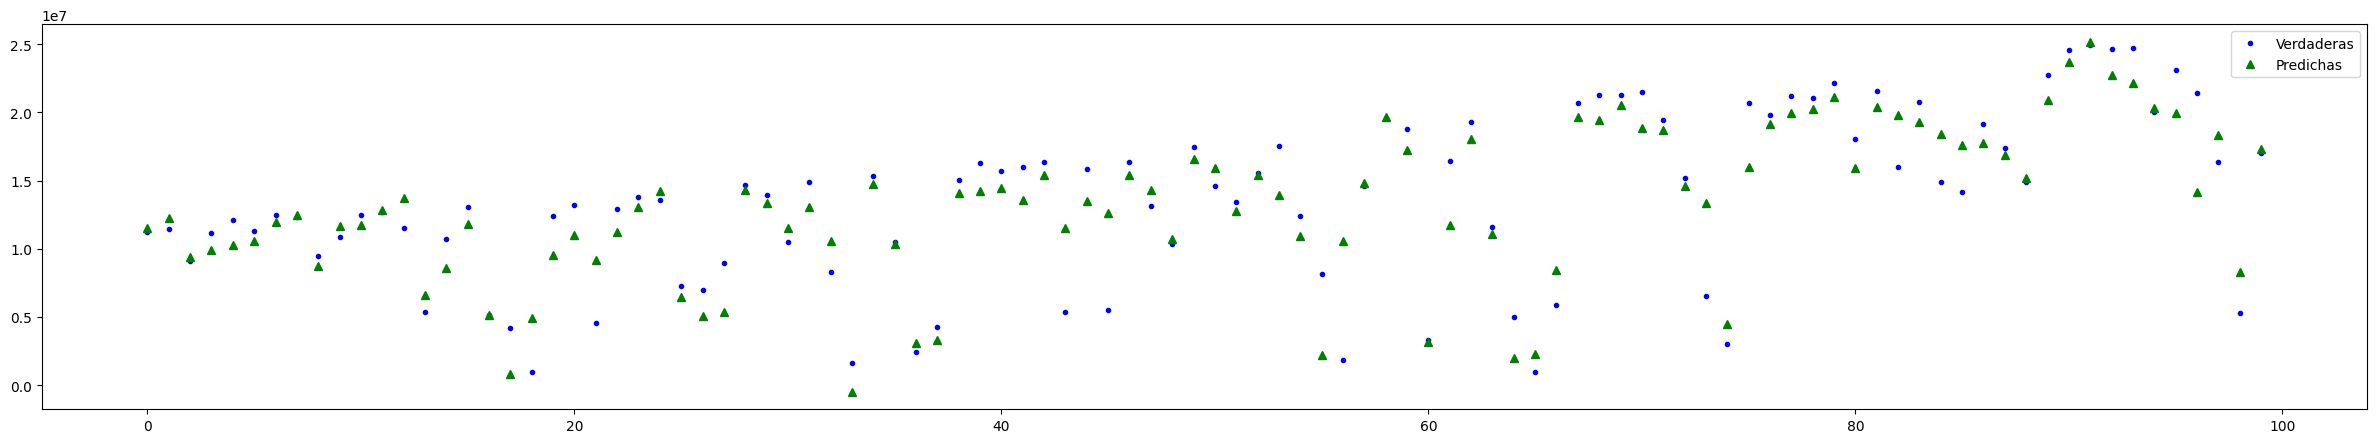

In [ ]:
# Ridge
regrRidge = RidgeCV(
            alphas = np.logspace(-3, 8, 200),
            cv = ps)
'''
Explicación detallada de los parámetros:
-- alphas:  valores de alfa que se utilizan en la validación cruzada. En este caso, es una secuencia logarítmica
de 200 valores entre 10^-3 y 10^8.
-- cv: establece el método de validación cruzada, que en nuestro caso va a ser PredefinedSplit()
'''

np.random.seed(23)
start_time = time.time()
_ = regrRidge.fit(X = X_train, y = y_train)
end_time = time.time()

training_time = end_time - start_time

print('Tiempo de entrenamiento:', training_time, 'segundos')
print(f"RMSE de regresión lineal - Ridge: {rmse(y_test, regrRidge.predict(X=X_test))}")
print(f"MAE de regresión lineal - Ridge: {mae(y_test, regrRidge.predict(X=X_test))}")
pintaResultados(regrRidge, 100)

Tiempo de entrenamiento: 2.2957582473754883 segundos
RMSE de regresión lineal: 3105359.0777443447
MAE de regresión lineal: 2146793.451895548


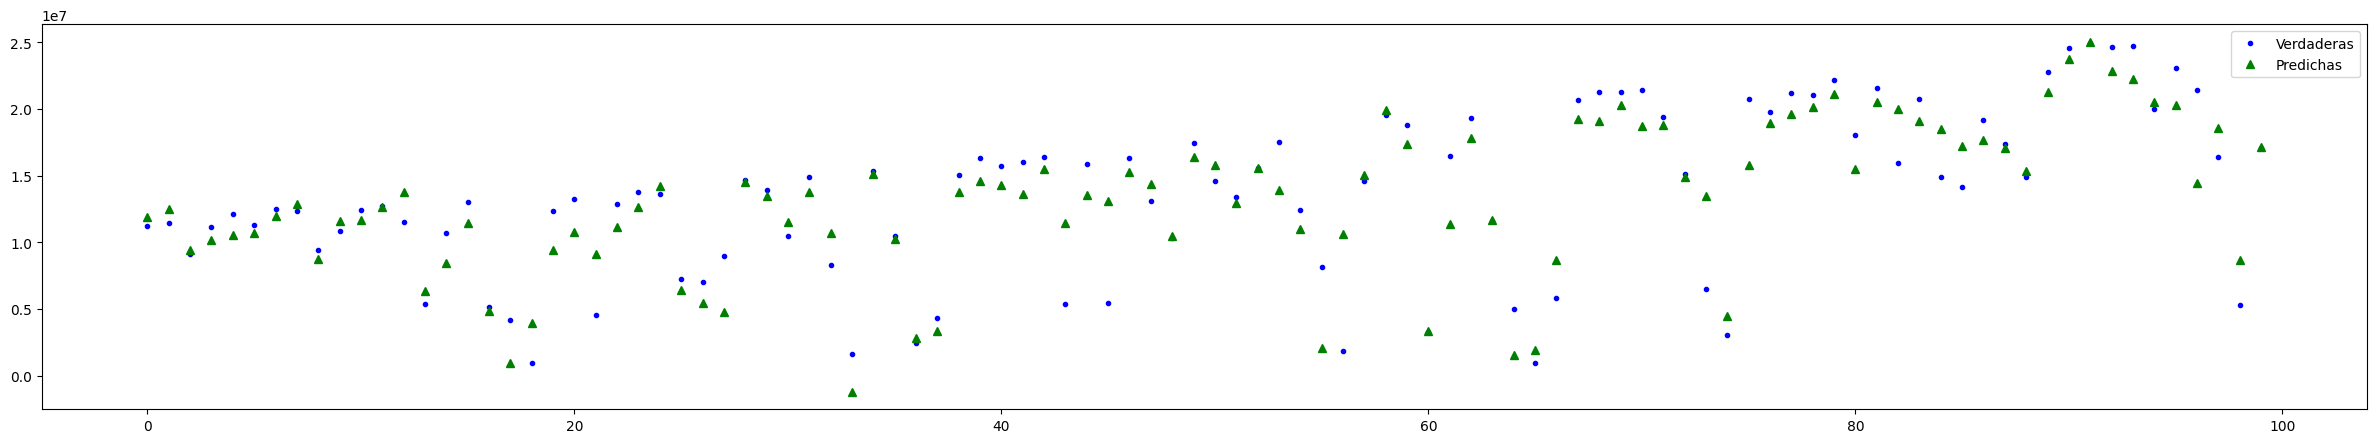

In [ ]:
# Lasso
regrLasso = LassoCV(
            alphas = np.logspace(-9, 3, 200),
            cv = ps)

np.random.seed(23)

start_time = time.time()
_ = regrLasso.fit(X = X_train, y = y_train)
end_time = time.time()

training_time = end_time - start_time

print('Tiempo de entrenamiento:', training_time, 'segundos')
print(f"RMSE de regresión lineal: {rmse(y_test, regrLasso.predict(X=X_test))}")
print(f"MAE de regresión lineal: {mae(y_test, regrLasso.predict(X=X_test))}")
pintaResultados(regrLasso, 100)

Tiempo de entrenamiento: 12.51642370223999 segundos
RMSE de regresión lineal: 3106717.6520767785
MAE de regresión lineal: 2148506.7711643013


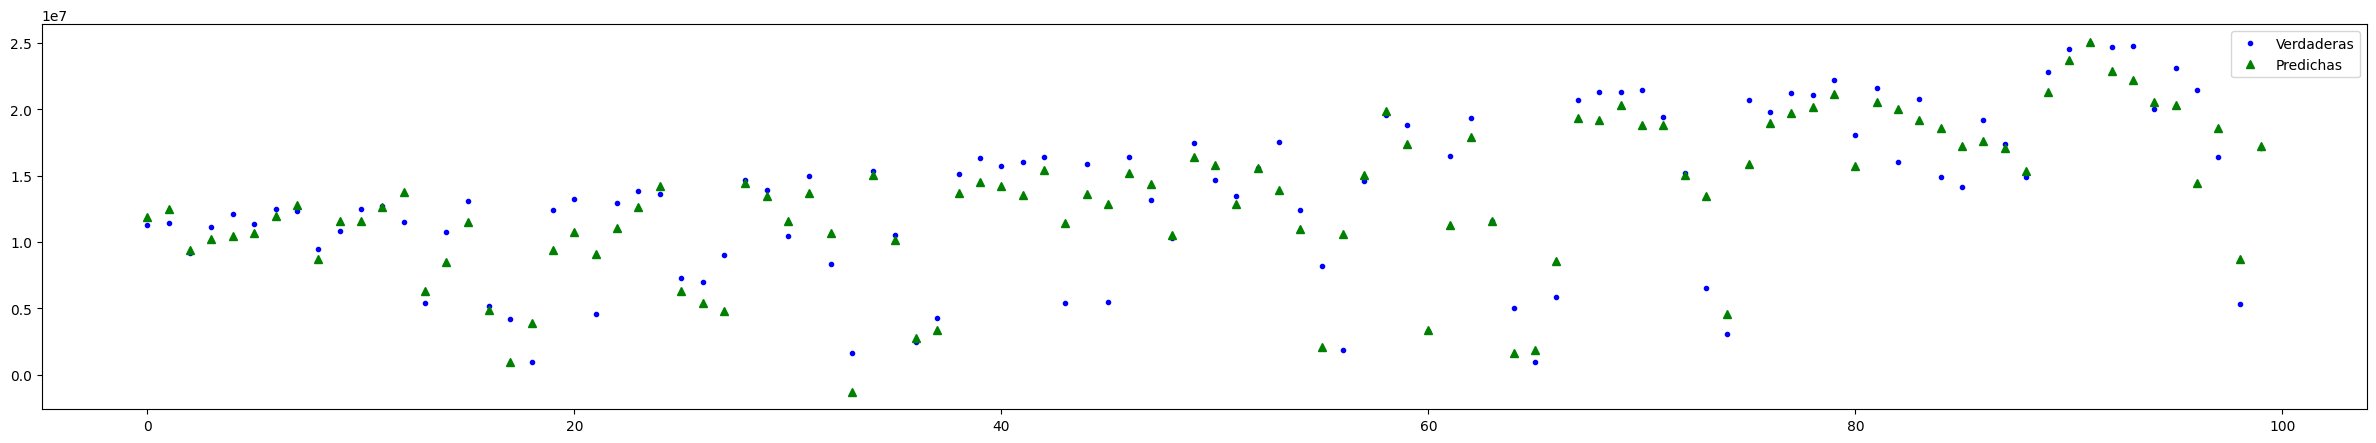

In [ ]:
# ElasticNet
regrElastic = ElasticNetCV(
            l1_ratio = [0, 0.1, 0.5, 0.7, 0.9, 0.95, 0.99],
            alphas = np.logspace(-10, 3, 200),
            cv = ps)
'''
Explicación detallada de parámetro:
-- l1_ratio: controla la mezcla de la regularización L1 y L2. Este parámetro toma valores entre 0 y 1,
donde 0 significa que se aplica la regularización L2 (Ridge) y 1 significa que se aplica la regularización L1 (Lasso).
Y cuuando el valor de l1_ratio se encuentra entre 0 y 1, se utiliza la regularización elástica (Elastic Net), que
combina las características de las otras dos técnicas.
'''
np.random.seed(23)
start_time = time.time()
_ = regrElastic.fit(X = X_train, y = y_train)
end_time = time.time()

training_time = end_time - start_time

print('Tiempo de entrenamiento:', training_time, 'segundos')
print(f"RMSE de regresión lineal: {rmse(y_test, regrElastic.predict(X=X_test))}")
print(f"MAE de regresión lineal: {mae(y_test, regrElastic.predict(X=X_test))}")
pintaResultados(regrElastic, 100)

Otra forma de modificar los hiperparámetros es con SGDRegressor(), que utiliza la técnica Gradient Descent para el ajuste óptimo. En este caso declaramos el diccionario param_dist, como en modelos anteriores, y utilizamos hiperparámetros como 'penalty' para controlar el tipo de regularización, y 'learning_rate', que es la tasa de aprendizaje que ajusta la función del Descenso del Gradiente.

In [ ]:
# Métrica: RMSE

# Semilla
np.random.seed(23)

# Valores de los hiperparámetros a explorar
param_dist = {
    'alpha': np.logspace(-4, 0, 100),
    'max_iter': [300000, 500000],
    'tol': [1e-4, 1e-3, 1e-2],
    'penalty': ['l1', 'l2', 'elasticnet'],
    'l1_ratio': np.linspace(0.01, 1.0, 100),
    'learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive']
}

'''
Explicación detalla de los hiperparámetros:
-- alpha: término de regularización que controla la fuerza de la penalización L2.
-- max_iter: número máximo de iteraciones permitidas para la optimización del algoritmo.
-- tol: tolerancia para la detección de convergencia del algoritmo. Es un número decimal
positivo que especifica la precisión para la solución óptima.
-- penalty: tipo de penalización a utilizar. Puede ser 'l1' para la penalización L1 (Lasso), 'l2' para
la penalización L2 (Ridge) o 'elasticnet' para la combinación de ambas.
-- l1_ratio: arámetro de mezcla L1/L2 para la penalización elasticnet. Es un número decimal en el rango de
0 a 1, que indica la mezcla deseada entre las penalizaciones L1 y L2.
-- learning_rate:  tasa de aprendizaje a utilizar. Puede ser 'constant' para una tasa de aprendizaje constante,
'optimal' para una tasa de aprendizaje que se estima automáticamente, 'invscaling' para una tasa de aprendizaje
que disminuye gradualmente con el tiempo, o 'adaptive' para una tasa de aprendizaje que se adapta automáticamente
a la magnitud de las actualizaciones.
'''

# Creación del modelo
regr = SGDRegressor() #Utiliza la función Gradient Descent

# Búsqueda aleatoria de hiperparámetros
rs = RandomizedSearchCV(regr, param_distributions=param_dist, n_iter=15,
                                  cv=ps, scoring='neg_mean_squared_error', random_state=23, n_jobs=-1)


start_time = time.time()
rs.fit(X_train, y_train)
end_time = time.time()

training_time = end_time - start_time

# Predicciones y RMSE  del conjunto de test
y_pred_rs = rs.predict(X_test)
rmse_rs = np.sqrt(metrics.mean_squared_error(y_test, y_pred_rs))

y_pred_best = rs.best_estimator_.predict(X_test)
rmse_rs_best = np.sqrt(metrics.mean_squared_error(y_test, y_pred_best))

print('Tiempo de entrenamiento con RandomizedSearchCV:', training_time, 'segundos')
print('Mejores hiperparámetros:', rs.best_params_)
print('Mejor score:', -rs.best_score_)
print('------------------------------------------------------------------------')
print('Predicciones y errores del conjunto de validación')
print(f"RMSE del regresor lineal con hiperparámetros modificados: {rmse_rs}")
print(f"RMSE del regresor lineal con hiperparámetros modificados (mejor modelo): {rmse_rs_best}")

Tiempo de entrenamiento con RandomizedSearchCV: 13.926881313323975 segundos
Mejores hiperparámetros: {'tol': 0.001, 'penalty': 'l1', 'max_iter': 500000, 'learning_rate': 'invscaling', 'l1_ratio': 0.56, 'alpha': 0.43287612810830617}
Mejor score: 14364687726740.47
------------------------------------------------------------------------
Predicciones y errores del conjunto de validación
RMSE del regresor lineal con hiperparámetros modificados: 3087268.267122528
RMSE del regresor lineal con hiperparámetros modificados (mejor modelo): 3087268.267122528


In [ ]:
# Métrica: MAE

# Semilla
np.random.seed(23)

# Valores de los hiperparámetros a explorar
param_dist = {
    'alpha': np.logspace(-4, 0, 100),
    'max_iter': [300000, 500000],
    'tol': [1e-4, 1e-3, 1e-2],
    'penalty': ['l1', 'l2', 'elasticnet'],
    'l1_ratio': np.linspace(0.01, 1.0, 100),
    'learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive']
}

# Creación del modelo
regr = SGDRegressor() #Utiliza la función Gradient Descent

# Búsqueda aleatoria de hiperparámetros
rs = RandomizedSearchCV(regr, param_distributions=param_dist, n_iter=10,
                                  cv=ps, scoring='neg_mean_absolute_error', random_state=23)


start_time = time.time()
rs.fit(X_train, y_train)
end_time = time.time()

training_time = end_time - start_time

# Predicciones y MAE  del conjunto de test
y_pred_rs = rs.predict(X_test)
mae_rs = metrics.mean_absolute_error(y_test, y_pred_rs)

y_pred_best = rs.best_estimator_.predict(X_test)
mae_rs_best = metrics.mean_absolute_error(y_test, y_pred_best)


print('Tiempo de entrenamiento con RandomizedSearchCV:', training_time, 'segundos')
print('Mejores hiperparámetros:', rs.best_params_)
print('Mejor score:', -rs.best_score_)
print('------------------------------------------------------------------------')
print('Predicciones y errores del conjunto de validación')
print(f"MAE del regresor lineal con hiperparámetros modificados: {mae_rs}")
print(f"MAE del regresor lineal con hiperparámetros modificados (mejor modelo): {mae_rs_best}")


Tiempo de entrenamiento con RandomizedSearchCV: 7.9292449951171875 segundos
Mejores hiperparámetros: {'tol': 0.001, 'penalty': 'elasticnet', 'max_iter': 300000, 'learning_rate': 'invscaling', 'l1_ratio': 0.43, 'alpha': 0.0002782559402207126}
Mejor score: 2428655.356817932
------------------------------------------------------------------------
Predicciones y errores del conjunto de validación
MAE del regresor lineal con hiperparámetros modificados: 2211694.4904945567
MAE del regresor lineal con hiperparámetros modificados (mejor modelo): 2211694.4904945567


### Comentarios regresión

Los errores RMSE y MAE no cambian apenas al usar los tres tipos de regularización por separado, ni siquiera nuestra implementación con SGDRegressor mejora de forma notable. Los tiempos de entrenamiento son rápidos por omisión y en las regularizaciones L1 y L2, mientras que para ElasticNet y SGDRegressor llega, por primera vez en el Notebook, a la decena de segundos.

##Conclusiones de los métodos básicos

El mejor método hasta ahora es, considerando principalmente el error RMSE, el de regresión, en concreto, Regresión con Ridge y nuestra implementación del regresor con el Descenso del Gradiente (SGDRegressor()). En realidad, todos los algoritmos de regresión se encuentran en un rango del error parecido, en torno a los 3,1 millones. El método más rápido por omisión es kNN, pero, al modificar los hiperparámetros los árboles, junto a algunas de las regularizaciones de la regresión consiguen un menor tiempo. En general, el ajuste de hiperparámetros sí mejora el modelo con respecto a los valores por omisión, y sí que se puede decir que hay un equilibrio entre el tiempo de ejecución y mejora de los resultados. Esa mejora del error al ajustar los hiperparámetros se puede sacrificar con un poco más de tiempo de entrenamiento.

Por otro lado, el regresor Naive es un modelo muy simple que se utiliza como una línea base para comparar el rendimiento de otros modelos más complejos. Debido a su simplicidad, es rápido de entrenar y ejecutar, lo que lo hace útil para probar rápidamente nuevas ideas y como punto de partida para desarrollar modelos más avanzados.

Es, por tanto, esperable que el rendimiento de nuestros modelos sea superior al de este, dado que asume una predicción constante, independientemente de las características de entrada. En el ejemplo de a cotinuación vamos a implementar este tipo de regresor con la media como medida de tendencia central.

In [ ]:
# Regresor Naive

# Valor medio de los datos de entrenamiento
y_train_mean = np.mean(y_train)

# Array con la longitud del conjunto de prueba y llenarlo con el valor medio
y_pred = np.full(len(y_test), y_train_mean)

# RMSE y MAE
rmse = np.sqrt(np.mean((y_test - y_pred) ** 2))
mae = np.mean(np.abs(y_test - y_pred))

print("RMSE:", rmse)
print("MAE:", mae)
'''
Explicación detallada: este regresor no utiliza ninguna información de los datos de entrenamiento
para hacer predicciones, sino que utiliza otras estrategias como, por ejemplo, predecir el valor medio
de los datos de entrenamiento.
'''

RMSE: 7801304.7931992235
MAE: 6705721.965126664


'\nExplicación detallada: este regresor no utiliza ninguna información de los datos de entrenamiento \npara hacer predicciones, sino que utiliza otras estrategias como, por ejemplo, predecir el valor medio \nde los datos de entrenamiento.\n'

Efectivamente, el error de predicción es considerablemente más alto que el de nuestros modelos, incluso que los que son por omisión, por lo que podemos tener certeza de dónde está el umbral básico y hacia dónde enfocar nuestro ajuste de hiperparámetros.

De hecho, es importante superar un regresor básico como este por el hecho de que, en su estrategia simple como la medida de la media o mediana, no tiene en cuenta las complejidades y patrones más sutiles que existen en los datos. Al construir modelos más sofisticados, se espera que se capturen esas dificultades y se hagan predicciones más precisas.

# Métodos avanzados

Los métodos avanzados que estudiamos son tres: SVM, Random Forest y XGBoost.

## SVM (Support Vector Machine)

Modelo de aprendeizaje supervisado que puede resolver problemas de clasificación y regresión.

Con respecto a la regresión, en lugar de tratar de encontrar una función que separe los datos de diferentes clases, el objetivo es encontrar una función que modele la relación entre las variables de entrada y la variable de salida continua. En la regresión SVM, el algoritmo busca encontrar una línea o un hiperplano que mejor se ajuste a los datos, minimizando la distancia entre los puntos de datos y la línea de regresión.

SVM tiene tres **hiperparámetros**: **C**, que es el parámetro de regularización y que controla el equilibrio entre la precisión del modelo y la capacidad para generalizar; el **tipo de kernel**, que puede ser lineal, radial, polinómico y sigmoidal; y **gamma**, parámetro del kernel utilizado para controlar la forma de la función de decisión.

### Omisión

El algoritmo de Support Vector Machine, por defecto, en la librearía scikit-learn, utiliza el tipo de kernel radial (RBF), pero también vamos a estudiar el kernel lineal

RMSE: 7808101.263707731
Tiempo de entrenamiento: 1.33 segundos


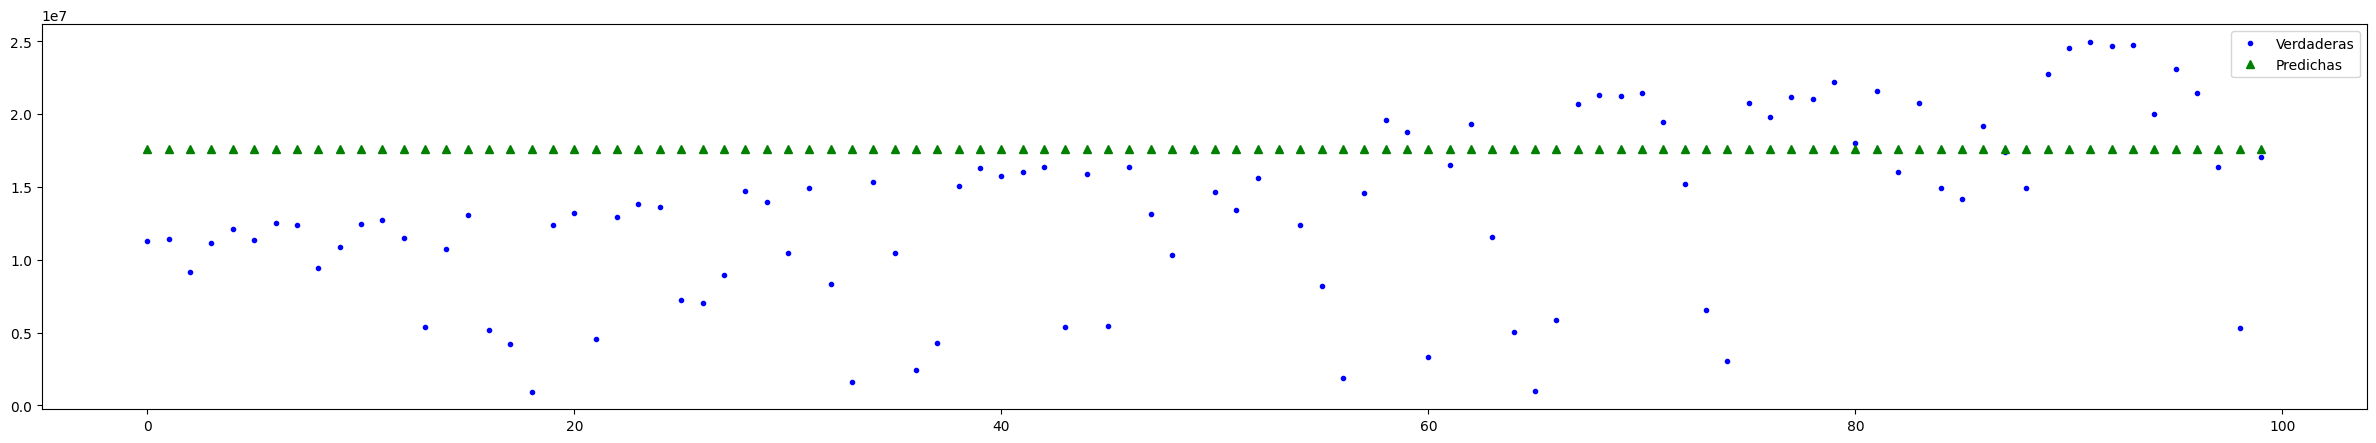

In [ ]:
#Métrica: RMSE

#Creación del modelo (por defecto utiliza el radial)
regr = SVR()
np.random.seed(23)

#Entrenamiento y medición de tiempo
start_time = time.time()
regr.fit(X_train, y_train)
end_time = time.time()

training_time = end_time - start_time

#Predicciones en el conjunto de test
y_pred = regr.predict(X_test)

#Precisión
rmse_svr = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print(f"RMSE: {rmse_svr}")
print("Tiempo de entrenamiento: {:.2f} segundos".format(training_time))
pintaResultados(regr,100)

MAE: 6713339.381314242
Tiempo de entrenamiento: 0.67 segundos


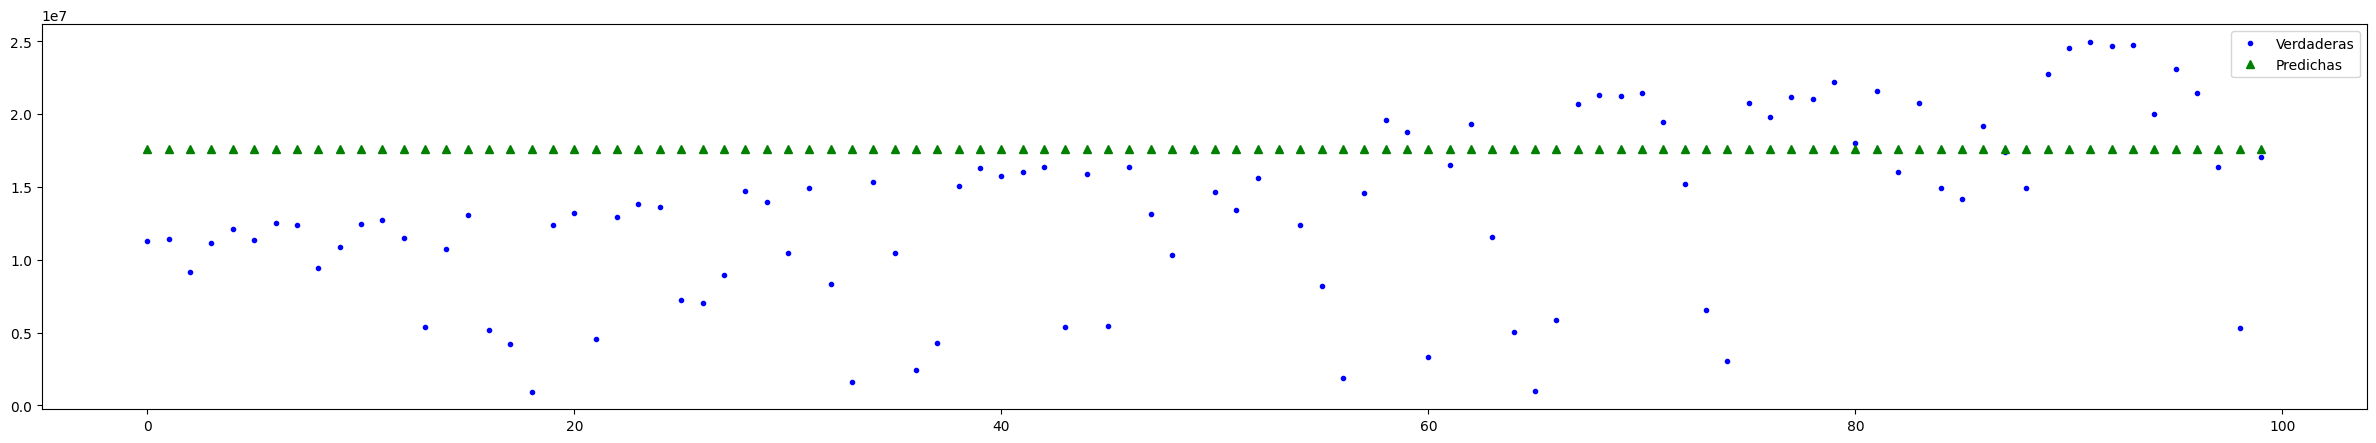

In [ ]:
#Métrica: MAE

#Creación del modelo
regr = SVR()
np.random.seed(23)

#Entrenamiento y medición de tiempo
start_time = time.time()
regr.fit(X_train, y_train)
end_time = time.time()

training_time = end_time - start_time

#Predicciones en el conjunto de test
y_pred = regr.predict(X_test)

#Precisión
mae_svr = metrics.mean_absolute_error(y_test, y_pred)

print(f"MAE: {mae_svr}")
print("Tiempo de entrenamiento: {:.2f} segundos".format(training_time))
pintaResultados(regr,100)

RMSE: 7734189.828495879
Tiempo de entrenamiento: 0.50 segundos


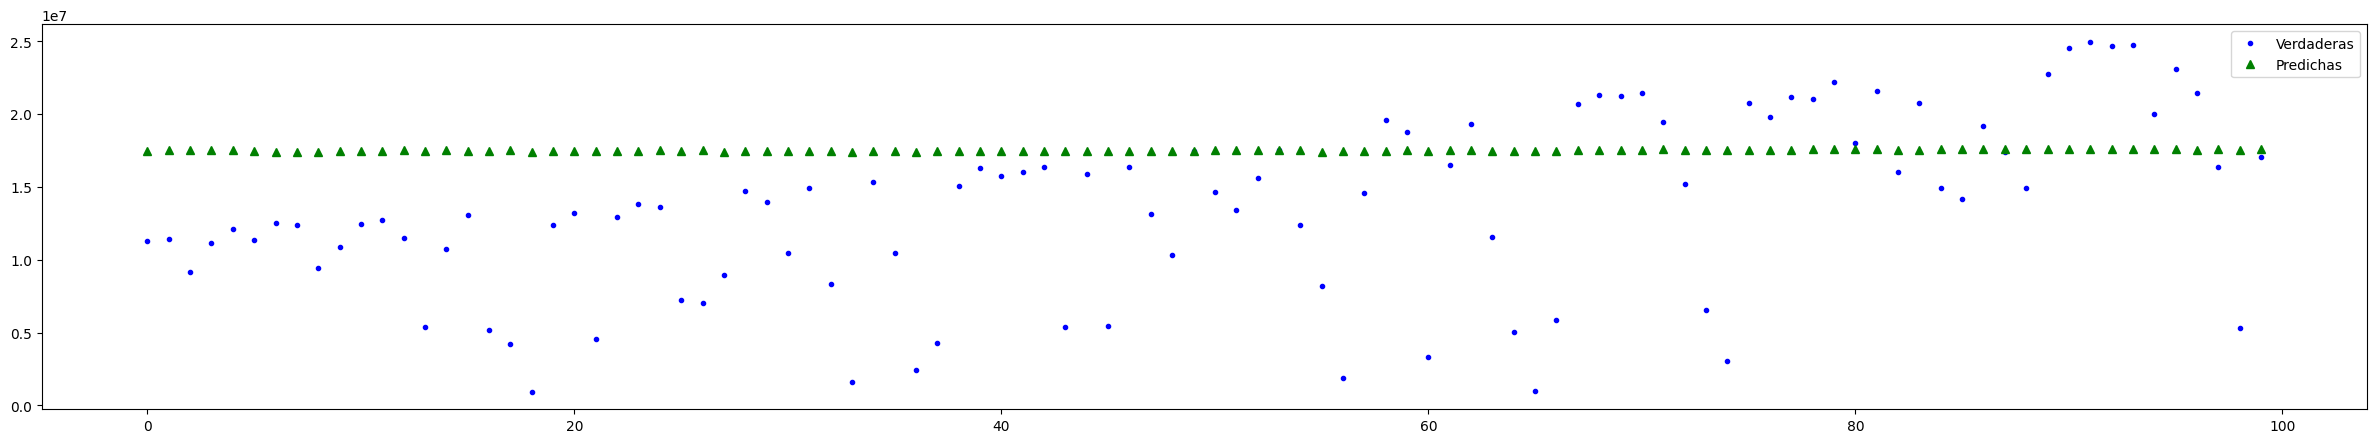

In [ ]:
# Linear kernel
# Métrica: RMSE

#Creación del modelo
regr = SVR(kernel='linear')
np.random.seed(23)

#Entrenamiento y medición de tiempo
start_time = time.time()
regr.fit(X_train, y_train)
end_time = time.time()

training_time = end_time - start_time

#Predicciones en el conjunto de test
y_pred = regr.predict(X_test)

#Precisión
rmse_svr = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print(f"RMSE: {rmse_svr}")
print("Tiempo de entrenamiento: {:.2f} segundos".format(training_time))
pintaResultados(regr,100)

MAE: 6644569.838421978
Tiempo de entrenamiento: 0.49 segundos


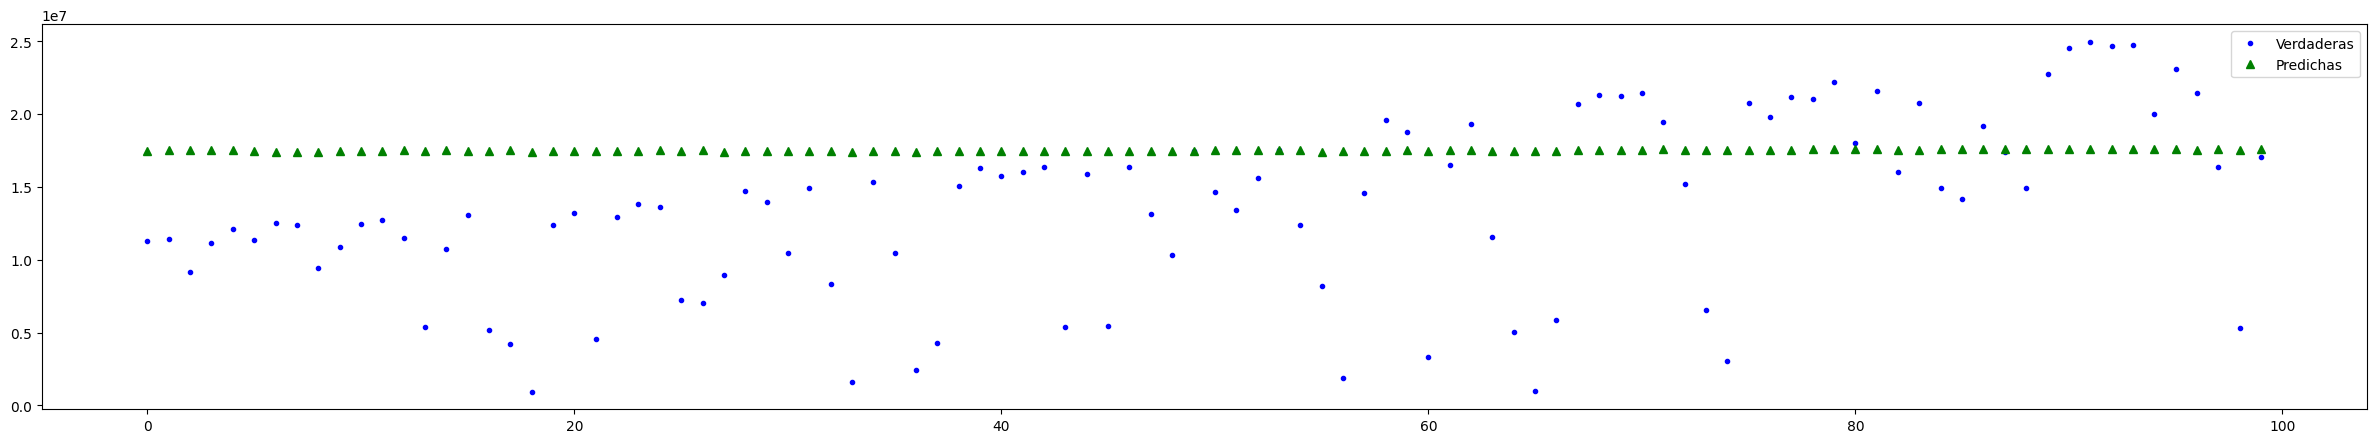

In [ ]:
# Linear kernel
# Métrica: MAE

#Creación del modelo
regr = SVR(kernel='linear')
np.random.seed(23)

#Entrenamiento y medición de tiempo
start_time = time.time()
regr.fit(X_train, y_train)
end_time = time.time()

training_time = end_time - start_time

#Predicciones en el conjunto de test
y_pred = regr.predict(X_test)

#Precisión
mae_svr = metrics.mean_absolute_error(y_test, y_pred)

print(f"MAE: {mae_svr}")
print("Tiempo de entrenamiento: {:.2f} segundos".format(training_time))
pintaResultados(regr,100)

### Modificación de hiperparámetros

De la misma manera que anterior, vamos a comparar el ajuste de hiperparámetros tanto para el kernel radial como para ael lineal. Es importante mencionar que el hiperparámetro C sirve para todos los tipos de kernel, mientras que gamma sólo está presente en los radiales.

In [ ]:
# Métrica RMSE

# Semilla
np.random.seed(23)

# Hiperparámetros
param_dist = {'C': [100, 200, 300, 1000],
              'gamma': [0.01, 0.001, 0.0001]}

'''
Explicación detallada de los hiperparámetros:
-- C: parámetro de regularización que controla el balance entre minimizar la función de pérdida y
tener un margen amplio.
-- gamma: parámetro que controla la forma de la función de kernel utilizada.
'''
# Modelo
svm = SVR()

# Búsqueda aleatoria de hiperparámetros
rs = RandomizedSearchCV(svm, param_distributions=param_dist, n_iter=5,
                                  cv=ps, scoring='neg_mean_squared_error', random_state=23)


start_time = time.time()
rs.fit(X_train, y_train)
end_time = time.time()

training_time = end_time - start_time

# Predicciones y RMSE  del conjunto de test
y_pred_rs = rs.predict(X_test)
rmse_rs = np.sqrt(metrics.mean_squared_error(y_test, y_pred_rs))

y_pred_best = rs.best_estimator_.predict(X_test)
rmse_rs_best = np.sqrt(metrics.mean_squared_error(y_test, y_pred_best))

print('Tiempo de entrenamiento con RandomizedSearchCV:', training_time, 'segundos')
print('Mejores hiperparámetros:', rs.best_params_)
print('Mejor score:', -rs.best_score_)
print('------------------------------------------------------------------------')
print('Predicciones y errores del conjunto de validación')
print(f"RMSE de SVM con hiperparámetros modificados: {rmse_rs}")
print(f"RMSE de SVM con hiperparámetros modificados (mejor modelo): {rmse_rs_best}")


Tiempo de entrenamiento con RandomizedSearchCV: 4.061869144439697 segundos
Mejores hiperparámetros: {'gamma': 0.01, 'C': 1000}
Mejor score: 57252977623158.266
------------------------------------------------------------------------
Predicciones y errores del conjunto de validación
RMSE de SVM con hiperparámetros modificados: 7473088.808878614
RMSE de SVM con hiperparámetros modificados (mejor modelo): 7473088.808878614


In [ ]:
# Métrica MAE

# Semilla
np.random.seed(23)

#Hiperparámetros
param_dist = {'C': [100, 200, 300, 1000],
              'gamma': [0.01, 0.001, 0.0001]}
# Modelo
svm = SVR()

# Búsqueda aleatoria de hiperparámetros
rs = RandomizedSearchCV(svm, param_distributions=param_dist, n_iter=15,
                                  cv=ps, scoring='neg_mean_absolute_error', random_state=23)

start_time = time.time()
rs.fit(X_train, y_train)
end_time = time.time()

training_time = end_time - start_time

# Predicciones y MAE  del conjunto de test
y_pred_rs = rs.predict(X_test)
mae_rs = metrics.mean_absolute_error(y_test, y_pred_rs)

y_pred_best = rs.best_estimator_.predict(X_test)
mae_rs_best = metrics.mean_absolute_error(y_test, y_pred_best)

print('Tiempo de entrenamiento con RandomizedSearchCV:', training_time, 'segundos')
print('Mejores hiperparámetros:', rs.best_params_)
print('Mejor score:', -rs.best_score_)
print('------------------------------------------------------------------------')
print('Predicciones y errores del conjunto de validación')
print(f"MAE de SVM con hiperparámetros modificados: {mae_rs}")
print(f"MAE de SVM con hiperparámetros modificados (mejor modelo): {mae_rs_best}")


Tiempo de entrenamiento con RandomizedSearchCV: 8.105930089950562 segundos
Mejores hiperparámetros: {'gamma': 0.01, 'C': 1000}
Mejor score: 6522142.894315678
------------------------------------------------------------------------
Predicciones y errores del conjunto de validación
MAE de SVM con hiperparámetros modificados: 6381492.411191436
MAE de SVM con hiperparámetros modificados (mejor modelo): 6381492.411191436


In [ ]:
# Linear kernel
# Métrica RMSE

# Semilla
np.random.seed(23)

# Hiperparámetros
param_dist = {'C': [700, 1000, 2000, 5000]}

'''
Explicación detallada de los hiperparámetros:
-- C: parámetro de regularización que controla el balance entre minimizar la función de pérdida y
tener un margen amplio.
-- gamma: parámetro que controla la forma de la función de kernel utilizada.
-- kernel: función kernel utilizada para transformar los datos de entrada a un espacio de mayor dimensionalidad.
'''
# Modelo
svm = SVR(kernel='linear')

# Búsqueda aleatoria de hiperparámetros
rs = RandomizedSearchCV(svm, param_distributions=param_dist, n_iter=5,
                                  cv=ps, scoring='neg_mean_squared_error', random_state=23)


start_time = time.time()
rs.fit(X_train, y_train)
end_time = time.time()

training_time = end_time - start_time

# Predicciones y RMSE  del conjunto de test
y_pred_rs = rs.predict(X_test)
rmse_rs = np.sqrt(metrics.mean_squared_error(y_test, y_pred_rs))

y_pred_best = rs.best_estimator_.predict(X_test)
rmse_rs_best = np.sqrt(metrics.mean_squared_error(y_test, y_pred_best))

print('Tiempo de entrenamiento con RandomizedSearchCV:', training_time, 'segundos')
print('Mejores hiperparámetros:', rs.best_params_)
print('Mejor score:', -rs.best_score_)
print('------------------------------------------------------------------------')
print('Predicciones y errores del conjunto de validación')
print(f"RMSE de SVM lineal con hiperparámetros modificados: {rmse_rs}")
print(f"RMSE de SVM lineal con hiperparámetros modificados (mejor modelo): {rmse_rs_best}")


Tiempo de entrenamiento con RandomizedSearchCV: 2.0707995891571045 segundos
Mejores hiperparámetros: {'C': 5000}
Mejor score: 16538283847186.195
------------------------------------------------------------------------
Predicciones y errores del conjunto de validación
RMSE de SVM lineal con hiperparámetros modificados: 3258487.815408109
RMSE de SVM lineal con hiperparámetros modificados (mejor modelo): 3258487.815408109


In [ ]:
# Linear kernel
# Métrica MAE

# Semilla
np.random.seed(23)

#Hiperparámetros
param_dist = {'C': [700, 1000, 2000, 5000]}

# Modelo
svm = SVR(kernel='linear')

# Búsqueda aleatoria de hiperparámetros
rs = RandomizedSearchCV(svm, param_distributions=param_dist, n_iter=15,
                                  cv=ps, scoring='neg_mean_absolute_error', random_state=23)

start_time = time.time()
rs.fit(X_train, y_train)
end_time = time.time()

training_time = end_time - start_time

# Predicciones y MAE  del conjunto de test
y_pred_rs = rs.predict(X_test)
mae_rs = metrics.mean_absolute_error(y_test, y_pred_rs)

y_pred_best = rs.best_estimator_.predict(X_test)
mae_rs_best = metrics.mean_absolute_error(y_test, y_pred_best)

print('Tiempo de entrenamiento con RandomizedSearchCV:', training_time, 'segundos')
print('Mejores hiperparámetros:', rs.best_params_)
print('Mejor score:', -rs.best_score_)
print('------------------------------------------------------------------------')
print('Predicciones y errores del conjunto de validación')
print(f"MAE de SVM lineal con hiperparámetros modificados: {mae_rs}")
print(f"MAE de SVM lineal con hiperparámetros modificados (mejor modelo): {mae_rs_best}")


Tiempo de entrenamiento con RandomizedSearchCV: 2.7250916957855225 segundos
Mejores hiperparámetros: {'C': 5000}
Mejor score: 2503703.2164177108
------------------------------------------------------------------------
Predicciones y errores del conjunto de validación
MAE de SVM lineal con hiperparámetros modificados: 2090347.2784734282
MAE de SVM lineal con hiperparámetros modificados (mejor modelo): 2090347.2784734282


### Comentarios SVM

Los errores de los modelos por emisión son muy altos, pero, al modificar los hiperparámetros, y sólo en el kernel lineal, el error desciende a un valor esperable. Los tiempos de entrenamiento son rápidos por omisión, y en el ajuste aumentan un poco.

Para el hiperparámetro C, un valor mayor producirá un modelo más rígido y generalizado, que no se ajusta bien a los datos de entrenamiento pero generaliza mejor para datos nuevos. Si C es más pequeño, significa que es un modelo más flexible, y permitiría ajustarse mejor a los datos de entrenamiento, aunque es posible que se de el sobreaprendizaje del modelo.

## Random Forest

Modelo de aprendizaje supervisado para problemas de regresión y clasificación que combina múltiples árboles de decisión para mejorar el rendimiento y reducir el sobreaprendizaje. Cada árbol es construido a partir de una muestra aleatoria de datos de entrenamiento y un conjunto aleatorio de características, y la salida final del modelo es el promedio de las predicciones de todos los árboles individuales.

Es un proceso similar al de un árbol de decisión a secas, donde se selecciona la característica que proporciona la mayor ganancia de información y se divide el conjunto de datos en dos ramas en función del valor de esa característica, salvo que, en Random Forest, este proceso se repite varias veces con diferentes muestras de datos y diferentes subconjuntos de características.

En cuanto a **hiperparámetros**, los más importantes son: **n_estimators**, el número de árboles que se van a utilizar en el bosque; **max_depth**, la profundidad máxima de cada árbol; **min_samples_split**, el número mínimo de muestras que se necesitan en un nodo para que se divida en dos subnodos; **min_samples_leaf**, el número mínimo de muestras que se necesita en una hoja del árbol; y **max_features**, el número máximo de características que se utilizarán en cada árbol.

**Nota**: En RF y XGBoost vamos a utilizar n_jobs = -1 para que el modelo utiliza todos los procesadores disponibles en el equipo y tenga un menor tiempo de ejecución debido a la complejidad de estos algoritmos.

### Omisión

RMSE: 3088465.408709628
Tiempo de entrenamiento: 14.70 segundos


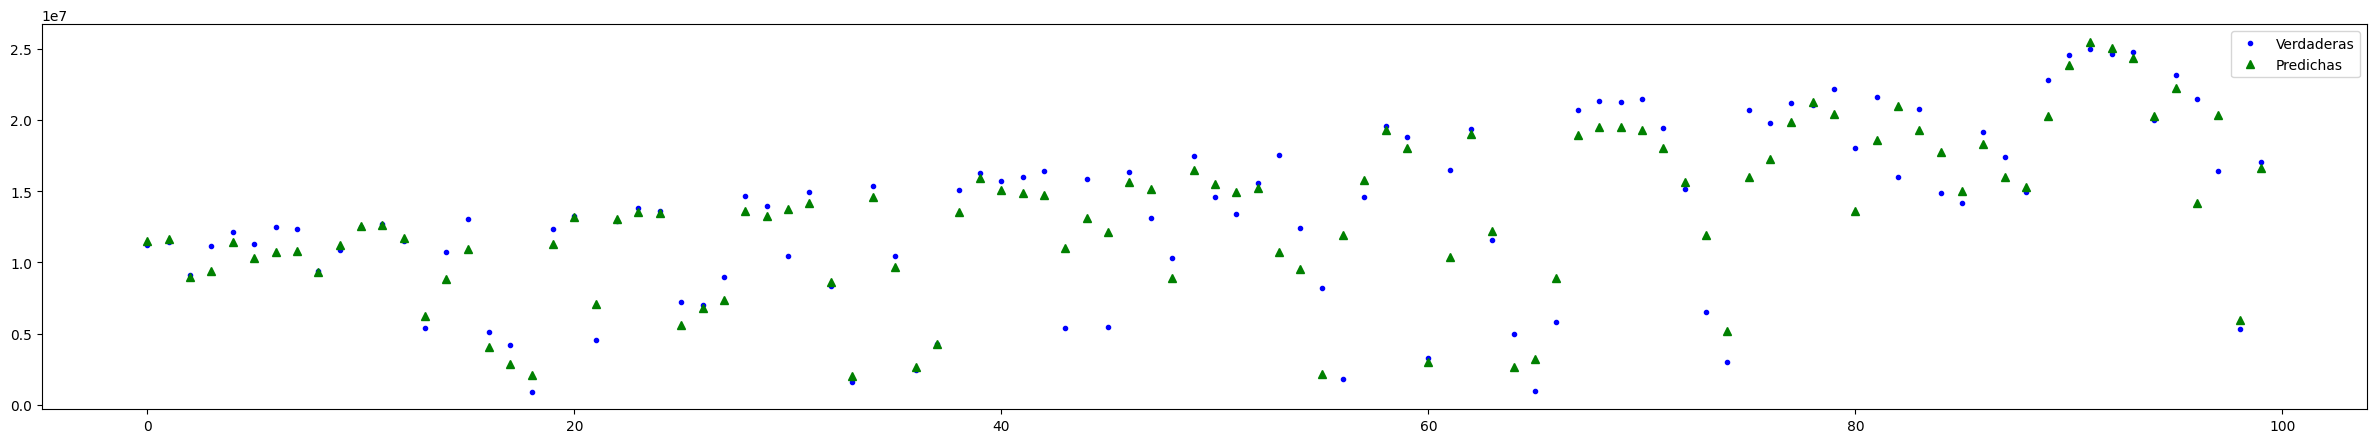

In [ ]:
#Métrica: RMSE

#Creación del modelo
regr = RandomForestRegressor()
np.random.seed(23)

#Entrenamiento y medición de tiempo
start_time = time.time()
regr.fit(X_train, y_train)
end_time = time.time()

training_time = end_time - start_time

#Predicciones en el conjunto de test
y_pred = regr.predict(X_test)

#Precisión
rmse_rf = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print(f"RMSE: {rmse_rf}")
print("Tiempo de entrenamiento: {:.2f} segundos".format(training_time))
pintaResultados(regr,100)

MAE: 2041913.0838356162
Tiempo de entrenamiento: 14.63 segundos


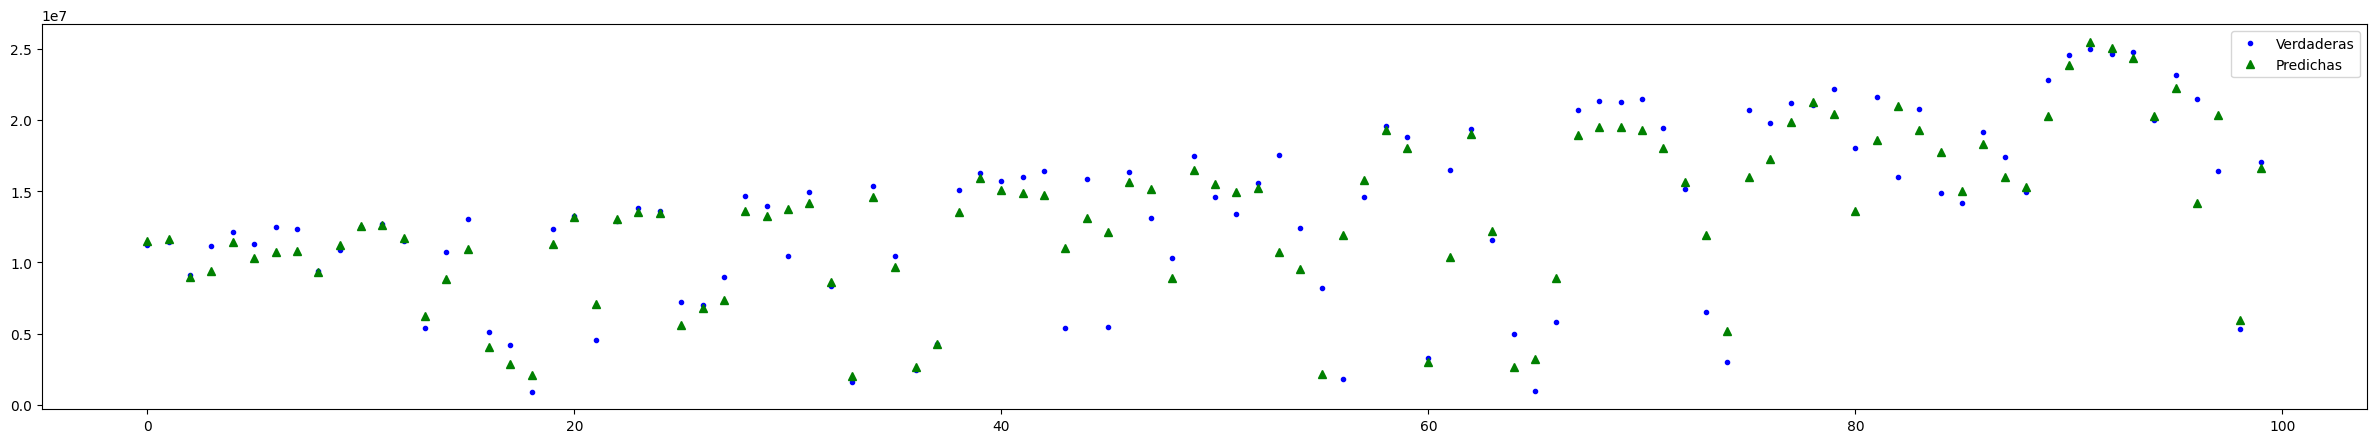

In [ ]:
#Métrica: MAE

#Creación del modelo
regr = RandomForestRegressor()
np.random.seed(23)

#Entrenamiento y medición de tiempo
start_time = time.time()
regr.fit(X_train, y_train)
end_time = time.time()

training_time = end_time - start_time

#Predicciones en el conjunto de test
y_pred = regr.predict(X_test)

#Precisión
mae_rf = metrics.mean_absolute_error(y_test, y_pred)

print(f"MAE: {mae_rf}")
print("Tiempo de entrenamiento: {:.2f} segundos".format(training_time))
pintaResultados(regr,100)

### Modificación de hiperparámetros

Vamos a implementar los modelos tanto para RandomForestRegressor() como para ExtraTreesRegressor(), que no aplican bootstraping (genera muestras aleatorias con reemplazo a partir de un conjunto de datos original) y utilizan todas las muestras disponibles. A la hora de elegir el nodo de partición, utilizan un valor aleatorio para los atributos disponibles, quedándose con el mejor.

In [ ]:
# Métrica RMSE

# Semilla
np.random.seed(23)

# valores de los hiperparámetros a explorar
param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

'''
Explicación detalla de los hiperparámetros:
-- n_estimators: número de árboles en el bosque.
-- max_depth: profundidad máxima de cada árbol en el bosque.
-- min_samples_split: número mínimo de muestras necesarias para dividir un nodo interno.
-- min_samples_leaf: número mínimo de muestras necesarias para una hoja.
-- max_features: número máximo de características a considerar al buscar la mejor división.
'''

# modelo base
regr = RandomForestRegressor()

# Búsqueda aleatoria de hiperparámetros
rs = RandomizedSearchCV(regr, param_distributions=param_dist, n_iter=10,
                                  cv=ps, scoring='neg_mean_squared_error', random_state=23, n_jobs=-1)

start_time = time.time()
rs.fit(X_train, y_train)
end_time = time.time()

training_time = end_time - start_time

# Predicciones y RMSE  del conjunto de test
y_pred_rs = rs.predict(X_test)
rmse_rs = np.sqrt(metrics.mean_squared_error(y_test, y_pred_rs))

y_pred_best = rs.best_estimator_.predict(X_test)
rmse_rs_best = np.sqrt(metrics.mean_squared_error(y_test, y_pred_best))

print('Tiempo de entrenamiento con RandomizedSearchCV:', training_time, 'segundos')
print('Mejores hiperparámetros:', rs.best_params_)
print('Mejor score:', -rs.best_score_)
print('------------------------------------------------------------------------')
print('Predicciones y errores del conjunto de validación')
print(f"RMSE de RF con hiperparámetros modificados: {rmse_rs}")
print(f"RMSE de RF con hiperparámetros modificados (mejor modelo): {rmse_rs_best}")


Tiempo de entrenamiento con RandomizedSearchCV: 18.226288557052612 segundos
Mejores hiperparámetros: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': 20}
Mejor score: 14039084455335.96
------------------------------------------------------------------------
Predicciones y errores del conjunto de validación
RMSE de RF con hiperparámetros modificados: 2949401.1063077245
RMSE de RF con hiperparámetros modificados (mejor modelo): 2949401.1063077245


In [ ]:
# Métrica MAE

# Semilla
np.random.seed(23)

# Valores de los hiperparámetros a explorar
param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

# modelo base
regr = RandomForestRegressor()

# Búsqueda aleatoria de hiperparámetros
rs = RandomizedSearchCV(regr, param_distributions=param_dist, n_iter=10,
                                  cv=ps, scoring='neg_mean_absolute_error', random_state=23, n_jobs=-1)

start_time = time.time()
rs.fit(X_train, y_train)
end_time = time.time()

training_time = end_time - start_time

# Predicciones y MAE  del conjunto de test
y_pred_rs = rs.predict(X_test)
mae_rs = metrics.mean_absolute_error(y_test, y_pred_rs)

y_pred_best = rs.best_estimator_.predict(X_test)
mae_rs_best = metrics.mean_absolute_error(y_test, y_pred_best)


print('Tiempo de entrenamiento con RandomizedSearchCV:', training_time, 'segundos')
print('Mejores hiperparámetros:', rs.best_params_)
print('Mejor score:', -rs.best_score_)
print('------------------------------------------------------------------------')
print('Predicciones y errores del conjunto de validación')
print(f"MAE de RF con hiperparámetros modificados: {mae_rs}")
print(f"MAE de RF con hiperparámetros modificados (mejor modelo): {mae_rs_best}")


Tiempo de entrenamiento con RandomizedSearchCV: 16.174823760986328 segundos
Mejores hiperparámetros: {'n_estimators': 50, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 30}
Mejor score: 2391338.532570209
------------------------------------------------------------------------
Predicciones y errores del conjunto de validación
MAE de RF con hiperparámetros modificados: 1929700.5897823751
MAE de RF con hiperparámetros modificados (mejor modelo): 1929700.5897823751


In [ ]:
# Extremely Randomized Trees
# Métrica: RMSE

# Semilla
np.random.seed(23)

# valores de los hiperparámetros a explorar
param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}


# Modelo base
regr = ExtraTreesRegressor()

# Búsqueda aleatoria de hiperparámetros
rs = RandomizedSearchCV(regr, param_distributions=param_dist, n_iter=10,
                                  cv=ps, scoring='neg_mean_squared_error', random_state=23, n_jobs=-1)

start_time = time.time()
rs.fit(X_train, y_train)
end_time = time.time()

training_time = end_time - start_time

# Predicciones y RMSE  del conjunto de test
y_pred_rs = rs.predict(X_test)
rmse_rs = np.sqrt(metrics.mean_squared_error(y_test, y_pred_rs))

y_pred_best = rs.best_estimator_.predict(X_test)
rmse_rs_best = np.sqrt(metrics.mean_squared_error(y_test, y_pred_best))

print('Tiempo de entrenamiento con RandomizedSearchCV:', training_time, 'segundos')
print('Mejores hiperparámetros:', rs.best_params_)
print('Mejor score:', -rs.best_score_)
print('------------------------------------------------------------------------')
print('Predicciones y errores del conjunto de validación')
print(f"RMSE de Extremely RF con hiperparámetros modificados: {rmse_rs}")
print(f"RMSE de Extremely RF con hiperparámetros modificados (mejor modelo): {rmse_rs_best}")


Tiempo de entrenamiento con RandomizedSearchCV: 5.502819538116455 segundos
Mejores hiperparámetros: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 30}
Mejor score: 14065059565175.912
------------------------------------------------------------------------
Predicciones y errores del conjunto de validación
RMSE de Extremely RF con hiperparámetros modificados: 2961260.1180439256
RMSE de Extremely RF con hiperparámetros modificados (mejor modelo): 2961260.1180439256


In [ ]:
# Extremely Randomized Trees
# Métrica: MAE

# Semilla
np.random.seed(23)

# Valores de los hiperparámetros a explorar
param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

# Modelo base
regr = ExtraTreesRegressor()

# Búsqueda aleatoria de hiperparámetros
rs = RandomizedSearchCV(regr, param_distributions=param_dist, n_iter=10,
                                  cv=ps, scoring='neg_mean_absolute_error', random_state=23, n_jobs=-1)

start_time = time.time()
rs.fit(X_train, y_train)
end_time = time.time()

training_time = end_time - start_time

# Predicciones y MAE  del conjunto de test
y_pred_rs = rs.predict(X_test)
mae_rs = metrics.mean_absolute_error(y_test, y_pred_rs)

y_pred_best = rs.best_estimator_.predict(X_test)
mae_rs_best = metrics.mean_absolute_error(y_test, y_pred_best)


print('Tiempo de entrenamiento con RandomizedSearchCV:', training_time, 'segundos')
print('Mejores hiperparámetros:', rs.best_params_)
print('Mejor score:', -rs.best_score_)
print('------------------------------------------------------------------------')
print('Predicciones y errores del conjunto de validación')
print(f"MAE de Extremely RF con hiperparámetros modificados: {mae_rs}")
print(f"MAE de Extremely RF con hiperparámetros modificados (mejor modelo): {mae_rs_best}")


Tiempo de entrenamiento con RandomizedSearchCV: 3.96478271484375 segundos
Mejores hiperparámetros: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 30}
Mejor score: 2382947.5518189813
------------------------------------------------------------------------
Predicciones y errores del conjunto de validación
MAE de Extremely RF con hiperparámetros modificados: 1968547.0501494575
MAE de Extremely RF con hiperparámetros modificados (mejor modelo): 1968547.0501494575


### Modificación de hiperparámetros Bayesiana

Como mencionábamos en los comentarios inciales de la práctica, vamos a implementar el método de la búsqueda Bayesiana para Random Forest (y también XGBoost luego) para el algoritmo RandomForestRegressor().


In [ ]:
# Métrica RMSE

# Semilla
np.random.seed(23)

# valores de los hiperparámetros a explorar
param_dist = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [10, 20, 30, 40],
    'min_samples_split': [2, 5, 8, 10],
    'min_samples_leaf': [1, 2, 3, 4],
    'max_features': ['sqrt', 'log2', None]
}


# modelo base
regr = RandomForestRegressor()

# Búsqueda aleatoria de hiperparámetros
bs_rf = BayesSearchCV(regr, param_dist, n_iter=10,
                                  cv=ps, scoring='neg_mean_squared_error', random_state=23, n_jobs=-1)

start_time = time.time()
bs_rf.fit(X_train, y_train)
end_time = time.time()

training_time = end_time - start_time

# Predicciones y RMSE  del conjunto de test
y_pred_bs = bs_rf.predict(X_test)
rmse_bs = np.sqrt(metrics.mean_squared_error(y_test, y_pred_rs))

y_pred_best = bs_rf.best_estimator_.predict(X_test)
rmse_bs_best = np.sqrt(metrics.mean_squared_error(y_test, y_pred_best))

print('Tiempo de entrenamiento con RandomizedSearchCV:', training_time, 'segundos')
print('Mejores hiperparámetros:', bs_rf.best_params_)
print('Mejor score:', -bs_rf.best_score_)
print('------------------------------------------------------------------------')
print('Predicciones y errores del conjunto de validación')
print(f"RMSE de RF con hiperparámetros bayesianos modificados: {rmse_bs}")
print(f"RMSE de RF con hiperparámetros bayesianos modificados (mejor modelo): {rmse_bs_best}")

Tiempo de entrenamiento con RandomizedSearchCV: 31.007599353790283 segundos
Mejores hiperparámetros: OrderedDict([('max_depth', 30), ('max_features', 'log2'), ('min_samples_leaf', 2), ('min_samples_split', 5), ('n_estimators', 100)])
Mejor score: 14041715941824.094
------------------------------------------------------------------------
Predicciones y errores del conjunto de validación
RMSE de RF con hiperparámetros bayesianos modificados: 2961260.1180439256
RMSE de RF con hiperparámetros bayesianos modificados (mejor modelo): 2952927.328464463


In [ ]:
# Métrica MAE

# Semilla
np.random.seed(23)

# Valores de los hiperparámetros a explorar
param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30, 40],
    'min_samples_split': [2, 5, 8, 10],
    'min_samples_leaf': [1, 2, 3, 4],
    'max_features': ['sqrt', 'log2', None]
}

# modelo base
regr = RandomForestRegressor()

# Búsqueda aleatoria de hiperparámetros
rs = BayesSearchCV(regr, param_dist, n_iter=10,
                                  cv=ps, scoring='neg_mean_absolute_error', random_state=23, n_jobs=-1)

start_time = time.time()
rs.fit(X_train, y_train)
end_time = time.time()

training_time = end_time - start_time

# Predicciones y MAE  del conjunto de test
y_pred_rs = rs.predict(X_test)
mae_rs = metrics.mean_absolute_error(y_test, y_pred_rs)

y_pred_best = rs.best_estimator_.predict(X_test)
mae_rs_best = metrics.mean_absolute_error(y_test, y_pred_best)


print('Tiempo de entrenamiento con RandomizedSearchCV:', training_time, 'segundos')
print('Mejores hiperparámetros:', rs.best_params_)
print('Mejor score:', -rs.best_score_)
print('------------------------------------------------------------------------')
print('Predicciones y errores del conjunto de validación')
print(f"MAE de RF con hiperparámetros modificados: {mae_rs}")
print(f"MAE de RF con hiperparámetros modificados (mejor modelo): {mae_rs_best}")


Tiempo de entrenamiento con RandomizedSearchCV: 32.389004707336426 segundos
Mejores hiperparámetros: OrderedDict([('max_depth', 30), ('max_features', 'log2'), ('min_samples_leaf', 2), ('min_samples_split', 5), ('n_estimators', 100)])
Mejor score: 2388732.831700157
------------------------------------------------------------------------
Predicciones y errores del conjunto de validación
MAE de RF con hiperparámetros modificados: 1980835.955762752
MAE de RF con hiperparámetros modificados (mejor modelo): 1980835.955762752


### Importancia por pureza

La pureza es una medida que se utiliza para evaluar la contribución de cada atributo en la precisión de las predicciones del modelo. Se calcula, tal y como hemos visto en clase, como la reducción total de impureza (Gini o Entropía), que se logra al dividir los datos en un nodo determinado, ponderado por la probabilidad de que una observación llegue a ese nodo. Es decir, esta medida indica cuánto contribuye cada atributo a la capacidad del modelo y permite conocer los atributos que más afectan a la variable objetivo. Para el caso que nos ocupa vamos a medir la importancia por pureza de RandomForestRegressor() que utiliza BayesSearchCV() (el modelo justo anterior).

In [ ]:
# Seleccionamos el mejor modelo de la implementación anterior de RandomForestRegressor() y BayesSearchCV() y lo entrenamos
modelo_importancia = bs_rf.best_estimator_
_ = modelo_importancia.fit(X_train, y_train)

In [ ]:
# Los predictores son los nombres de las variables del conjunto de datos X
predictor_names = disp_df.drop('salida', axis=1).columns

# Es importante que las columnas tengan la misma longitud
print(len(predictor_names))
print(len(modelo_importancia.feature_importances_))

75
75


In [ ]:
# Creamos el DataFrame de Pandas con las columnas Predictor e Importancia
importancia_predictores = pd.DataFrame(
                            {'Predictor': predictor_names,
                             'Importancia': modelo_importancia.feature_importances_}
                            )
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")
importancia_predictores.sort_values('Importancia', ascending=False)

Importancia de los predictores en el modelo
-------------------------------------------


,Predictor,Importancia
13,dswrf_s4_1,0.091659
12,dswrf_s3_1,0.071102
72,uswrf_s3_1,0.070640
14,dswrf_s5_1,0.064678
74,uswrf_s5_1,0.051258
...,...,...
47,tmin_2m3_1,0.002125
15,pres_ms1_1,0.002045
16,pres_ms2_1,0.002008
10,dswrf_s1_1,0.000314


Algo más representativo sería ver los primeros predictores con mayor importancia, a pesar de que se puedan observar ya los 5 primeros.

In [ ]:
# Primero ordenamos los valores de mayor a menor
importancia_predictores = importancia_predictores.sort_values('Importancia', ascending=False)
# Y luego obtenemos los 10 primeros
top_10_predictores = importancia_predictores.head(10)
print(top_10_predictores)

     Predictor  Importancia
13  dswrf_s4_1     0.091659
12  dswrf_s3_1     0.071102
72  uswrf_s3_1     0.070640
14  dswrf_s5_1     0.064678
74  uswrf_s5_1     0.051258
73  uswrf_s4_1     0.050769
63  ulwrf_s4_1     0.045005
11  dswrf_s2_1     0.041195
64  ulwrf_s5_1     0.036485
71  uswrf_s2_1     0.035696


### Importancia por permutación

Es otra técnica utilizada para determinar la importancia de los predictores en un modelo de aprendizaje automático. La idea es similar a la importancia por pureza: se evalúa la contribución de cada predictor al modelo, pero en lugar de usar la disminución en la impureza de Gini o la Entropía, se mide la reducción del desempeño del modelo cuando se aleatorizan los valores de un predictor en concreto. Esto significa que cuando probamos las permutaciones para los predictores, si se produce una disminución significativa en el rendimiento del modelo, entonces se puede decir que esa característica es importante para el modelo (ha empeorado tras la permutación, por lo que es mejor la situación previa).

In [ ]:
importancia = permutation_importance(
                estimator    = modelo_importancia,
                X            = X_train,
                y            = y_train,
                n_repeats    = 5,
                scoring      = 'neg_root_mean_squared_error',
                n_jobs       = multiprocessing.cpu_count() - 1,
                random_state = 42
             )

# Se almacenan los resultados (media y desviación) en un dataframe
# Se mide la importancia promedio de cada predictor calculada a través de múltiples permutaciones
df_importancia = pd.DataFrame(
                    {k: importancia[k] for k in ['importances_mean', 'importances_std']}
                 )
# df_importancia['feature'] = X_train.columns
df_importancia['feature'] = predictor_names
df_importancia.sort_values('importances_mean', ascending=False)

,importances_mean,importances_std,feature
13,638412.111816,8539.382136,dswrf_s4_1
12,538411.248369,7373.023469,dswrf_s3_1
14,524888.679530,6241.457876,dswrf_s5_1
72,439382.105183,7750.563082,uswrf_s3_1
74,393109.915754,6680.922032,uswrf_s5_1
...,...,...,...
15,40906.858360,1215.219872,pres_ms1_1
18,38722.987394,1177.177850,pres_ms4_1
16,37936.520325,1135.218291,pres_ms2_1
10,4328.928524,230.648435,dswrf_s1_1


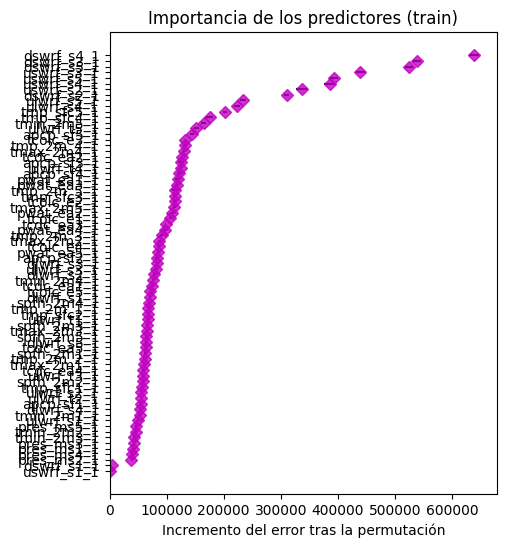

In [ ]:
# Ahora representamos graficamente la importancia de los errores a través del incremento del error tras las permutaciones
fig, ax = plt.subplots(figsize=(5, 6))
df_importancia = df_importancia.sort_values('importances_mean', ascending=True)
ax.barh(
    df_importancia['feature'],
    df_importancia['importances_mean'],
    xerr=df_importancia['importances_std'],
    align='center',
    alpha=0
)
ax.plot(
    df_importancia['importances_mean'],
    df_importancia['feature'],
    marker="D",
    linestyle="",
    alpha=0.8,
    color="m"
)
ax.set_title('Importancia de los predictores (train)')
ax.set_xlabel('Incremento del error tras la permutación');

Es importante notar que, en esta técnica, el valor absoluto de la diferencia en la puntuación (como el 'neg_root_mean_squared_error' que usamos) es lo que importa, no el incremento en sí. Las variables con menor incremento se consideran las mejores

Por otro lado, en la gráfica anterior, al haber muchas variables, no se puede ver muy bien cuáles son las mejores, por lo que mejor imprimimos su nombre.



In [ ]:
# Los mejores predictores (o variables)
top_predictors = df_importancia.sort_values('importances_mean', ascending=False)['feature'][:10]
print(top_predictors)

13    dswrf_s4_1
12    dswrf_s3_1
14    dswrf_s5_1
72    uswrf_s3_1
74    uswrf_s5_1
73    uswrf_s4_1
71    uswrf_s2_1
11    dswrf_s2_1
64    ulwrf_s5_1
63    ulwrf_s4_1
Name: feature, dtype: object


### Comentarios RF

Son modelos con errores notablemente mejores que el resto, pero tienen mayor tiempo de ejecución. Tanto para RMSE y MAE se mejoran al hacer el ajuste de hiperparámetros. Además, al añadir los ExtraTreeRegressor() el tiempo de entrenamiento disminuye de forma considerable y el error se mantiene parecido a RandomForestRegressor(). También hemos querido añadir el método de BayesSearchCV() con el objetivo de encontrar un mejor modelo, tanto en error como en tiempo de convergencia, y sobre el que hacer las medidas de importancia.

En cuanto a dichas medidas, las variables de onda corta, tanto ascendentes como descendentes (las que empiezan por d y u), están presentes en ambas técnicas que hemos estudiado, por lo que podemos decir que son las que más influyen en la variable objetivo.

Sin embargo, en general, Random Forest es más lento que otros algoritmos en el entrenamiento porque está construyendo múltiples árboles de decisión y combinando sus resultados. Se trata de un proceso computacionalmente intenso que, además, es posible que exija más datos de entrenamiento que otros modelos para ajustar de manera correcta los múltiples árboles.

## XGBoost

Modelo de aprendizaje supervisado basado en árboles de decisión y que surge como una extensión de Gradient Boosting, de donde viene el nombre de eXtreme Gradient Boosting. Se utiliza para porblemas de regresión y clasificación.

XGBoost funciona como un modelo de ensamblaje de árboles que luego se combinan para crear un modelo más robusto. Cada árbol se construye de forma secuencial, corrigiendo los errores del árbol anterior y, para ello, se utiliza un proceso llamado "boosting", que implica asignar pesos a las instancias mal clasificadas y ajustar los pesos de las instancias bien clasificadas.

Algunos de los **hiperparámetros** de XGBoost son: **n_estimators**, que especifica el número de árboles que se deben construir; **max_depth**, que limita la profundidad máxima de cada árbol; **learning_rate**, que controla la tasa de aprendizaje en cada iteración del algoritmo; y **subsample**, que controla la fracción de instancias que se deben utilizar para construir cada árbol.

### Omisión

Estudiamos tres implementaciones distintas de este algoritmo: HistGradientBoostingRegressor(), XGBRegressor() y LGBMRegressor().

RMSE: 3147712.285834196
Tiempo de entrenamiento: 2.03 segundos


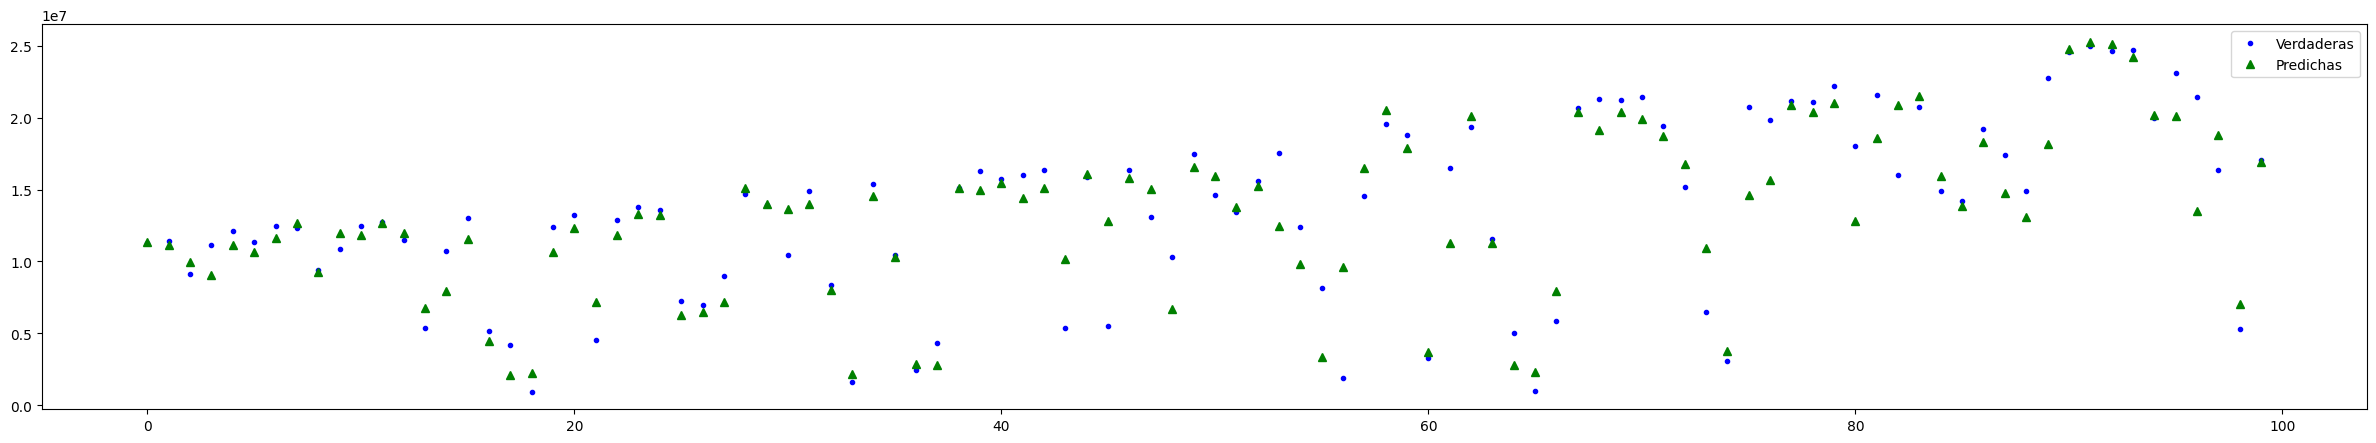

In [ ]:
#Modelo HistGradientBoostingRegressor()
#Métrica: RMSE

#Creación del modelo
regr = HistGradientBoostingRegressor()
np.random.seed(23)

#Entrenamiento y medición de tiempo
start_time = time.time()
regr.fit(X_train, y_train)
end_time = time.time()

training_time = end_time - start_time

#Predicciones en el conjunto de test
y_pred = regr.predict(X_test)

#Precisión
rmse_xgb = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print(f"RMSE: {rmse_xgb}")
print("Tiempo de entrenamiento: {:.2f} segundos".format(training_time))
pintaResultados(regr,100)

MAE: 2072623.7414166823
Tiempo de entrenamiento: 0.77 segundos


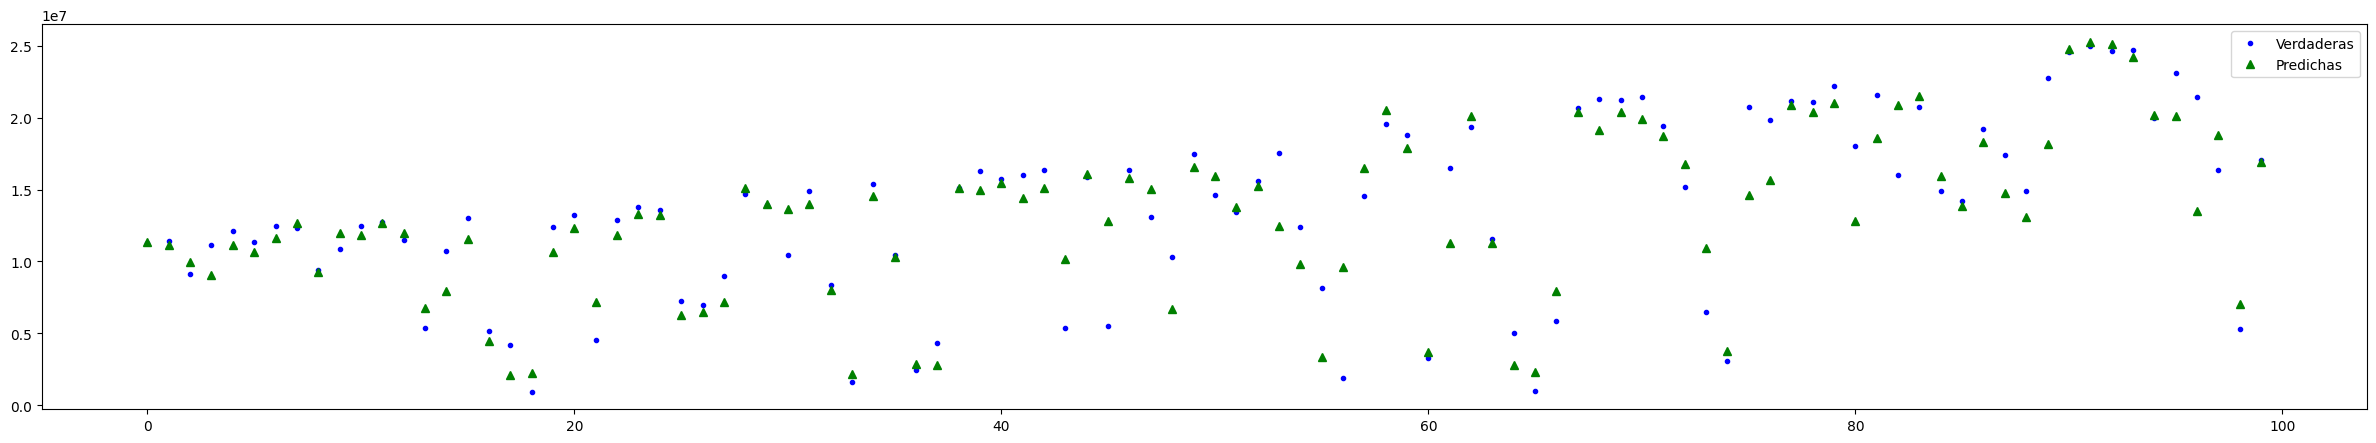

In [ ]:
#Modelo HistGradientBoostingRegressor()
#Métrica: MAE

#Creación del modelo
regr = HistGradientBoostingRegressor()
np.random.seed(23)

#Entrenamiento y medición de tiempo
start_time = time.time()
regr.fit(X_train, y_train)
end_time = time.time()

training_time = end_time - start_time

#Predicciones en el conjunto de test
y_pred = regr.predict(X_test)

#Precisión
mae_xgb = metrics.mean_absolute_error(y_test, y_pred)

print(f"MAE: {mae_xgb}")
print("Tiempo de entrenamiento: {:.2f} segundos".format(training_time))
pintaResultados(regr,100)

RMSE: 3325479.0781028867
Tiempo de entrenamiento: 3.19 segundos


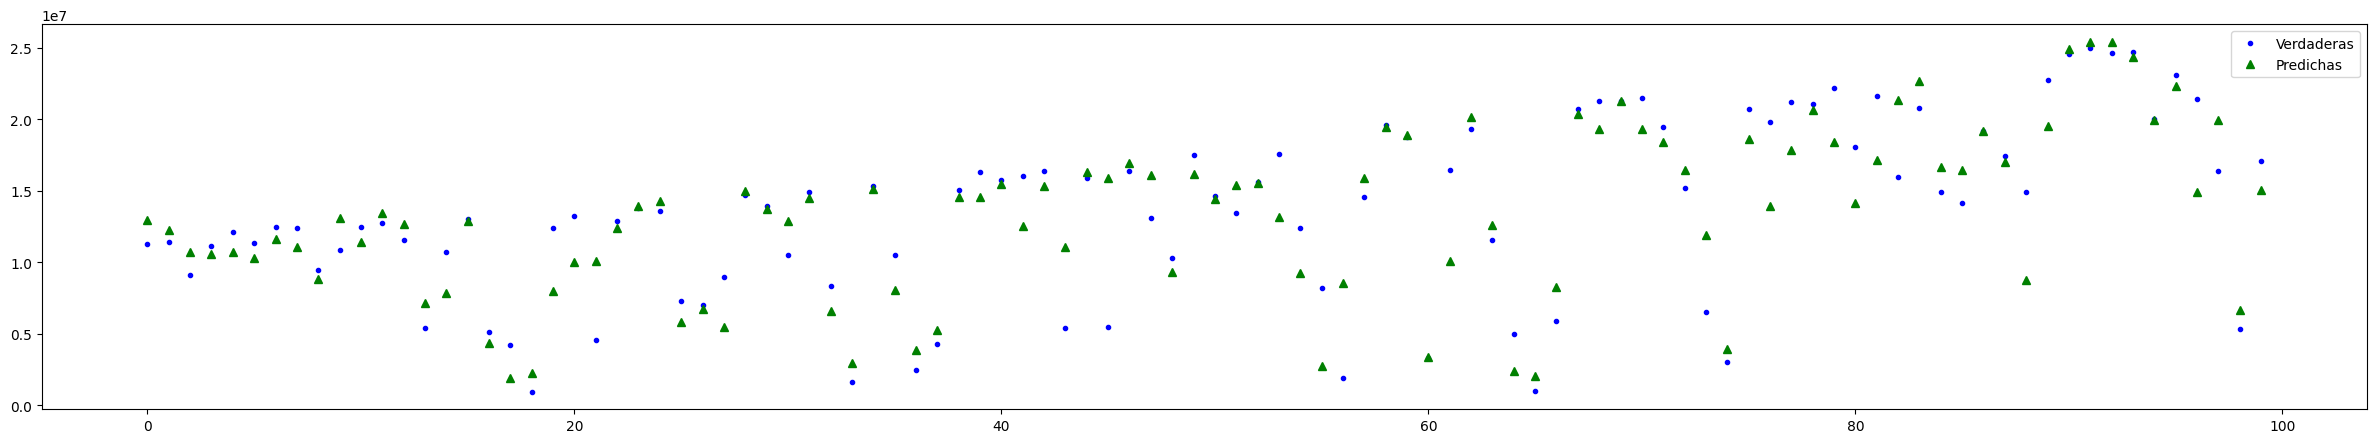

In [ ]:
#Modelo XGBRegressor()
#Métrica: RMSE

#Creación del modelo
regr = XGBRegressor()
np.random.seed(23)

#Entrenamiento y medición de tiempo
start_time = time.time()
regr.fit(X_train, y_train)
end_time = time.time()

training_time = end_time - start_time

#Predicciones en el conjunto de test
y_pred = regr.predict(X_test)

#Precisión
rmse_xgb = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print(f"RMSE: {rmse_xgb}")
print("Tiempo de entrenamiento: {:.2f} segundos".format(training_time))
pintaResultados(regr,100)

MAE: 2249449.4022260276
Tiempo de entrenamiento: 3.21 segundos


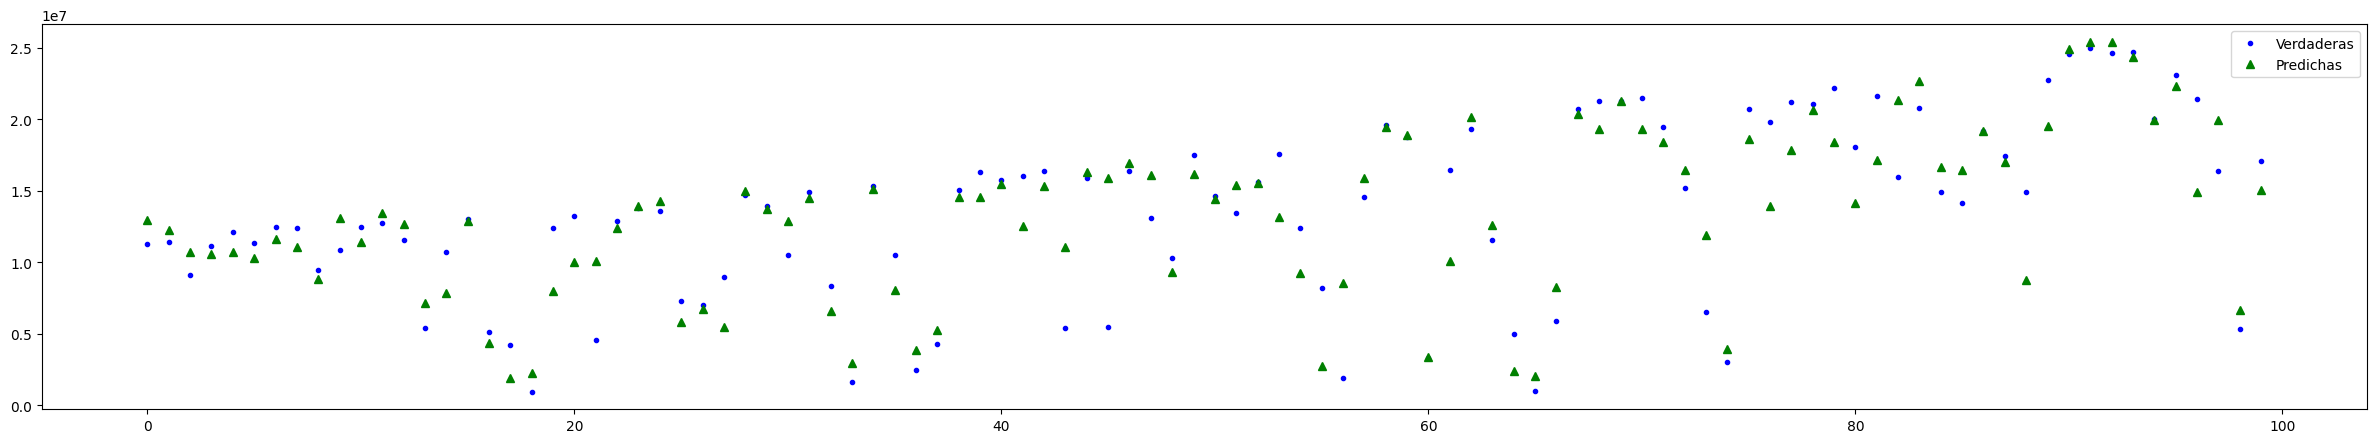

In [ ]:
#Modelo XGBRegressor()
#Métrica: MAE

#Creación del modelo
regr = XGBRegressor()
np.random.seed(23)

#Entrenamiento y medición de tiempo
start_time = time.time()
regr.fit(X_train, y_train)
end_time = time.time()

training_time = end_time - start_time

#Predicciones en el conjunto de test
y_pred = regr.predict(X_test)

#Precisión
mae_xgb = metrics.mean_absolute_error(y_test, y_pred)

print(f"MAE: {mae_xgb}")
print("Tiempo de entrenamiento: {:.2f} segundos".format(training_time))
pintaResultados(regr,100)

RMSE: 3104950.7685826086
Tiempo de entrenamiento: 0.58 segundos


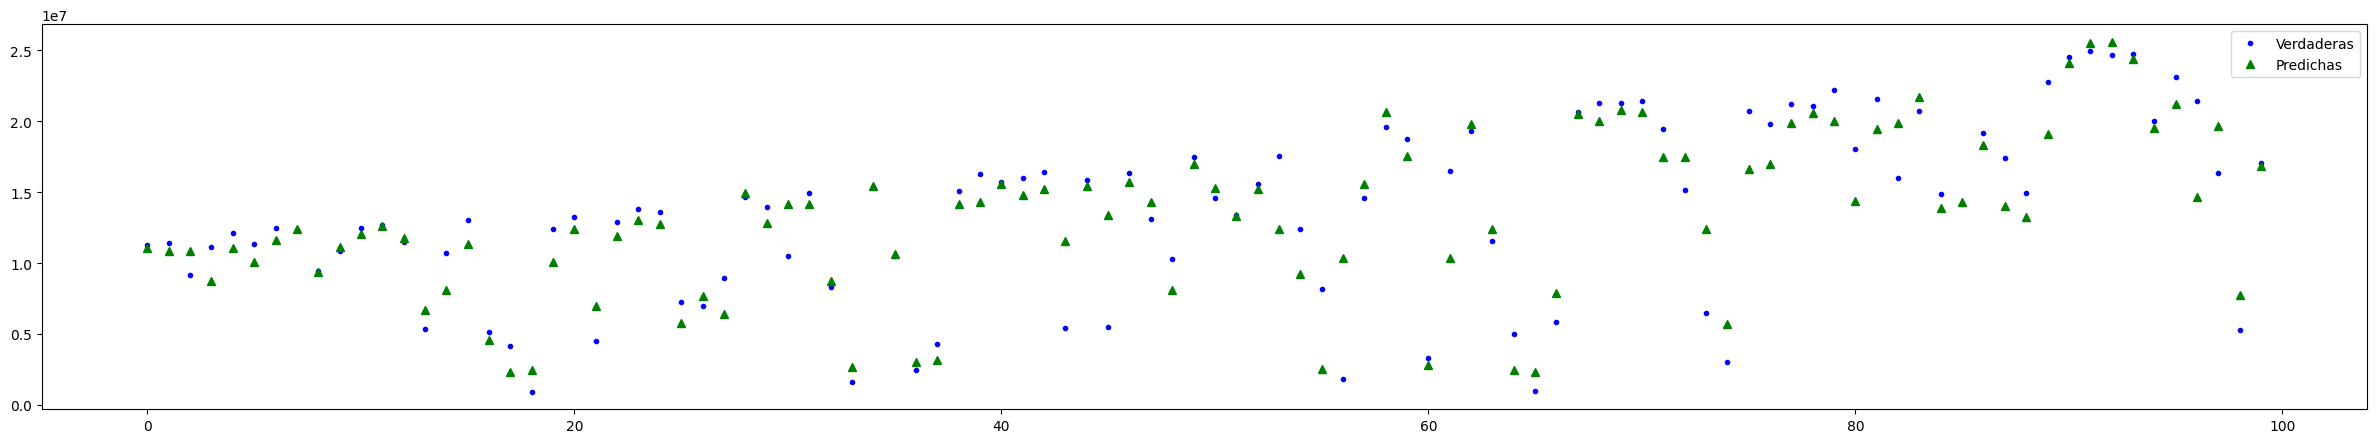

In [ ]:
#Modelo LGBMRegressor()
#Métrica: RMSE

#Creación del modelo
regr = LGBMRegressor()
np.random.seed(23)

#Entrenamiento y medición de tiempo
start_time = time.time()
regr.fit(X_train, y_train)
end_time = time.time()

training_time = end_time - start_time

#Predicciones en el conjunto de test
y_pred = regr.predict(X_test)

#Precisión
rmse_xgb = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print(f"RMSE: {rmse_xgb}")
print("Tiempo de entrenamiento: {:.2f} segundos".format(training_time))
pintaResultados(regr,100)

MAE: 2022565.3932327768
Tiempo de entrenamiento: 2.71 segundos


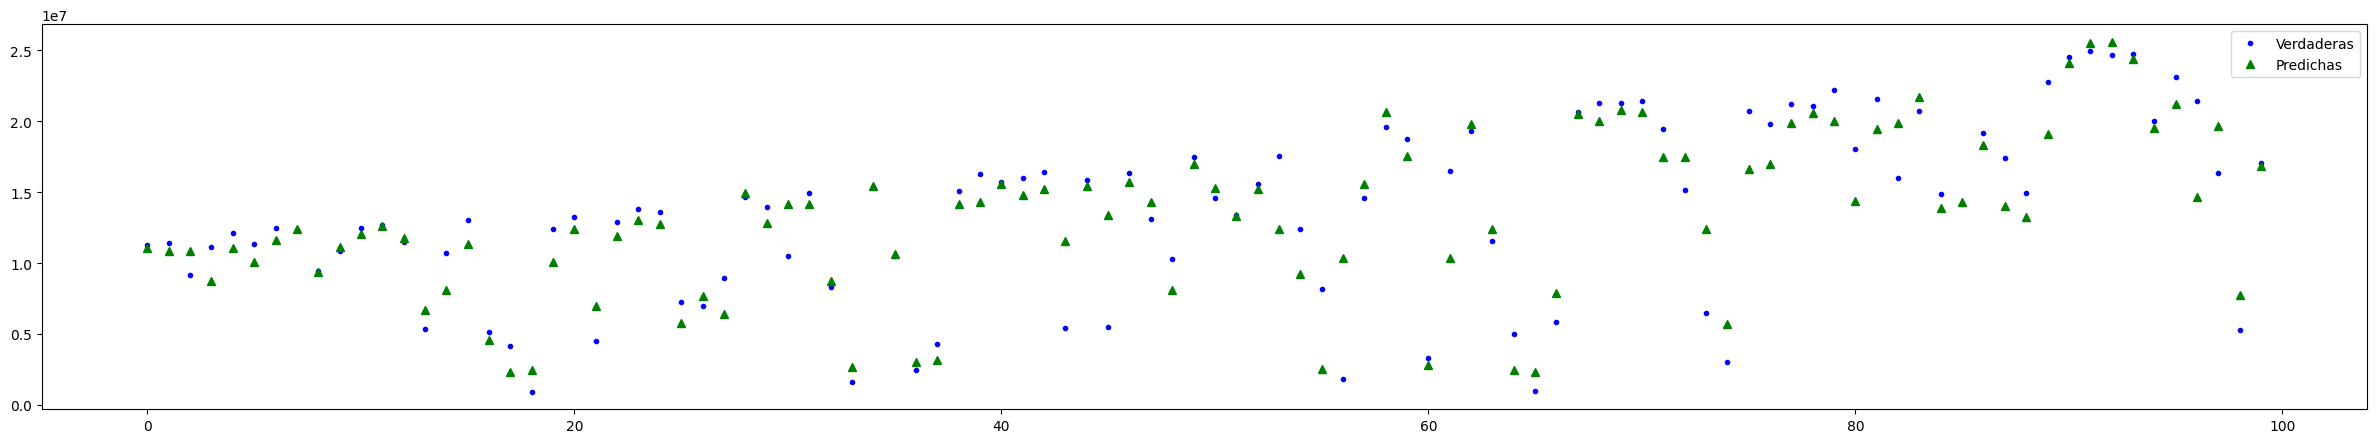

In [ ]:
#Modelo LGBMRegressor()
#Métrica: MAE

#Creación del modelo
regr = LGBMRegressor()
np.random.seed(23)

#Entrenamiento y medición de tiempo
start_time = time.time()
regr.fit(X_train, y_train)
end_time = time.time()

training_time = end_time - start_time

#Predicciones en el conjunto de test
y_pred = regr.predict(X_test)

#Precisión
mae_xgb = metrics.mean_absolute_error(y_test, y_pred)

print(f"MAE: {mae_xgb}")
print("Tiempo de entrenamiento: {:.2f} segundos".format(training_time))
pintaResultados(regr,100)

### Modificación de hiperparámetros

In [ ]:
# Modelo HistGradientBoostingRegressor()
# Métrica RMSE

# Semilla
np.random.seed(23)

# Valores de los hiperparámetros a explorar
param_dist = {'max_depth': [3, 4, 5, 6, 7, 9, 20],
              'learning_rate': uniform(0, 1),
              'min_samples_leaf': [1, 2, 4],
              'max_iter': [100, 200, 300, 400],
              'l2_regularization': [0, 0.1, 0.2],
              'max_bins': [32, 64, 128],
              'warm_start': [True, False]}
'''
Explicación detallada:
-- max_depth: profundidad máxima permitida para cada árbol de decisión.
-- learning_rate: tasa de aprendizaje que controla el tamaño del paso en cada iteración
mientras se actualizan los pesos.
-- min_samples_leaf: número mínimo de muestras requerido para ser una hoja en el árbol.
-- max_iter: número máximo de iteraciones para el entrenamiento del modelo
-- l2_regularization: fuerza de la regularización L2 aplicada a los pesos del modelo.
-- max_bins: número máximo de bines a utilizar para discretizar las características continuas en el modelo.
-- warm_start: permite al modelo para utilizar los coeficientes de la regresión anterior como punto de partida
para el ajuste de la regresión en una nueva iteración.
'''
# Modelo base
regr = HistGradientBoostingRegressor()

# Búsqueda aleatoria de hiperparámetros
rs = RandomizedSearchCV(regr, param_distributions=param_dist, n_iter=30,
                                  cv=ps, scoring='neg_mean_squared_error', random_state=23, n_jobs=-1)

start_time = time.time()
rs.fit(X_train, y_train)
end_time = time.time()

training_time = end_time - start_time

# Predicciones y RMSE  del conjunto de test
y_pred_rs = rs.predict(X_test)
rmse_rs = np.sqrt(metrics.mean_squared_error(y_test, y_pred_rs))

y_pred_best = rs.best_estimator_.predict(X_test)
rmse_rs_best = np.sqrt(metrics.mean_squared_error(y_test, y_pred_best))

print('Tiempo de entrenamiento con RandomizedSearchCV:', training_time, 'segundos')
print('Mejores hiperparámetros:', rs.best_params_)
print('Mejor score:', -rs.best_score_)
print('------------------------------------------------------------------------')
print('Predicciones y errores del conjunto de validación')
print(f"RMSE de HistGradientBoostingRegressor con hiperparámetros modificados: {rmse_rs}")
print(f"RMSE de HistGradientBoostingRegressor con hiperparámetros modificados (mejor modelo): {rmse_rs_best}")

Tiempo de entrenamiento con RandomizedSearchCV: 25.66208291053772 segundos
Mejores hiperparámetros: {'l2_regularization': 0.1, 'learning_rate': 0.045179437074293505, 'max_bins': 128, 'max_depth': 5, 'max_iter': 200, 'min_samples_leaf': 4, 'warm_start': True}
Mejor score: 14539477100366.361
------------------------------------------------------------------------
Predicciones y errores del conjunto de validación
RMSE de HistGradientBoostingRegressor con hiperparámetros modificados: 3150847.3270109636
RMSE de HistGradientBoostingRegressor con hiperparámetros modificados (mejor modelo): 3150847.3270109636


In [ ]:
# Modelo HistGradientBoostingRegressor()
# Métrica MAE

# Semilla
np.random.seed(23)

# Valores de los hiperparámetros a explorar
param_dist = {'max_depth': [3, 4, 5, 6, 7, 9, 20],
              'learning_rate': uniform(0, 1),
              'min_samples_leaf': [1, 2, 4],
              'max_iter': [100, 200, 300, 400],
              'l2_regularization': [0, 0.1, 0.2],
              'max_bins': [32, 64, 128],
              'warm_start': [True, False]}

# Modelo base
regr = HistGradientBoostingRegressor()

# Búsqueda aleatoria de hiperparámetros
rs = RandomizedSearchCV(regr, param_distributions=param_dist, n_iter=30,
                                  cv=ps, scoring='neg_mean_absolute_error', random_state=23)

start_time = time.time()
rs.fit(X_train, y_train)
end_time = time.time()

training_time = end_time - start_time

# Predicciones y MAE  del conjunto de test
y_pred_rs = rs.predict(X_test)
mae_rs = metrics.mean_absolute_error(y_test, y_pred_rs)

y_pred_best = rs.best_estimator_.predict(X_test)
mae_rs_best = metrics.mean_absolute_error(y_test, y_pred_best)

print('Tiempo de entrenamiento con RandomizedSearchCV:', training_time, 'segundos')
print('Mejores hiperparámetros:', rs.best_params_)
print('Mejor score:', -rs.best_score_)
print('------------------------------------------------------------------------')
print('Predicciones y errores del conjunto de validación')
print(f"MAE de HistGradientBoostingRegressor con hiperparámetros modificados: {mae_rs}")
print(f"MAE de HistGradientBoostingRegressor con hiperparámetros modificados (mejor modelo): {mae_rs_best}")

Tiempo de entrenamiento con RandomizedSearchCV: 50.0864098072052 segundos
Mejores hiperparámetros: {'l2_regularization': 0.1, 'learning_rate': 0.045179437074293505, 'max_bins': 128, 'max_depth': 5, 'max_iter': 200, 'min_samples_leaf': 4, 'warm_start': True}
Mejor score: 2422151.9410684747
------------------------------------------------------------------------
Predicciones y errores del conjunto de validación
MAE de HistGradientBoostingRegressor con hiperparámetros modificados: 2052676.0446868616
MAE de HistGradientBoostingRegressor con hiperparámetros modificados (mejor modelo): 2052676.0446868616


In [ ]:
# Modelo XGBRegressor()
# Métrica RMSE

# Semilla
np.random.seed(23)

# Valores de los hiperparámetros a explorar
param_dist = {'max_depth': [1,2,3, 4, 5, 6, 7, 8, 9, 10],
              'learning_rate': uniform(0, 1),
              'n_estimators': randint(100, 1000),
              'subsample': uniform(0.1, 0.9),
              'colsample_bytree': uniform(0.1, 0.9)}
'''
Explicación detallada:
-- max_depth: profundidad máxima permitida para cada árbol de decisión.
-- learning_rate: tasa de aprendizaje que controla el tamaño del paso en cada iteración
mientras se actualizan los pesos.
-- n_estimators: número de árboles de decisión que se van a construir.
-- subsample: fracción de los datos que se utiliza para entrenar cada árbol de decisión.
-- colsample_bytree: fracción de las características (columnas) que se utilizan para entrenar cada árbol de decisión.
'''
# Modelo base
regr = XGBRegressor()

# Búsqueda aleatoria de hiperparámetros
rs = RandomizedSearchCV(regr, param_distributions=param_dist, n_iter=30,
                                  cv=ps, scoring='neg_mean_squared_error', random_state=23)

start_time = time.time()
rs.fit(X_train, y_train)
end_time = time.time()

training_time = end_time - start_time

# Predicciones y RMSE  del conjunto de test
y_pred_rs = rs.predict(X_test)
rmse_rs = np.sqrt(metrics.mean_squared_error(y_test, y_pred_rs))

y_pred_best = rs.best_estimator_.predict(X_test)
rmse_rs_best = np.sqrt(metrics.mean_squared_error(y_test, y_pred_best))

print('Tiempo de entrenamiento con RandomizedSearchCV:', training_time, 'segundos')
print('Mejores hiperparámetros:', rs.best_params_)
print('Mejor score:', -rs.best_score_)
print('------------------------------------------------------------------------')
print('Predicciones y errores del conjunto de validación')
print(f"RMSE de XGBoost con hiperparámetros modificados: {rmse_rs}")
print(f"RMSE de XGBoost con hiperparámetros modificados (mejor modelo): {rmse_rs_best}")

Tiempo de entrenamiento con RandomizedSearchCV: 272.36451292037964 segundos
Mejores hiperparámetros: {'colsample_bytree': 0.4920392525647328, 'learning_rate': 0.006428299533343673, 'max_depth': 3, 'n_estimators': 799, 'subsample': 0.47686816000532195}
Mejor score: 14502310541736.164
------------------------------------------------------------------------
Predicciones y errores del conjunto de validación
RMSE de XGBoost con hiperparámetros modificados: 3031975.056677923
RMSE de XGBoost con hiperparámetros modificados (mejor modelo): 3031975.056677923


In [ ]:
# Modelo XGBRegressor()
# Métrica MAE

# Semilla
np.random.seed(23)

# valores de los hiperparámetros a explorar
param_dist = {'max_depth': [1,2,3, 4, 5, 6, 7, 8, 9, 10],
              'learning_rate': uniform(0, 1),
              'n_estimators': randint(100, 1000),
              'subsample': uniform(0.1, 0.9),
              'colsample_bytree': uniform(0.1, 0.9)}

# modelo base
regr = XGBRegressor()

# Búsqueda aleatoria de hiperparámetros
rs = RandomizedSearchCV(regr, param_distributions=param_dist, n_iter=30,
                                  cv=ps, scoring='neg_mean_absolute_error', random_state=23)

start_time = time.time()
rs.fit(X_train, y_train)
end_time = time.time()

training_time = end_time - start_time

# Predicciones y MAE  del conjunto de test
y_pred_rs = rs.predict(X_test)
mae_rs = metrics.mean_absolute_error(y_test, y_pred_rs)

y_pred_best = rs.best_estimator_.predict(X_test)
mae_rs_best = metrics.mean_absolute_error(y_test, y_pred_best)

print('Tiempo de entrenamiento con RandomizedSearchCV:', training_time, 'segundos')
print('Mejores hiperparámetros:', rs.best_params_)
print('Mejor score:', -rs.best_score_)
print('------------------------------------------------------------------------')
print('Predicciones y errores del conjunto de validación')
print(f"MAE de XGBoost con hiperparámetros modificados: {mae_rs}")
print(f"MAE de XGBoost con hiperparámetros modificados (mejor modelo): {mae_rs_best}")

Tiempo de entrenamiento con RandomizedSearchCV: 284.4303951263428 segundos
Mejores hiperparámetros: {'colsample_bytree': 0.9261512251335369, 'learning_rate': 0.12906352760617068, 'max_depth': 1, 'n_estimators': 406, 'subsample': 0.8409507628857202}
Mejor score: 2434314.6955479453
------------------------------------------------------------------------
Predicciones y errores del conjunto de validación
MAE de XGBoost con hiperparámetros modificados: 2115625.7806934933
MAE de XGBoost con hiperparámetros modificados (mejor modelo): 2115625.7806934933


In [ ]:
# Modelo LGBMRegressor()
# Métrica RMSE

# Semilla
np.random.seed(23)

# Valores de los hiperparámetros a explorar
param_dist = {'n_estimators'     : randint(100, 5000),
              'max_depth'        : [-1, 1, 3, 5, 10, 20],
              'subsample'        : [0.5, 1],
              'learning_rate'    : [0.001, 0.01, 0.1],
              'boosting_type'    : ['gbdt', 'dart', 'goss']
             }
'''
Explicación detallada:
-- boosting_type:  tipo de boosting utilizado. Puede ser 'gbdt' (Gradient Boosting Decision Tree),
'dart' (Dropout Regularization), 'goss' (Gradient-based One-Side Sampling)

'''
# Modelo base
regr = LGBMRegressor()

# Búsqueda aleatoria de hiperparámetros
rs = RandomizedSearchCV(regr, param_distributions=param_dist, n_iter=10,
                                  cv=ps, scoring='neg_mean_squared_error', random_state=23)

start_time = time.time()
rs.fit(X_train, y_train)
end_time = time.time()

training_time = end_time - start_time

# Predicciones y RMSE  del conjunto de test
y_pred_rs = rs.predict(X_test)
rmse_rs = metrics.mean_squared_error(y_test, y_pred_rs)

y_pred_best = rs.best_estimator_.predict(X_test)
rmse_rs_best = metrics.mean_squared_error(y_test, y_pred_best)

print('Tiempo de entrenamiento con RandomizedSearchCV:', training_time, 'segundos')
print('Mejores hiperparámetros:', rs.best_params_)
print('Mejor score:', -rs.best_score_)
print('------------------------------------------------------------------------')
print('Predicciones y errores del conjunto de validación')
print(f"RMSE de LGBMRegressor con hiperparámetros modificados: {rmse_rs}")
print(f"RMSE de LGBMRegressor con hiperparámetros modificados (mejor modelo): {rmse_rs_best}")

Tiempo de entrenamiento con RandomizedSearchCV: 167.10126566886902 segundos
Mejores hiperparámetros: {'boosting_type': 'dart', 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 3601, 'subsample': 0.5}
Mejor score: 14344997370868.457
------------------------------------------------------------------------
Predicciones y errores del conjunto de validación
RMSE de LGBMRegressor con hiperparámetros modificados: 9497349722884.816
RMSE de LGBMRegressor con hiperparámetros modificados (mejor modelo): 9497349722884.816


In [ ]:
# Modelo LGBMRegressor()
# Métrica MAE

# Semilla
np.random.seed(23)

# valores de los hiperparámetros a explorar
param_dist = {'n_estimators'     : randint(100, 5000),
              'max_depth'        : [-1, 1, 3, 5, 10, 20],
              'subsample'        : [0.5, 1],
              'learning_rate'    : [0.001, 0.01, 0.1],
              'boosting_type'    : ['gbdt', 'dart', 'goss']
             }
# modelo base
regr = LGBMRegressor()

# Búsqueda aleatoria de hiperparámetros
rs = RandomizedSearchCV(regr, param_distributions=param_dist, n_iter=10,
                                  cv=ps, scoring='neg_mean_absolute_error', random_state=23)

start_time = time.time()
rs.fit(X_train, y_train)
end_time = time.time()

training_time = end_time - start_time

# Predicciones y MAE  del conjunto de test
y_pred_rs = rs.predict(X_test)
mae_rs = metrics.mean_absolute_error(y_test, y_pred_rs)

y_pred_best = rs.best_estimator_.predict(X_test)
mae_rs_best = metrics.mean_absolute_error(y_test, y_pred_best)

print('Tiempo de entrenamiento con RandomizedSearchCV:', training_time, 'segundos')
print('Mejores hiperparámetros:', rs.best_params_)
print('Mejor score:', -rs.best_score_)
print('------------------------------------------------------------------------')
print('Predicciones y errores del conjunto de validación')
print(f"MAE de LGBMRegressor con hiperparámetros modificados: {mae_rs}")
print(f"MAE de LGBMRegressor con hiperparámetros modificados (mejor modelo): {mae_rs_best}")

Tiempo de entrenamiento con RandomizedSearchCV: 144.18796491622925 segundos
Mejores hiperparámetros: {'boosting_type': 'gbdt', 'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 2008, 'subsample': 1}
Mejor score: 2447520.45997788
------------------------------------------------------------------------
Predicciones y errores del conjunto de validación
MAE de LGBMRegressor con hiperparámetros modificados: 2057125.3138758666
MAE de LGBMRegressor con hiperparámetros modificados (mejor modelo): 2057125.3138758666


### Modificación de hiperparámetros Bayesiana

Al igual que en RandomForest, vamos a utilizar la búsqueda Bayesiana, pero con el modelo XGBRegressor().

In [ ]:
# Modelo XGBRegressor() con BayesSearchCV()
# Métrica RMSE

# Semilla
np.random.seed(23)

# Cambiamos la forma de los hiperparámetros para que funcione con BayesSearchCV()
param_dist = {'max_depth': Integer(10, 60),
              'learning_rate': Real(0.01, 1.0, 'log-uniform'),
              'n_estimators': Integer(75, 200),
              'subsample': Real(0.01, 1.0, 'uniform'),
              'colsample_bytree': Real(0.01, 1.0, 'uniform')}

# Modelo base
regr = XGBRegressor()

# Búsqueda aleatoria de hiperparámetros
bs_xgb = BayesSearchCV(regr, param_dist, n_iter=30,
                                  cv=ps, scoring='neg_mean_squared_error', random_state=23, n_jobs=-1)

start_time = time.time()
bs_xgb.fit(X_train, y_train)
end_time = time.time()

training_time = end_time - start_time

# Predicciones y RMSE  del conjunto de test
y_pred_rs = bs_xgb.predict(X_test)
rmse_rs = np.sqrt(metrics.mean_squared_error(y_test, y_pred_rs))

y_pred_best = bs_xgb.best_estimator_.predict(X_test)
rmse_rs_best = np.sqrt(metrics.mean_squared_error(y_test, y_pred_best))

print('Tiempo de entrenamiento con BayesSearchCV:', training_time, 'segundos')
print('Mejores hiperparámetros:', bs_xgb.best_params_)
print('Mejor score:', -bs_xgb.best_score_)
print('------------------------------------------------------------------------')
print('Predicciones y errores del conjunto de validación')
print(f"RMSE de XGBoost con hiperparámetros bayesianos modificados: {rmse_rs}")
print(f"RMSE de XGBoost con hiperparámetros bayesianos modificados (mejor modelo): {rmse_rs_best}")

Tiempo de entrenamiento con BayesSearchCV: 125.52904343605042 segundos
Mejores hiperparámetros: OrderedDict([('colsample_bytree', 0.2570096448175805), ('learning_rate', 0.11010782545038893), ('max_depth', 14), ('n_estimators', 109), ('subsample', 0.4063712304401022)])
Mejor score: 15042757918784.414
------------------------------------------------------------------------
Predicciones y errores del conjunto de validación
RMSE de XGBoost con hiperparámetros bayesianos modificados: 3068644.324374918
RMSE de XGBoost con hiperparámetros bayesianos modificados (mejor modelo): 3068644.324374918


In [ ]:
# Modelo XGBRegressor() con BayesSearchCV()
# Métrica MAE

# Semilla
np.random.seed(23)

# Cambiamos la forma de los hiperparámetros para que funcione con BayesSearchCV()
param_dist = {'max_depth': Integer(10, 60),
              'learning_rate': Real(0.01, 1.0, 'log-uniform'),
              'n_estimators': Integer(75, 200),
              'subsample': Real(0.01, 1.0, 'uniform'),
              'colsample_bytree': Real(0.01, 1.0, 'uniform')}

# Modelo base
regr = XGBRegressor()

# Búsqueda aleatoria de hiperparámetros
bs = BayesSearchCV(regr, param_dist, n_iter=30,
                                  cv=ps, scoring='neg_mean_absolute_error', random_state=23, n_jobs=-1)

start_time = time.time()
bs.fit(X_train, y_train)
end_time = time.time()

training_time = end_time - start_time

# Predicciones y RMSE  del conjunto de test
y_pred_rs = bs.predict(X_test)
mae_rs = np.sqrt(metrics.mean_squared_error(y_test, y_pred_rs))

y_pred_best = bs.best_estimator_.predict(X_test)
mae_rs_best = metrics.mean_absolute_error(y_test, y_pred_best)

print('Tiempo de entrenamiento con BayesSearchCV:', training_time, 'segundos')
print('Mejores hiperparámetros:', bs.best_params_)
print('Mejor score:', -bs.best_score_)
print('------------------------------------------------------------------------')
print('Predicciones y errores del conjunto de validación')
print(f"RMSE de XGBoost con hiperparámetros bayesianos modificados: {mae_rs}")
print(f"RMSE de XGBoost con hiperparámetros bayesianos modificados (mejor modelo): {mae_rs_best}")

Tiempo de entrenamiento con BayesSearchCV: 200.59740686416626 segundos
Mejores hiperparámetros: OrderedDict([('colsample_bytree', 0.2570096448175805), ('learning_rate', 0.11010782545038893), ('max_depth', 14), ('n_estimators', 109), ('subsample', 0.4063712304401022)])
Mejor score: 2546652.2691780822
------------------------------------------------------------------------
Predicciones y errores del conjunto de validación
RMSE de XGBoost con hiperparámetros bayesianos modificados: 3068644.324374918
RMSE de XGBoost con hiperparámetros bayesianos modificados (mejor modelo): 2100217.5482020546


### Importancia por pureza

Procedemos exactamente igual que en el algoritmo anterior, salvo que usamos XGBoostRegressor con la búsqueda Bayesiana ahora.

In [ ]:
# Mejor modelo: XGBRegressor() y BayesSearchCV()
modelo_importancia_xgb = bs_xgb.best_estimator_
_ = modelo_importancia_xgb.fit(X_train, y_train)

In [ ]:
# Los predictores son los nombres de las variables del conjunto de datos X
predictor_names = disp_df.drop('salida', axis=1).columns
print(len(predictor_names))
print(len(modelo_importancia_xgb.feature_importances_))

75
75


In [ ]:
# Creamos el DataFrame de Pandas con las columnas Predictor e Importancia
importancia_predictores = pd.DataFrame(
                            {'Predictor': predictor_names,
                             'Importancia': modelo_importancia_xgb.feature_importances_}
                            )
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")
importancia_predictores.sort_values('Importancia', ascending=False)

Importancia de los predictores en el modelo
-------------------------------------------


,Predictor,Importancia
13,dswrf_s4_1,0.141204
42,tmax_2m3_1,0.098201
72,uswrf_s3_1,0.066013
11,dswrf_s2_1,0.053934
12,dswrf_s3_1,0.045255
...,...,...
9,dlwrf_s5_1,0.002873
1,apcp_sf2_1,0.002686
6,dlwrf_s2_1,0.002559
5,dlwrf_s1_1,0.002021


In [ ]:
# Top 10
importancia_predictores = importancia_predictores.sort_values('Importancia', ascending=False)

top_10_predictores = importancia_predictores.head(10)
print(top_10_predictores)

     Predictor  Importancia
13  dswrf_s4_1     0.141204
42  tmax_2m3_1     0.098201
72  uswrf_s3_1     0.066013
11  dswrf_s2_1     0.053934
12  dswrf_s3_1     0.045255
71  uswrf_s2_1     0.042255
73  uswrf_s4_1     0.037580
74  uswrf_s5_1     0.036877
62  ulwrf_s3_1     0.030535
36  tcolc_e2_1     0.028511


### Importancia por permutación

Procedemos de la misma manera que en Random Forest, pero con el mejor algoritmo de XGBoost.

In [ ]:
importancia = permutation_importance(
                estimator    = modelo_importancia_xgb,
                X            = X_train,
                y            = y_train,
                n_repeats    = 5,
                scoring      = 'neg_root_mean_squared_error',
                n_jobs       = multiprocessing.cpu_count() - 1,
                random_state = 42
             )

# Se almacenan los resultados (media y desviación) en un dataframe
# Se mide la importancia promedio de cada predictor calculada a través de múltiples permutaciones
df_importancia = pd.DataFrame(
                    {k: importancia[k] for k in ['importances_mean', 'importances_std']}
                 )
# df_importancia['feature'] = X_train.columns
df_importancia['feature'] = predictor_names
df_importancia.sort_values('importances_mean', ascending=False)

,importances_mean,importances_std,feature
13,1.630124e+06,14440.979927,dswrf_s4_1
12,1.601544e+06,10688.757479,dswrf_s3_1
11,1.417719e+06,27522.164608,dswrf_s2_1
42,1.109878e+06,17589.761604,tmax_2m3_1
72,1.107966e+06,21394.896792,uswrf_s3_1
...,...,...,...
52,1.612341e+05,3451.005531,tmp_2m_3_1
48,1.550093e+05,4404.132478,tmin_2m4_1
45,1.468338e+05,5400.739226,tmin_2m1_1
10,2.987048e+04,1062.103445,dswrf_s1_1


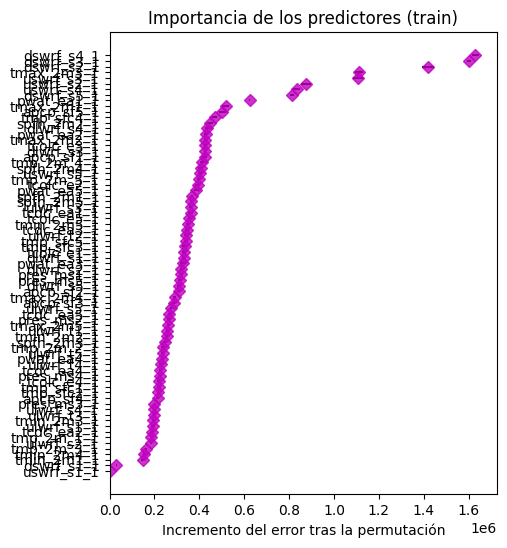

In [ ]:
# Gráfica del incremento del error tras las permutaciones
fig, ax = plt.subplots(figsize=(5, 6))
df_importancia = df_importancia.sort_values('importances_mean', ascending=True)
ax.barh(
    df_importancia['feature'],
    df_importancia['importances_mean'],
    xerr=df_importancia['importances_std'],
    align='center',
    alpha=0
)
ax.plot(
    df_importancia['importances_mean'],
    df_importancia['feature'],
    marker="D",
    linestyle="",
    alpha=0.8,
    color="m"
)
ax.set_title('Importancia de los predictores (train)')
ax.set_xlabel('Incremento del error tras la permutación');

In [ ]:
# Los mejores predictores (o variables)
top_predictors = df_importancia.sort_values('importances_mean', ascending=False)['feature'][:10]
print(top_predictors)

13    dswrf_s4_1
12    dswrf_s3_1
11    dswrf_s2_1
42    tmax_2m3_1
72    uswrf_s3_1
71    uswrf_s2_1
73    uswrf_s4_1
14    dswrf_s5_1
20    pwat_ea1_1
40    tmax_2m1_1
Name: feature, dtype: object


### Comentarios XGBoost

Tiene unas medidas de rendimiento dentro de lo esperado, y el ajuste de hiperparámetros mejora a los modelos por omisión. tienen altos tiempos de ejecución, incluso mayor que Random Forest, a pesar de estar utilizando una búsqueda aleatoria, un número de iteraciones no muy alto y parámetros como n_jobs=-1. El mejor algoritmo que hemos obtenido de esta técnica ha sido XGBRegressor(), que mejora el error de HistGradientRegressor() y LGBMRegressor().

Al igual que en Random Forest, para XGBoost también inlfuyen las variables de onda corta (d y u) como las que más a la variable objetivo, además de algunas temperaturas o la presión del aire.

## Conclusiones de los métodos avanzados

Son algoritmos que responden correctamente al error esperado, pero tienen tiempos más altos de ejecución comparados con los algoritmos básicos. De los tres algoritmos probados, SVM es el peor que nos ha salido, sobre todo el ajuste de los hiperparámetros. En Random Forest ha sobresalido la implementación aleatoria y bayesiana de RandomTreeRegressor(), y en XGBoost ha destacado XGBRegressor(). Estos dos últimos en realidad no tienen tanta diferencia en los errores, apenas hay una diferencia de decenas de miles de unidades, pero pensamos que nos es tan significativo porque estamos trabajando con errores del orden de varios millones. A pesar de ello, Random Forest y XGBoost son nuestros candidatos para seleccionar el mejor modelo. Por otro lado, tal y como se ha observado antes con el regresor Naive, los modelos avanzados también superan con creces a este tipo de regresores.

# Selección del mejor modelo

El modelo que vamos a seleccionar para la competición va a ser la implementación de RandomTreeRegressor() con búsqueda bayesiana. Se trata de un modelo con un error en torno a 2,95 y 1,98 millones para RMSE y MAE, respectivamente. Las implementaciones de las métricas tienen un tiempo de entrenamiento de medio minuto y los mejores hiperparámetros son:
- 'max_depth' = 30
- 'max_features' = 'log2'
- 'min_samples_leaf' = 2
- 'min_samples_split' = 5
- 'n_estimators'= 100

En el código hemos distinguido este algoritmo del resto por las siglas bs_rf (Bayesian Search - Random Forest).

El error que obtenemos con la búsqueda aleatoria es prácticamente igual al de la búsqueda bayesiana, pero hemos querido optar por la segunda porque creemos que va a ser más eficiente en las predicciones del segundo Notebook, ya que utiliza un modelo probabilístico para ajustar los hiperparámetros y, por tanto, puede mejorar el rendimiento del modelo.

También nos gustaría comentar que hemos considerado escoger la implementación bayesiana de XGBRegressor(), tal y como hemos comentado antes, pero no hemos conseguido un mejor error que con Random Forest (siempre oscilaba en torno a 3 millones, pero nunca baja al segundo millón).

Consideramos a XGBoost y Random Forest como los mejores algoritmos, tanto fuera como dentro del ámbito académico, dado que son muy efectivos en la predicción de resultados precisos. Utilizan ensamblaje de modelos para combinar muchos árboles de decisión individuales y reducir el riesgo de sobreajuste y, además, son capaces de manejar grandes conjuntos de datos con muchas variables gracias a su paralelización y optimización de memoria.

En consecuencia, en el Notebook2 se podrá ver nuestro entrenamiento final y predicciones con el algoritmo comentado.

In [ ]:
# Modelo final e hiperparámetros
modelo_final = bs_rf.best_estimator_ # RandomForestRegressor() con BayesianSearchCV()
hiperparametros = bs_rf.best_params_
print(hiperparametros)

OrderedDict([('max_depth', 30), ('max_features', 'log2'), ('min_samples_leaf', 2), ('min_samples_split', 5), ('n_estimators', 100)])


In [ ]:
# Entrenamiento
start_time = time.time()
modelo_final_entrenado = modelo_final.fit(X_train, y_train)
end_time = time.time()

training_time = end_time - start_time

print('Tiempo de entrenamiento: ', training_time)

Tiempo de entrenamiento:  2.668989419937134


In [ ]:
# Errores

y_pred = modelo_final_entrenado.predict(X_test)

# RMSE
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

# MAE
mae = metrics.mean_absolute_error(y_test, y_pred)


print('RMSE: ', rmse)
print('MAE: ', mae)

RMSE:  2911028.5480030724
MAE:  1945405.3225036452


In [ ]:
# Guardar el fichero en pkl
filename = 'modelo_final.pkl'
with open(filename, 'wb') as file:
  pickle.dump(modelo_final_entrenado, file)

# Reducción de la dimensionalidad

Una vez que ya hemos seleccionado nuestro mejor modelo, probamos a reducir la dimensionalidad y ver qué efectos tiene en nuestra mejor implementación. La reducción de la dimensionalidad es un proceso que consiste en disminuir el número de variables o características en un conjunto de datos. Este proceso se lleva a cabo para simplificar el análisis y la visualización de datos, así como para mejorar el rendimiento de los modelos.



Una técnica útil puede ser PCA (Análisis de Componentes), que se utiliza para extraer características importantes de un conjunto de datos multivariante. Se basa en encontrar un nuevo conjunto de variables, llamadas componentes principales, que sean una combinación lineal de las variables originales y que expliquen la mayor cantidad posible de varianza en los datos. Cada componente es una combinación lineal de las variables originales y su valor indica la importancia de esa dirección en la varianza total de los datos. Los componentes se ordenan en orden descendente de su importancia, por lo que el primer componente es el que explica la mayor parte de la varianza y así sucesivamente.

De esta forma, PCA reduce la complejidad de un conjunto de datos multivariante encontrando un número menor de variables que puedan explicar la mayor cantidad de varianza en los datos originales. A continuación mostramos nuestra implementación del PCA

In [ ]:
# PCA
# Instanciar PCA
np.random.seed(23)
pca = PCA(n_components=5)

# Ajustar y transformar datos de entrenamiento con PCA
X_train_pca = pca.fit_transform(X_train)

# Transformar datos de prueba con PCA
X_test_pca = pca.transform(X_test)

# El modelo final está arriba declarado
# modelo_final = bs_rf.best_estimator_

# Entrenar modelo con datos de entrenamiento transformados por PCA
modelo_final.fit(X_train_pca, y_train)

# Predecir con datos de prueba transformados por PCA
y_pred = modelo_final.predict(X_test_pca)

rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
mae = metrics.mean_absolute_error(y_test, y_pred)
print("RMSE: ", rmse)
print("MAE: ", mae)

RMSE:  3290424.183019187
MAE:  2259151.7169328486


Podemos representar las cargas de cada variable para cada PC con unos gráficos de barras (uno por cada PC), es decir, vamos a ver la contribución relativa de cada variable original en la creación de cada componente principal (PC).

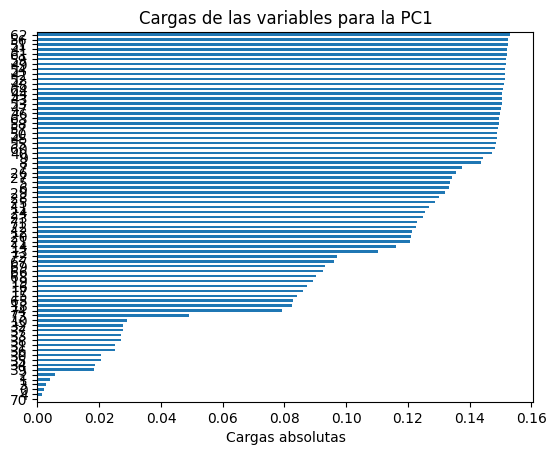

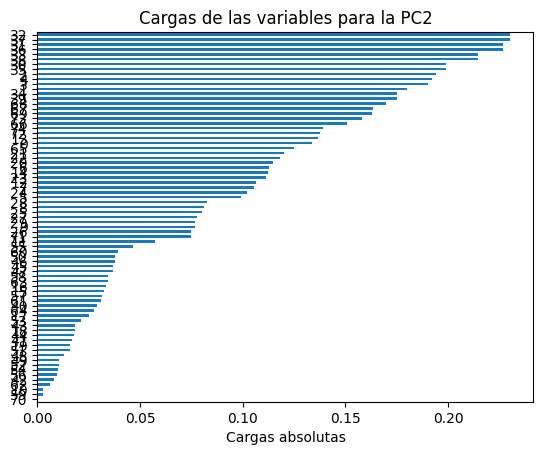

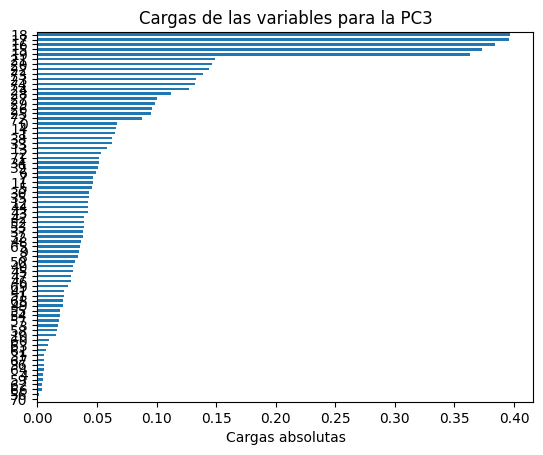

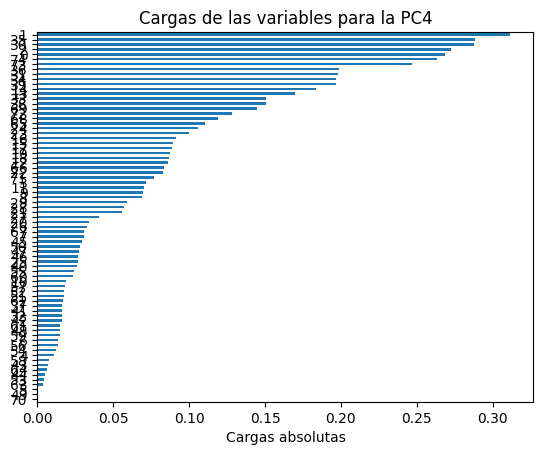

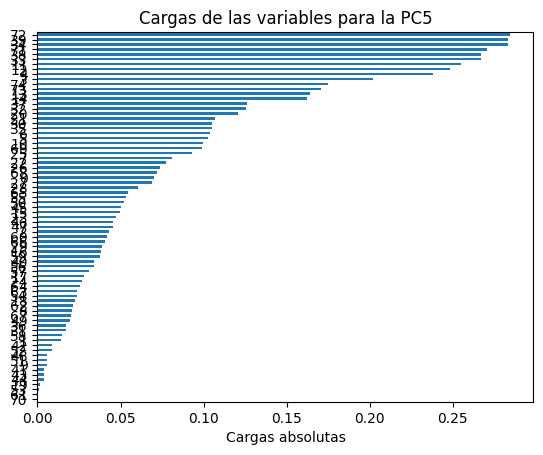

In [ ]:
# Componentes principales del modelo
pca_components = pca.components_

# Dataframe con las cargas de cada componente
df_pca_components = pd.DataFrame(pca_components.T, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])

# Gráficos
df_pca_components['PC1'].abs().sort_values().plot(kind='barh') # barh traza un gráfico de barras horizontales
plt.title('Cargas de las variables para la PC1')
plt.xlabel('Cargas absolutas')
plt.show()

df_pca_components['PC2'].abs().sort_values().plot(kind='barh')
plt.title('Cargas de las variables para la PC2')
plt.xlabel('Cargas absolutas')
plt.show()


df_pca_components['PC3'].abs().sort_values().plot(kind='barh')
plt.title('Cargas de las variables para la PC3')
plt.xlabel('Cargas absolutas')
plt.show()

df_pca_components['PC4'].abs().sort_values().plot(kind='barh')
plt.title('Cargas de las variables para la PC4')
plt.xlabel('Cargas absolutas')
plt.show()


df_pca_components['PC5'].abs().sort_values().plot(kind='barh')
plt.title('Cargas de las variables para la PC5')
plt.xlabel('Cargas absolutas')
plt.show()



En los gráficos de barras, las más largas indican que las variables tienen una mayor influencia en la formación de ese PC en particular, mientras que las barras más bajas indican que las variables tienen una menor influencia en la formación de ese PC. En otras palabras, las barras más largas representan una mayor contribución y, por tanto, se consideran las variables más importantes para ese componente.

Ahora podemos comprobar las 10 variables menos significativas, y, para ello, primero vamos a sumar la carga de todas las variables en cada componente y ordenarlo en una lista ascendente.

In [ ]:
# Cargas absolutas de todas las variables en cada PC
loadings_abs = np.abs(pca.components_[:5,:])

# Sumamos cargas absolutas de cada variable en las 5 PCs
sum_loadings = np.sum(loadings_abs, axis=0)

# Ordenamos de forma ascendente
sorted_vars = np.argsort(sum_loadings)
print(sorted_vars)
# Y seleccionamos las 10 últimas variables
last_10_vars = sorted_vars[:10]

[70 10 62 49 61 41 56 59 51 64 53 54 44 63 48 43 58 42 52 57 60 40 46 47
 55 45 50 67  9  8 66  5  7 29 65  6 26 27 25 32 37 28  4 68 31 36  3 24
 23 69 20  0 22 21 11 19  2  1 71 12 18 17 15 16 13 14 30 35 38 33 39 34
 72 73 74]


Ahora podemos quitar dichas variables y entrenar el modelo de nuevo para ver si se han mejorado el rendimiento del modelo.

In [ ]:
# Seleccionamos columnas del dataframe original sin las 10 variables que queremos quitar
cols_to_keep = [col for col in disp_df.columns if col not in last_10_vars]
df_filtered = disp_df[cols_to_keep]
np.random.seed(23)
'''
Explicación detallada:
Recorremos las columnas del fichero de datos y solo incluimos aquellas que no se encuentran en el array
donde están las 10 variables menos significativas. Después definimos un nuevo fichero que no incluye esas variables
'''
# Dividir el conjunto de datos filtrado en entrenamiento y validación
X_train_filtered, X_test_filtered, y_train_filtered, y_test_filtered = train_test_split(df_filtered, y, test_size=0.1667, random_state=23)

'''
Luego hacemos el split con la función train_test_split() de los datos pero con el nuevo fichero filtrado, y finalmente
entrenamos y medimos los errores, tal y como ya hemos hecho en la práctica, medimos los errores.
'''
# Entrenamiento
rf_filtered = modelo_final
rf_filtered.fit(X_train_filtered, y_train_filtered)

# Predicciones
y_pred_filtered = rf_filtered.predict(X_test_filtered)

# RMSE y MAE
rmse_filtered = np.sqrt(metrics.mean_squared_error(y_test_filtered, y_pred_filtered))
mae_filtered = metrics.mean_absolute_error(y_test_filtered, y_pred_filtered)
print("RMSE:", rmse_filtered)
print("MAE:", mae_filtered)


RMSE: 2523323.9266841635
MAE: 1610785.9135461587


Después de quitar las 10 variables menos significativas los errores en casi cien mil unidades cada uno, por lo que podemos concluir que sí hay variables que son menos significativas y, cuando prescindimos de ellas, el rendimiento del modelo mejora.

Pero también es importante saber que la eliminación de estas variables podría suponer una pérdida de información del modelo, o una reducción del poder de predicción, es decir, el modelo puede reducir su capacidad de predicción. Por otro lado, una reducción de variables también podría conllevar un sobreaprendizaje, dado que el resto del modelo se ajustaría demasiado bien al conjunto de datos, pero no al de test (de todas formas, no creemos que ese sea el caso).

En conclusión, sí se puede reducir la dimensionalidad del problema y mejorar el rendimiento del modelo.

# Conclusiones generales del Notebook

Algunos comentarios generales que resumen nuestro trabajo y que podemos sacar de este Notebook son:

- El EDA es una fase preliminar importante que ayuda a entender cómo son los datos con los que se está trabajando. A pesar de que no hayamos hecho modificaciones de los datos, simplemente visualizaciones e interpretaciones, es conveniente conocer la forma que tienen.

- Los algoritmos básicos son rápidos y sencillos de modificar y comprender que permiten captar la idea del problema que se quiere resolver. Los errores se encuentran en torno a los valores esperados y las modificaciones de sus hiperparámetros mejoran los modelos por omisión.

- Los algoritmos avanzados tienen una mayor precisión en la predicción que los algoritmos básicos (aunque tampoco hay tanta diferencia como pensábamos en un inicio), a pesar de que necesitan un mayor tiempo de entrenamiento. Además, la interpretación de los resultados es más difícil debido a la complejidad de los modelos. También tienen una mejor capacidad para manejar datos complejos, como son los que nos incumben en esta práctica, dado que en la vida real es un proceso complejo la medida de la temperatura, presión del aire, ondas cortas o la acumulación del agua en la superficie. Es decir, los algoritmos avanzados pueden trabajar mejor con métricas que conllevan un proceso complejo de medición en la vida real.

- Todos nuestros modelos superan las predicciones realizadas por el regresor Naive (Dummy Regressor), lo que nos da una estimación del margen de mejora al que hemos podido optar.

- Para cada algoritmo hay distintas implementaciones posibles que realizan un trabajo similar pero que difieren en detalles. Estas pequeñas diferencias son las que nos han hecho tener que estudiar cómo funciona cada uno de ellos, ya sea mirando tutoriales o buscando otros recursos en internet.

- No existe una solución única para todo, sino que hay muchos factores de los que dependen muchas cosas distintas, literalmente. Por ejemplo, cambiar hiperparámetros a un mayor o menor número no va a hacer que mejor el rendimiento de un modelo. En otras palabras, cada algoritmo, problema, parámetro o situación concreta requiere un estudio exhaustivo para acercarse a la solución óptima.

En conclusión, podemos decir que la práctica nos sido muy útil como implementación de la teoría que hemos visto en clase. Hay bastantes conceptos previos que se necesitan conocer antes de empezar a progrmar los algoritmos, pero con tiempo y dedicación creemos que es posible hacer un buen trabajo. Por tanto, consideramos que la práctica ha sido una buena introducción a los modelos del Aprendizaje automático (Machine learning).